# CUSTOMER CHURN PREDICTION ANALYSIS

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler 

import statsmodels
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

#imbalance
from sklearn.datasets import make_classification
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# import function to perform feature selection
from sklearn.feature_selection import RFE

# import the XGBoost function for classification
from xgboost import XGBClassifier
import xgboost as xgb
xgb.set_config(verbosity=0)

In [2]:
# setting plot size
plt.rcParams["figure.figsize"] = [12,7]

In [3]:
#Importing pandas and reading the first 5 rows of the considered dataset.
df1=pd.read_csv('customer_data.csv')

df1.head()

recordID state  account_length  area_code international_plan  \
0         1    HI             101        510                 no   
1         2    MT             137        510                 no   
2         3    OH             103        408                 no   
3         4    NM              99        415                 no   
4         5    SC             108        415                 no   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0              no                      0               70.9              123   
1              no                      0              223.6               86   
2             yes                     29              294.7               95   
3              no                      0              216.8              123   
4              no                      0              197.4               78   

   total_day_charge  ...  total_eve_charge  total_night_minutes  \
0             12.05  ...             18.01                236.0   
1             38.01  ...             20.81                 94.2   
2             50.10  ...             20.17                300.3   
3             36.86  ...             10.74                220.6   
4             33.56  ...             10.54                204.5   

   total_night_calls  total_night_charge  total_intl_minutes  \
0                 73               10.62                10.6   
1                 81                4.24                 9.5   
2                127               13.51                13.7   
3                 82                9.93                15.7   
4                107                9.20                 7.7   

   total_intl_calls  total_intl_charge  number_customer_service_calls  churn  \
0                 3               2.86                              3     no   
1                 7               2.57                              0     no   
2                 6               3.70                              1     no   
3                 2               4.24                              1     no   
4                 4               2.08                              2     no   

   customer_id  
0   23383607.0  
1   22550362.0  
2   59063354.0  
3   25464504.0  
4     691824.0  

[5 rows x 22 columns]

In [4]:
#Making a copy of the dataset in order to work on it and retain the original.

df= df1.copy()

df.head()


recordID state  account_length  area_code international_plan  \
0         1    HI             101        510                 no   
1         2    MT             137        510                 no   
2         3    OH             103        408                 no   
3         4    NM              99        415                 no   
4         5    SC             108        415                 no   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0              no                      0               70.9              123   
1              no                      0              223.6               86   
2             yes                     29              294.7               95   
3              no                      0              216.8              123   
4              no                      0              197.4               78   

   total_day_charge  ...  total_eve_charge  total_night_minutes  \
0             12.05  ...             18.01                236.0   
1             38.01  ...             20.81                 94.2   
2             50.10  ...             20.17                300.3   
3             36.86  ...             10.74                220.6   
4             33.56  ...             10.54                204.5   

   total_night_calls  total_night_charge  total_intl_minutes  \
0                 73               10.62                10.6   
1                 81                4.24                 9.5   
2                127               13.51                13.7   
3                 82                9.93                15.7   
4                107                9.20                 7.7   

   total_intl_calls  total_intl_charge  number_customer_service_calls  churn  \
0                 3               2.86                              3     no   
1                 7               2.57                              0     no   
2                 6               3.70                              1     no   
3                 2               4.24                              1     no   
4                 4               2.08                              2     no   

   customer_id  
0   23383607.0  
1   22550362.0  
2   59063354.0  
3   25464504.0  
4     691824.0  

[5 rows x 22 columns]

In [5]:
df.tail()

recordID state  account_length  area_code international_plan  \
12887     12888    MT              25        415                 no   
12888     12889    MT             113        415                 no   
12889     12890    ID              88        415                 no   
12890     12891    AK             120        415                 no   
12891     12892    UT              74        415                 no   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
12887              no                      0              134.3   
12888              no                      0              215.9   
12889             yes                     31              181.6   
12890              no                      0              178.4   
12891              no                      0              106.4   

       total_day_calls  total_day_charge  ...  total_eve_charge  \
12887               98             22.83  ...             17.20   
12888               93             36.70  ...             20.41   
12889               91             30.87  ...             18.12   
12890               97             30.33  ...             14.31   
12891               84             18.09  ...             11.92   

       total_night_minutes  total_night_calls  total_night_charge  \
12887                195.9                100                8.82   
12888                156.7                123                7.05   
12889                207.8                104                9.35   
12890                120.5                 93                5.42   
12891                 90.9                 81                4.09   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
12887                12.6                 5               3.40   
12888                 4.9                 5               1.32   
12889                11.4                 4               3.08   
12890                 9.3                 9               2.51   
12891                11.4                 3               3.08   

       number_customer_service_calls  churn  customer_id  
12887                              2     no    3785730.0  
12888                              3     no   25171109.0  
12889                              1     no   12126991.0  
12890                              1     no   33084674.0  
12891                              1     no   28432623.0  

[5 rows x 22 columns]

In [6]:
#Dimension of the data
df.shape

(12892, 22)

In [7]:
#Checking for data types
df.dtypes

recordID                           int64
state                             object
account_length                     int64
area_code                          int64
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
customer_id                      float64
dtype: object

In [8]:
df.columns

Index(['recordID', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'customer_id'],
      dtype='object')

Classification of various data columns into numerical/categorical attributes

<b>Numerical Attributes: </b>  recordID, account_length, area_code, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes,total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls and customer_id

<b>Categorical Attributes: </b> state, international_plan, voice_mail_plan and churn

 Refering to the identification of the data types, we can see that, three attributes are to be considered categorical which are   **recordID, area_code and customer_id.**
 
 
 **Hence, we shall convert these data types to object data type.**

In [9]:
# Converting numerical variable to categorical variable.
df['recordID'] = df['recordID'].astype(object)
df['area_code'] = df['area_code'].astype(object)
df['customer_id'] = df['customer_id'].astype(object)
df.dtypes

recordID                          object
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
customer_id                       object
dtype: object

In [10]:
df.recordID.nunique()

12892

# Remove insignificant variable

In [11]:
# We are removing the recordID column as it does not have any significance
#Also record_id and customer_id gives information about customer,so we will drop record_id and retain customer_id

df.drop('recordID',axis='columns', inplace=True)

In [12]:
# First rows of the dataset having recordID column removed.
df.head()

state  account_length area_code international_plan voice_mail_plan  \
0    HI             101       510                 no              no   
1    MT             137       510                 no              no   
2    OH             103       408                 no             yes   
3    NM              99       415                 no              no   
4    SC             108       415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   
1                      0              223.6               86   
2                     29              294.7               95   
3                      0              216.8              123   
4                      0              197.4               78   

   total_day_charge  total_eve_minutes  ...  total_eve_charge  \
0             12.05              211.9  ...             18.01   
1             38.01              244.8  ...             20.81   
2             50.10              237.3  ...             20.17   
3             36.86              126.4  ...             10.74   
4             33.56              124.0  ...             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls  churn customer_id  
0                              3     no  23383607.0  
1                              0     no  22550362.0  
2                              1     no  59063354.0  
3                              1     no  25464504.0  
4                              2     no    691824.0  

[5 rows x 21 columns]

# Distibution of variable

### Dependent(Target variable) 

In [13]:
#Replacing 'yes' with 1 and 'no' with 0 in churn column 

df['churn'].replace({'yes':1,'no':0},inplace = True)
df['churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [14]:
df.churn.value_counts()

0    11069
1     1823
Name: churn, dtype: int64

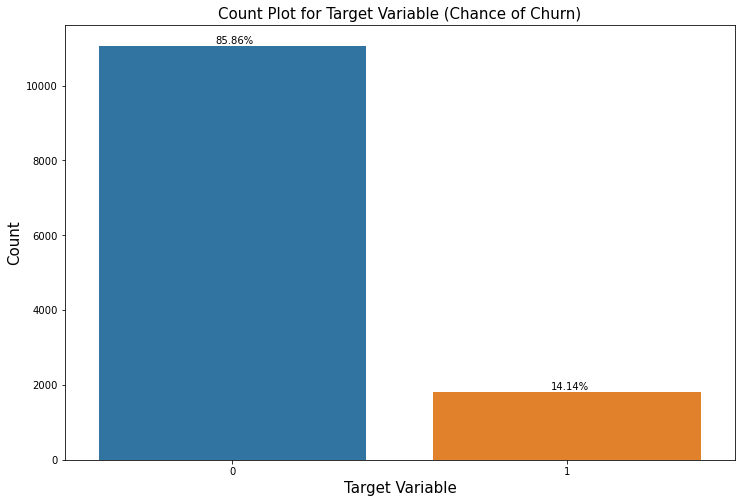

In [15]:
plt.figure(figsize = [12,8])

sns.countplot(df.churn)

plt.text(x = -0.05, y = df.churn.value_counts()[0]+50, s = str(round((df['churn'].value_counts()[0])*100/len(df['churn']),2)) + '%')
plt.text(x = 0.95, y = df.churn.value_counts()[1]+50 , s = str(round((df['churn'].value_counts()[1])*100/len(df['churn']),2)) + '%')

plt.title('Count Plot for Target Variable (Chance of Churn)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

**Interpretation:**
<ul>Target variable has imbalanced class distribution.</ul>
<ul>Positive class (Churn=1) is 14.14% which is very much less than negative class (churn=0 ) 85.86%.</ul>
<ul>Imbalanced class distributions influence the performance of a machine learning model negatively.</ul>
<ul>We will use <b>SMOTE ANALYSIS TECHNIQUE</b> to overcome this issue.</ul>

## Distribution of categoric independent variables

### Feature Engineering

Feature Engineering is the process of using domain knowledge of the data to create new features that make the machine learning model perform better.

In [16]:
# Performing feature engineering on 'area_code' attribute.
df.area_code.unique()

array([510, 408, 415], dtype=object)

In [17]:
area = df['area_code']

def new_area(area):
    if area == 510:
        return 'Area 1'
    if area == 408:
        return 'Area 2'
    if area == 415:
        return 'Area 3'

df['area_code'] = df['area_code'].apply(new_area)
df

state  account_length area_code international_plan voice_mail_plan  \
0        HI             101    Area 1                 no              no   
1        MT             137    Area 1                 no              no   
2        OH             103    Area 2                 no             yes   
3        NM              99    Area 3                 no              no   
4        SC             108    Area 3                 no              no   
...     ...             ...       ...                ...             ...   
12887    MT              25    Area 3                 no              no   
12888    MT             113    Area 3                 no              no   
12889    ID              88    Area 3                 no             yes   
12890    AK             120    Area 3                 no              no   
12891    UT              74    Area 3                 no              no   

       number_vmail_messages  total_day_minutes  total_day_calls  \
0                          0               70.9              123   
1                          0              223.6               86   
2                         29              294.7               95   
3                          0              216.8              123   
4                          0              197.4               78   
...                      ...                ...              ...   
12887                      0              134.3               98   
12888                      0              215.9               93   
12889                     31              181.6               91   
12890                      0              178.4               97   
12891                      0              106.4               84   

       total_day_charge  total_eve_minutes  ...  total_eve_charge  \
0                 12.05              211.9  ...             18.01   
1                 38.01              244.8  ...             20.81   
2                 50.10              237.3  ...             20.17   
3                 36.86              126.4  ...             10.74   
4                 33.56              124.0  ...             10.54   
...                 ...                ...  ...               ...   
12887             22.83              202.3  ...             17.20   
12888             36.70              240.1  ...             20.41   
12889             30.87              213.2  ...             18.12   
12890             30.33              168.3  ...             14.31   
12891             18.09              140.2  ...             11.92   

       total_night_minutes  total_night_calls  total_night_charge  \
0                    236.0                 73               10.62   
1                     94.2                 81                4.24   
2                    300.3                127               13.51   
3                    220.6                 82                9.93   
4                    204.5                107                9.20   
...                    ...                ...                 ...   
12887                195.9                100                8.82   
12888                156.7                123                7.05   
12889                207.8                104                9.35   
12890                120.5                 93                5.42   
12891                 90.9                 81                4.09   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
0                    10.6                 3               2.86   
1                     9.5                 7               2.57   
2                    13.7                 6               3.70   
3                    15.7                 2               4.24   
4                     7.7                 4               2.08   
...                   ...               ...                ...   
12887                12.6                 5               3.40   
12888                 4.9                 5               1.32   
12889                11.

### Dataset without Feature Engineering

In [18]:
df.head()

state  account_length area_code international_plan voice_mail_plan  \
0    HI             101    Area 1                 no              no   
1    MT             137    Area 1                 no              no   
2    OH             103    Area 2                 no             yes   
3    NM              99    Area 3                 no              no   
4    SC             108    Area 3                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   
1                      0              223.6               86   
2                     29              294.7               95   
3                      0              216.8              123   
4                      0              197.4               78   

   total_day_charge  total_eve_minutes  ...  total_eve_charge  \
0             12.05              211.9  ...             18.01   
1             38.01              244.8  ...             20.81   
2             50.10              237.3  ...             20.17   
3             36.86              126.4  ...             10.74   
4             33.56              124.0  ...             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls  churn  customer_id  
0                              3      0   23383607.0  
1                              0      0   22550362.0  
2                              1      0   59063354.0  
3                              1      0   25464504.0  
4                              2      0     691824.0  

[5 rows x 21 columns]

# <b>  **Feature engineering:** </b> 
* We can see that <b>'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes' </b>are Call duration in minutes.so we can add all the variables and make it as single variable<b>'Call_Minutes'</b>
* Likewise we can add <b>'total_day_calls','total_eve_calls','total_night_calls','total_intl_calls'</b>and make it as<b> 'Call_Count'</b>
* Likewise we can add<b> 'total_day_charge', 'total_eve_charge','total_night_charge','total_intl_charge' </b>and make it as <b>'Total_Charge'</b>

In [19]:
df_fea = df.copy()

In [20]:
df_fea['Call_Minutes'] = df_fea['total_day_minutes']+df_fea['total_eve_minutes']+df_fea['total_night_minutes']+df_fea['total_intl_minutes']

df_fea['Call_Count'] = df_fea['total_day_calls']+df_fea['total_eve_calls']+df_fea['total_night_calls']+df_fea['total_intl_calls']

df_fea['Total_Charge'] = df_fea['total_day_charge']+df_fea['total_eve_charge']+df_fea['total_night_charge']+df_fea['total_intl_charge']

In [21]:
df_fea.head()

state  account_length area_code international_plan voice_mail_plan  \
0    HI             101    Area 1                 no              no   
1    MT             137    Area 1                 no              no   
2    OH             103    Area 2                 no             yes   
3    NM              99    Area 3                 no              no   
4    SC             108    Area 3                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   
1                      0              223.6               86   
2                     29              294.7               95   
3                      0              216.8              123   
4                      0              197.4               78   

   total_day_charge  total_eve_minutes  ...  total_night_charge  \
0             12.05              211.9  ...               10.62   
1             38.01              244.8  ...                4.24   
2             50.10              237.3  ...               13.51   
3             36.86              126.4  ...                9.93   
4             33.56              124.0  ...                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls  churn  customer_id  Call_Minutes  \
0                              3      0   23383607.0         529.4   
1                              0      0   22550362.0         572.1   
2                              1      0   59063354.0         846.0   
3                              1      0   25464504.0         579.5   
4                              2      0     691824.0         533.6   

   Call_Count  Total_Charge  
0         272         43.54  
1         313         65.63  
2         333         87.48  
3         295         61.77  
4         290         55.38  

[5 rows x 24 columns]

In [22]:
df_fea.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes',
             'total_day_calls','total_eve_calls','total_night_calls','total_intl_calls', 
             'total_day_charge', 'total_eve_charge','total_night_charge','total_intl_charge' ],axis=1,inplace =True)

### Dataset with Feature Engineering

In [23]:
df_fea.head()

state  account_length area_code international_plan voice_mail_plan  \
0    HI             101    Area 1                 no              no   
1    MT             137    Area 1                 no              no   
2    OH             103    Area 2                 no             yes   
3    NM              99    Area 3                 no              no   
4    SC             108    Area 3                 no              no   

   number_vmail_messages  number_customer_service_calls  churn customer_id  \
0                      0                              3      0  23383607.0   
1                      0                              0      0  22550362.0   
2                     29                              1      0  59063354.0   
3                      0                              1      0  25464504.0   
4                      0                              2      0    691824.0   

   Call_Minutes  Call_Count  Total_Charge  
0         529.4         272         43.54  
1         572.1         313         65.63  
2         846.0         333         87.48  
3         579.5         295         61.77  
4         533.6         290         55.38

### Categorical features for both Dataset with & without Feature Engineering :

In [24]:
# Selecting Categorical variables of the dataset

df_cat= df.select_dtypes(include=object) 

df_cat.head()

state area_code international_plan voice_mail_plan customer_id
0    HI    Area 1                 no              no  23383607.0
1    MT    Area 1                 no              no  22550362.0
2    OH    Area 2                 no             yes  59063354.0
3    NM    Area 3                 no              no  25464504.0
4    SC    Area 3                 no              no    691824.0

In [25]:
# selecting bi-categorical features

columns = df_cat.columns
binary_cols = []

for col in columns:
    if df_cat[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [26]:
binary_cols #categorical features with two classes

['international_plan', 'voice_mail_plan']

In [27]:
# Multi-categorical features
#The remaining columns have more than two values

multiple_cols_cat = ['state','area_code','customer_id']

<b>Bi-categorical features: </b> 'international_plan', 'voice_mail_plan'<p>
<b>Multi-categorical features: </b>'state', 'area_code', 'customer_id'

### Binary Categorical Features both Dataset with & without Feature Engineering : 

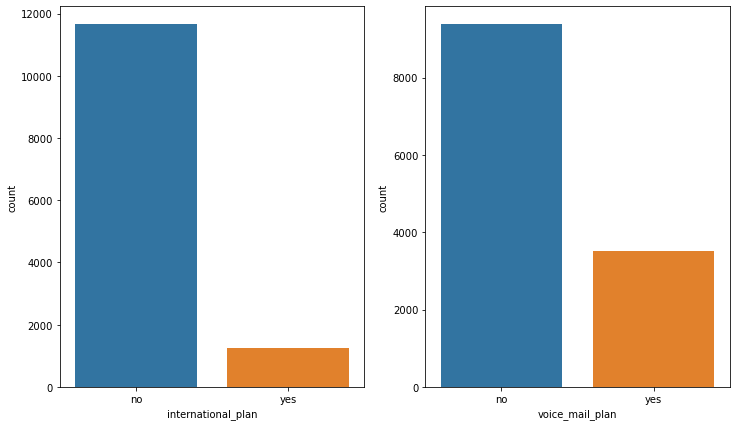

In [28]:
# checking distribution

fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.countplot("international_plan", data=df, ax=axes[0])
sns.countplot("voice_mail_plan", data=df, ax=axes[1])
plt.show()

<b>Interpretation:</b>
* There is an imbalance in international plan and voice mail plan.
* Most of the customers do not use international plan
* similarly most of the customers do not use voice mail plan

In [29]:
df[['international_plan','churn']].groupby(['international_plan']).mean()

churn
international_plan          
no                  0.111922
yes                 0.418211

<b>Interpretation:</b>
The average churn rate for people not having international plan is 11.11% whereas average churn rate 
for people having international plan is 41.8%.So it is significant in predicting the model.

International plan will be included in the model building

In [30]:
df[['voice_mail_plan','churn']].groupby(['voice_mail_plan']).mean()

churn
voice_mail_plan          
no               0.163252
yes              0.083239

<b>Interpretation:</b> voice mail plan have an effect on churn,so it will be also included in the model

### Other categorical features for both Dataset with & without Feature Engineering :

In [31]:
multiple_cols_cat = ['state','area_code','customer_id']

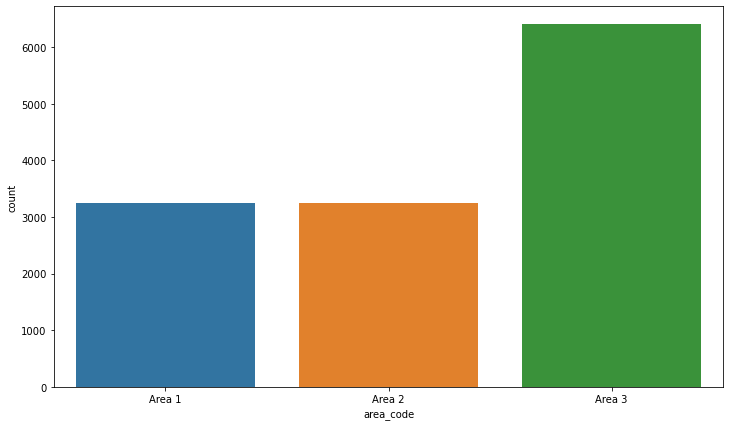

In [32]:
# checking area code distribution
sns.countplot("area_code", data=df);

In [33]:
df[['area_code','churn']].groupby(['area_code']).mean()

churn
area_code          
Area 1     0.145853
Area 2     0.141933
Area 3     0.138885

<b>Interpretation:</b> The three categories of area codes have almost similar churn rate, so it won't be much significant in predicting the churn.

### Statistical Test to check the relationship between Predictor & target Variable

#### Performing chi-square test on Area code Variable

In [34]:
tab = pd.crosstab(df['area_code'],df['churn'])

obs_val = tab.values

tstat,p,dof,exp_val = chi2_contingency(observed = obs_val, correction = False)

print("Test statistic:", tstat)
print("p-value:", p)

Test statistic: 0.8707772267148968
p-value: 0.6470131802513387


<b>Interpretation:</b>
* Here pval > 0.05, Accepting H0 which implies churn and area_code are independent

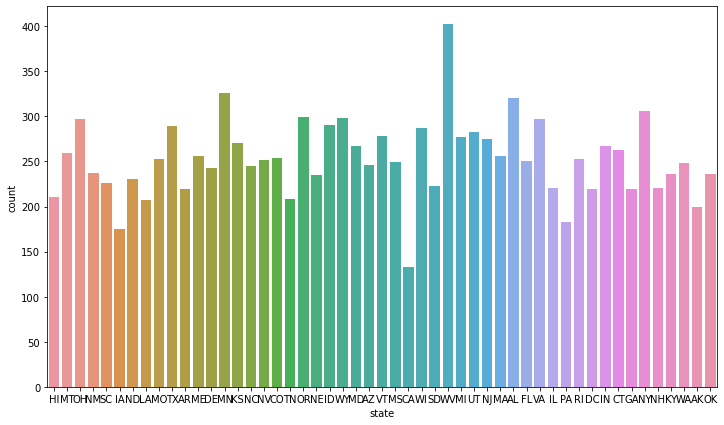

In [35]:
# checking state distribution
sns.countplot("state", data=df);

In [36]:
df[['state','churn']].groupby(['state']).mean()

churn
state          
AK     0.065327
AL     0.103125
AR     0.178082
AZ     0.073171
CA     0.263158
CO     0.133858
CT     0.159696
DC     0.095890
DE     0.152263
FL     0.128000
GA     0.141553
HI     0.052381
IA     0.080000
ID     0.117241
IL     0.081448
IN     0.134831
KS     0.181481
KY     0.144068
LA     0.082126
MA     0.171875
MD     0.228464
ME     0.199219
MI     0.191336
MN     0.162577
MO     0.122530
MS     0.200803
MT     0.200772
NC     0.142857
ND     0.095652
NE     0.076596
NH     0.135747
NJ     0.258182
NM     0.101266
NV     0.206349
NY     0.176471
OH     0.131313
OK     0.152542
OR     0.140468
PA     0.136612
RI     0.079051
SC     0.203540
SD     0.139013
TN     0.115385
TX     0.228374
UT     0.141343
VA     0.063973
VT     0.107914
WA     0.209677
WI     0.087108
WV     0.114428
WY     0.110738

* States have somewhat similar churn rate.

#### Performing chi-square test on State variable 



In [37]:
tab = pd.crosstab(df['state'],df['churn'])

obs_val = tab.values

tstat,p,dof,exp_val = chi2_contingency(observed = obs_val, correction = False)

print("Test statistic:", tstat)
print("p-value:", p)

Test statistic: 262.92868981165145
p-value: 1.1248848609490948e-30


<b>Interpretation:</b>
* Here pvalue < 0.05, Rejecting H0 
* Hence it will be added to the model

#### Performing chi-square test on  customer-id variable



In [38]:
tab = pd.crosstab(df['customer_id'],df['churn'])

obs_val = tab.values

tstat,p,dof,exp_val = chi2_contingency(observed = obs_val, correction = False)

print("Test statistic:", tstat)
print("p-value:", p)

Test statistic: 12892.0
p-value: 0.49585918809460383


<b>Interpretation:</b>
* Here pval > 0.05, Accepting H0 which implies customer_id and churn are independent.
* So it won't be added to the model

### Dropping Insignificant column in Dataset without Feature engineering

In [39]:
#dropping customer_id as it has 12,892 unique values 

df.drop('customer_id',axis='columns', inplace=True)

In [40]:
df.head()

state  account_length area_code international_plan voice_mail_plan  \
0    HI             101    Area 1                 no              no   
1    MT             137    Area 1                 no              no   
2    OH             103    Area 2                 no             yes   
3    NM              99    Area 3                 no              no   
4    SC             108    Area 3                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   
1                      0              223.6               86   
2                     29              294.7               95   
3                      0              216.8              123   
4                      0              197.4               78   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             12.05              211.9               73             18.01   
1             38.01              244.8              139             20.81   
2             50.10              237.3              105             20.17   
3             36.86              126.4               88             10.74   
4             33.56              124.0              101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls  churn  
0                              3      0  
1                              0      0  
2                              1      0  
3                              1      0  
4                              2      0

### Dropping Insignificant column in Dataset with  Feature engineering

In [41]:
#dropping customer_id as it has 12,892 unique values 

df_fea.drop('customer_id',axis='columns', inplace=True)

In [42]:
df_fea.head()

state  account_length area_code international_plan voice_mail_plan  \
0    HI             101    Area 1                 no              no   
1    MT             137    Area 1                 no              no   
2    OH             103    Area 2                 no             yes   
3    NM              99    Area 3                 no              no   
4    SC             108    Area 3                 no              no   

   number_vmail_messages  number_customer_service_calls  churn  Call_Minutes  \
0                      0                              3      0         529.4   
1                      0                              0      0         572.1   
2                     29                              1      0         846.0   
3                      0                              1      0         579.5   
4                      0                              2      0         533.6   

   Call_Count  Total_Charge  
0         272         43.54  
1         313         65.63  
2         333         87.48  
3         295         61.77  
4         290         55.38

## Numerical Features

### Numerical Features in Dataset without Feature engineering

In [43]:
#selecting numerical features
df_num = df.select_dtypes(include=np.number)
df_num.head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             101                      0               70.9              123   
1             137                      0              223.6               86   
2             103                     29              294.7               95   
3              99                      0              216.8              123   
4             108                      0              197.4               78   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             12.05              211.9               73             18.01   
1             38.01              244.8              139             20.81   
2             50.10              237.3              105             20.17   
3             36.86              126.4               88             10.74   
4             33.56              124.0              101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls  churn  
0                              3      0  
1                              0      0  
2                              1      0  
3                              1      0  
4                              2      0

In [44]:
# Summary of numerical values of the dataset
df_num.describe()

account_length  number_vmail_messages  total_day_minutes  \
count    12892.000000           12892.000000       12892.000000   
mean       100.676621               7.996665         180.162023   
std         39.806413              13.641977          54.207056   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         144.000000   
50%        100.000000               0.000000         180.000000   
75%        127.000000              19.000000         216.300000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count     12892.000000      12892.000000       12892.000000     12892.000000   
mean        100.266599         30.628086         200.711852       100.137139   
std          19.946657          9.215171          50.781851        19.894032   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.480000         166.200000        87.000000   
50%         101.000000         30.600000         201.150000       100.000000   
75%         114.000000         36.770000         234.900000       114.000000   
max         165.000000         59.760000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count      12892.000000         12892.000000       12892.000000   
mean          17.060717           200.557834         100.038241   
std            4.316445            50.632872          19.749714   
min            0.000000             0.000000           0.000000   
25%           14.130000           167.000000          87.000000   
50%           17.095000           200.800000         100.000000   
75%           19.970000           235.100000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count        12892.000000        12892.000000      12892.000000   
mean             9.025192           10.244702          4.467654   
std              2.278507            2.782623          2.466493   
min              0.000000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.040000           10.300000          4.000000   
75%             10.580000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls         churn  
count       12892.000000                   12892.000000  12892.000000  
mean            2.766584                       1.563683      0.141406  
std             0.751269                       1.310606      0.348453  
min             0.000000                       0.000000      0.000000  
25%             2.300000                       1.000000      0.000000  
50%             2.780000                       1.000000      0.000000  
75%             3.270000                       2.000000      0.000000  
max             5.400000                       9.000000      1.000000

### Numerical Features in Dataset with Feature engineering

In [45]:
#selecting numerical features
df_fea_num = df_fea.select_dtypes(include=np.number)
df_fea_num.head()

account_length  number_vmail_messages  number_customer_service_calls  \
0             101                      0                              3   
1             137                      0                              0   
2             103                     29                              1   
3              99                      0                              1   
4             108                      0                              2   

   churn  Call_Minutes  Call_Count  Total_Charge  
0      0         529.4         272         43.54  
1      0         572.1         313         65.63  
2      0         846.0         333         87.48  
3      0         579.5         295         61.77  
4      0         533.6         290         55.38

In [46]:
# Summary of numerical values of the dataset
df_fea_num.describe()

account_length  number_vmail_messages  number_customer_service_calls  \
count    12892.000000           12892.000000                   12892.000000   
mean       100.676621               7.996665                       1.563683   
std         39.806413              13.641977                       1.310606   
min          1.000000               0.000000                       0.000000   
25%         73.000000               0.000000                       1.000000   
50%        100.000000               0.000000                       1.000000   
75%        127.000000              19.000000                       2.000000   
max        243.000000              52.000000                       9.000000   

              churn  Call_Minutes    Call_Count  Total_Charge  
count  12892.000000  12892.000000  12892.000000  12892.000000  
mean       0.141406    591.676412    304.909634     59.480580  
std        0.348453     89.566335     34.361255     10.434041  
min        0.000000    284.300000    191.000000     22.930000  
25%        0.000000    530.800000    282.000000     52.440000  
50%        0.000000    593.100000    305.000000     59.490000  
75%        0.000000    652.200000    328.000000     66.480000  
max        1.000000    885.000000    416.000000     96.150000

## Distribution of the Data

### Distribution Data in Dataset without Feature engineering

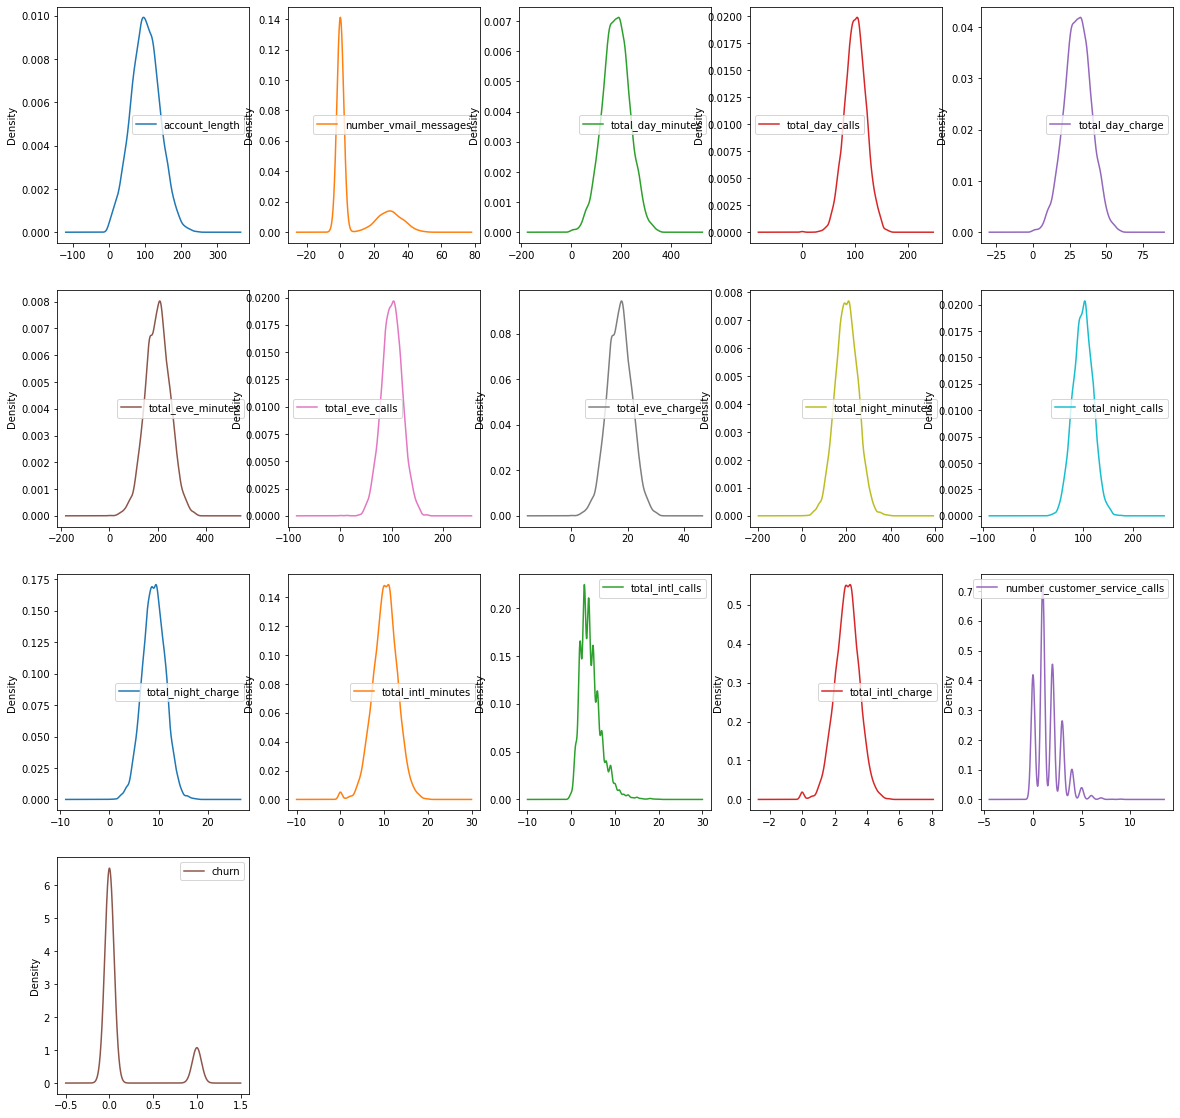

In [47]:
# Viewing the distribution summary of the data by plotting a density plot.
plt.rcParams["figure.figsize"]=[20,20]
df.plot(kind = 'density', subplots = True, layout=(4,5),sharex = False);

In [48]:
# Calculating Skewness
print(df_num.skew())

account_length                   0.103428
number_vmail_messages            1.288646
total_day_minutes               -0.021381
total_day_calls                 -0.091077
total_day_charge                -0.021381
total_eve_minutes               -0.026042
total_eve_calls                 -0.046818
total_eve_charge                -0.026015
total_night_minutes              0.006204
total_night_calls                0.014347
total_night_charge               0.006188
total_intl_minutes              -0.229942
total_intl_calls                 1.348923
total_intl_charge               -0.230140
number_customer_service_calls    1.070848
churn                            2.058529
dtype: float64


<b>Interpretation:</b>  We can infer that, number of voice messages sent, total international calls made and number of customer service calls is positively skewed.

In [49]:
# Calculating Kurtosis
df_num.kurt()

account_length                  -0.120328
number_vmail_messages            0.018038
total_day_minutes               -0.013804
total_day_calls                  0.202484
total_day_charge                -0.013675
total_eve_minutes                0.044392
total_eve_calls                  0.170165
total_eve_charge                 0.044276
total_night_minutes              0.072409
total_night_calls                0.017092
total_night_charge               0.072330
total_intl_minutes               0.633467
total_intl_calls                 3.191388
total_intl_charge                0.634048
number_customer_service_calls    1.620807
churn                            2.237887
dtype: float64

<b>Interpretation:</b>  
* We can infer that, 'total_intl_calls' & 'number_customer_service_calls' having value greater than zero.
* So those variables are leptokurtic. i.e. more extreme values

### Distribution Data in Dataset with Feature engineering

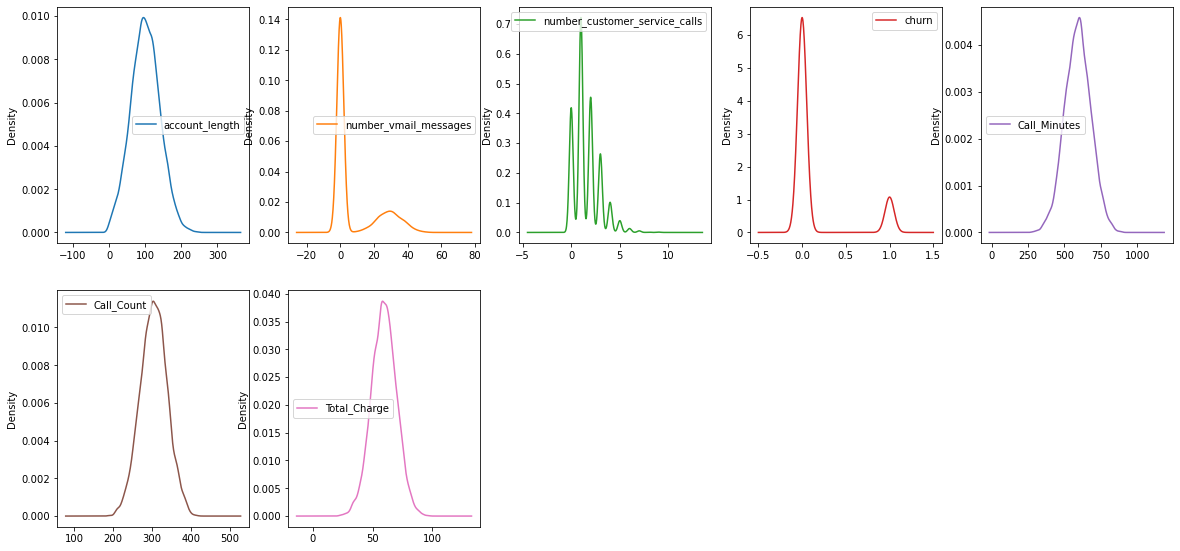

In [50]:
# Viewing the distribution summary of the data by plotting a density plot.
plt.rcParams["figure.figsize"]=[20,20]
df_fea.plot(kind = 'density', subplots = True, layout=(4,5),sharex = False);

In [51]:
# Calculating Skewness
print(df_fea_num.skew())

account_length                   0.103428
number_vmail_messages            1.288646
number_customer_service_calls    1.070848
churn                            2.058529
Call_Minutes                    -0.015261
Call_Count                      -0.030592
Total_Charge                    -0.023561
dtype: float64


<b>Interpretation:</b>  We can infer that, number of voice messages sent and number of customer service calls is positively skewed. 

In [52]:
# Calculating Kurtosis
df_fea_num.kurt()

account_length                  -0.120328
number_vmail_messages            0.018038
number_customer_service_calls    1.620807
churn                            2.237887
Call_Minutes                    -0.032919
Call_Count                      -0.136181
Total_Charge                     0.062081
dtype: float64

<b>Interpretation:</b>  
* We can infer that, 'number_customer_service_calls' having value greater than zero.
* So those variables are leptokurtic. i.e. more extreme values

## Univariate Analysis

### Univariate Analysis on dataset without Feature Engineeirng

Plots to understand the shape, spread and outliers of every numeric variable considered in the dataset, individually.

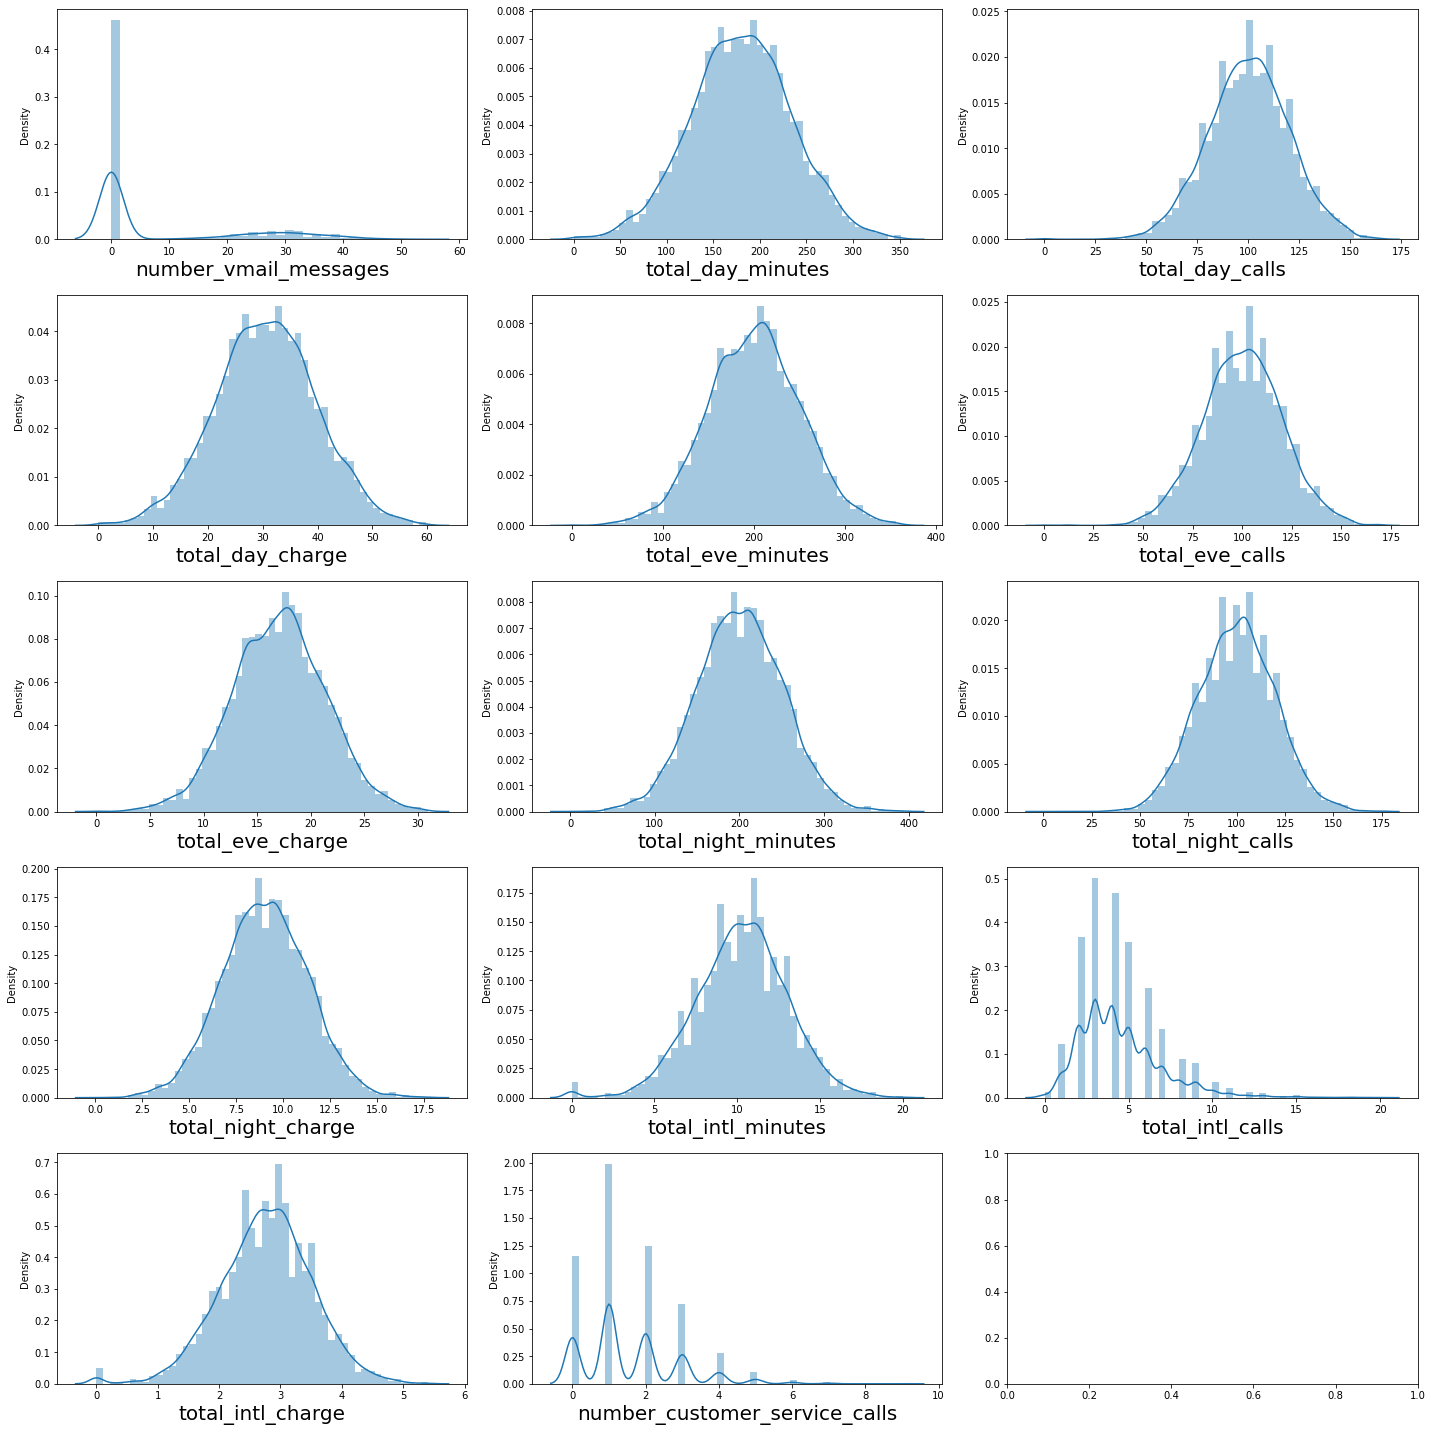

In [53]:
# Plotting density plot with numerical variables.
fig, ax = plt.subplots(5, 3, figsize=(20,20))

for variable, subplot in zip(df.columns[5:19], ax.flatten()):
    z = sns.distplot(x = df[variable] , ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
    
plt.tight_layout()
plt.show()

### Univariate Analysis on dataset with Feature Engineeirng

Plots to understand the shape, spread and outliers of every numeric variable considered in the dataset, individually.

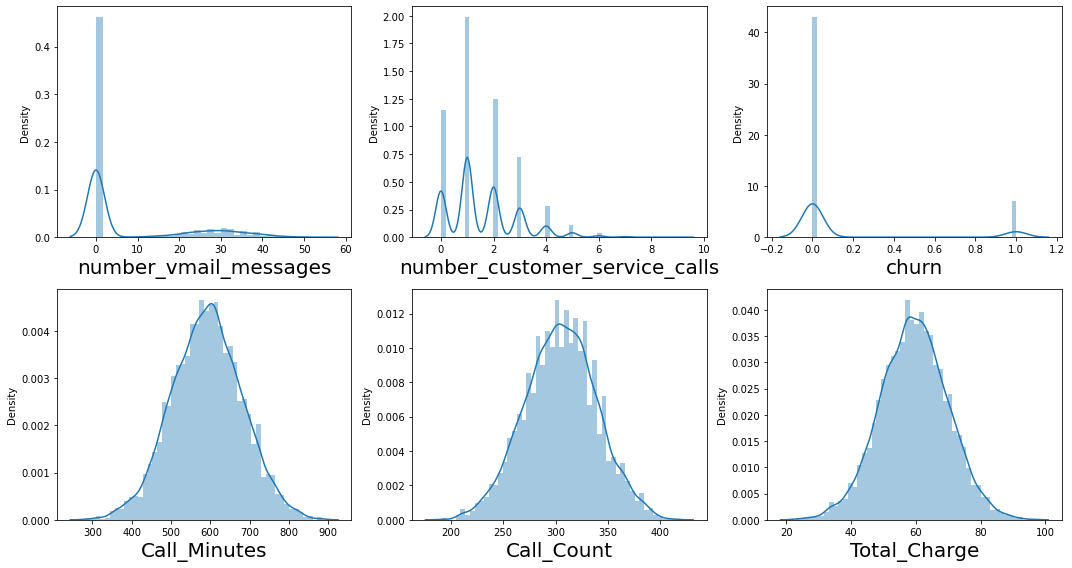

In [54]:
# Plotting density plot with numerical variables.
fig, ax = plt.subplots(2, 3, figsize=(15,8))

for variable, subplot in zip(df_fea.columns[5:11], ax.flatten()):
    z = sns.distplot(x = df_fea[variable] , ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
    
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Bivariate Analysis Dataset without Feature Engineering

#### Plots to find the relationship between quantitative-categorical variables.

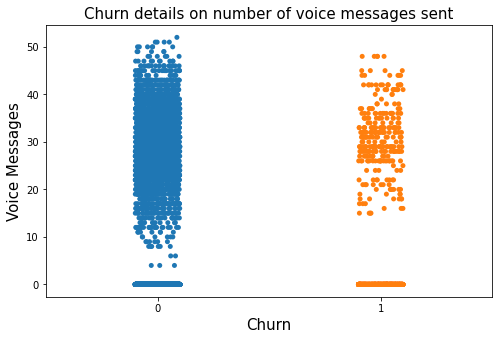

In [55]:
# Plotting strip plot on 'churn' and 'number_vmail_messages'
plt.rcParams["figure.figsize"] = [8,5]

ax = sns.stripplot(x = 'churn', y = 'number_vmail_messages', data = df)
ax.set_ylabel('Voice Messages', fontsize=15)
ax.set_xlabel('Churn', fontsize=15)

plt.title("Churn details on number of voice messages sent", fontsize=15)
plt.show()

<b>Interpretation:</b>   We can infer that, churn is not affected by the no. of voice messages sent as total number of voice messages to the customers who churn and do not churn is more or less the same

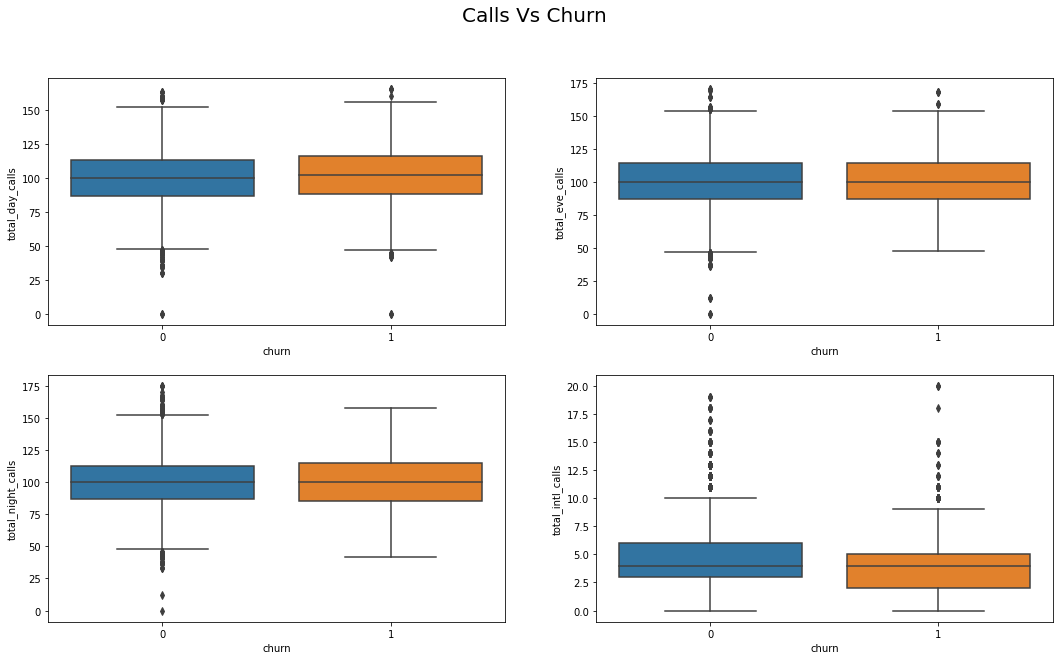

In [56]:
# Plotting box plot on 'churn' and 'total_day_calls','total_eve_calls'',total_night_calls','total_intl_calls'

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Calls Vs Churn',fontsize= 20)

sns.boxplot(ax=axes[0, 0], data=df, x='churn', y='total_day_calls')
sns.boxplot(ax=axes[0, 1], data=df, x='churn', y='total_eve_calls')
sns.boxplot(ax=axes[1, 0], data=df, x='churn', y='total_night_calls')
sns.boxplot(ax=axes[1, 1], data=df, x='churn', y='total_intl_calls')

plt.show()

<b>Interpretation:</b>  
* We can infer that, churn is not affected by calls made on different times of the day by the customers 
* Average calls made by customers who churn and do not churn is more or less the same.

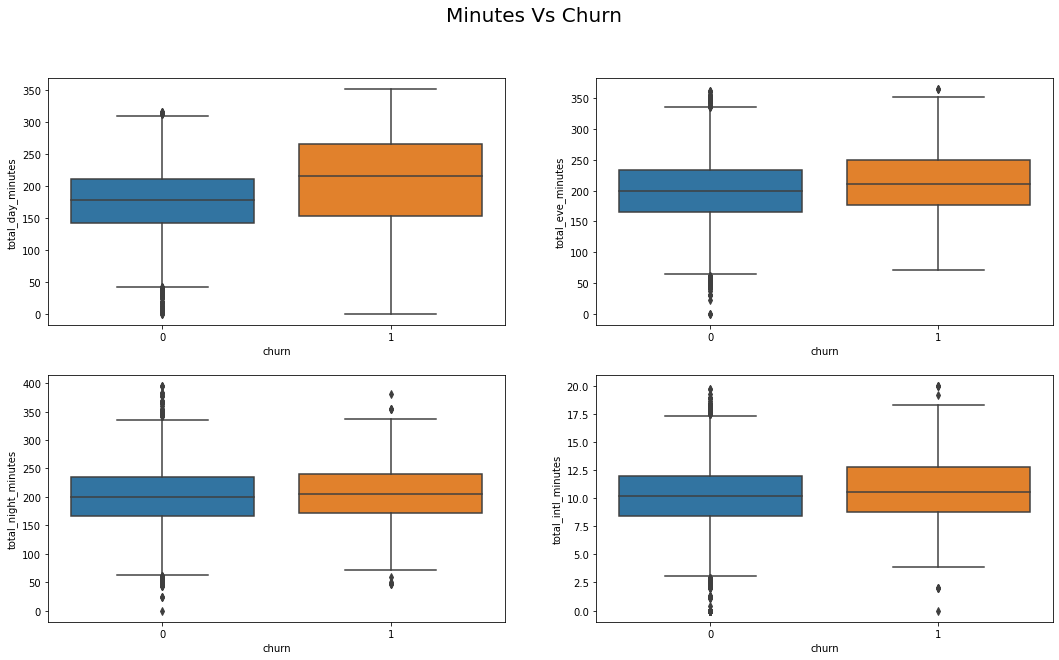

In [57]:
# Plotting box plot on 'churn' and 'total_day_minutes','total_eve_minutes'',total_night_minutes','total_intl_minutes'

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Minutes Vs Churn',fontsize= 20)

sns.boxplot(ax=axes[0, 0], data=df, x='churn', y='total_day_minutes')
sns.boxplot(ax=axes[0, 1], data=df, x='churn', y='total_eve_minutes')
sns.boxplot(ax=axes[1, 0], data=df, x='churn', y='total_night_minutes')
sns.boxplot(ax=axes[1, 1], data=df, x='churn', y='total_intl_minutes')

plt.show()

<b>Interpretation:</b>  
* We can infer that, churn is not affected by amount of time spent on call during <b> evening , night, international.</b> 
Because Average minutes spent on calls by customers who churn and do not churn is more or less the same. 
* But churn is affected by amount of time spent on call during <b>Daytime</b>, 
since the average time spent on customer who churn is slightly higher than customer who do not churn

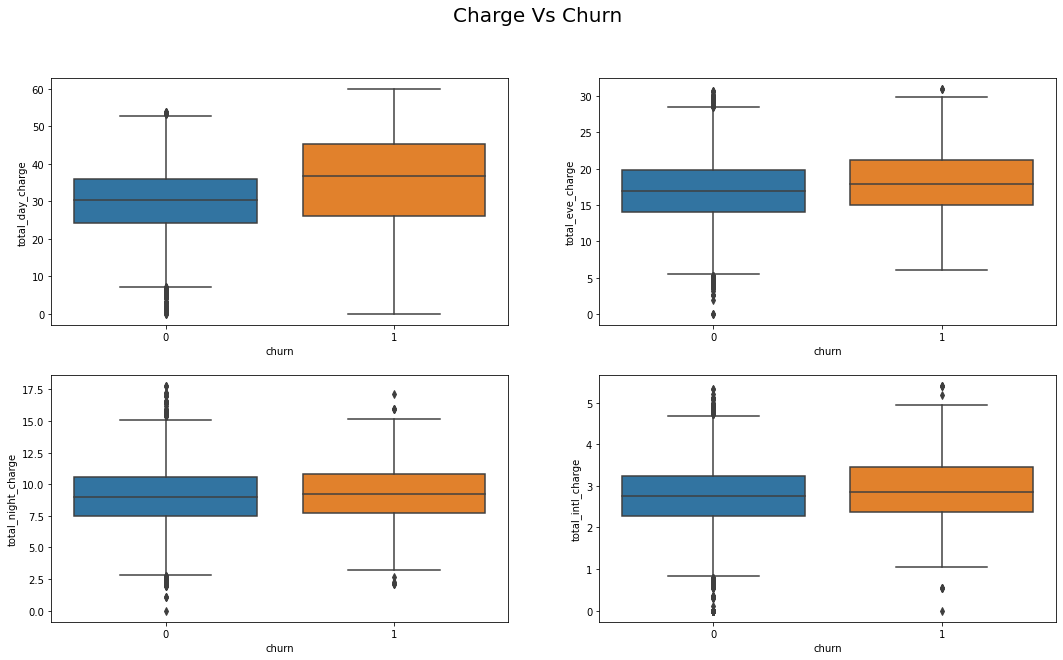

In [58]:
# Plotting box plot on 'churn' and 'total_day_charge','total_eve_charge'',total_night_charge','total_intl_charge'

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Charge Vs Churn',fontsize= 20)

sns.boxplot(ax=axes[0, 0], data=df, x='churn', y='total_day_charge')
sns.boxplot(ax=axes[0, 1], data=df, x='churn', y='total_eve_charge')
sns.boxplot(ax=axes[1, 0], data=df, x='churn', y='total_night_charge')
sns.boxplot(ax=axes[1, 1], data=df, x='churn', y='total_intl_charge')

plt.show()

<b>Interpretation:</b>  
* We can infer that, churn is not affected by the charge spent on call during <b> evening , night, international.</b> 
Because Average charge spent on calls by customers who churn and do not churn is more or less the same. 
* But churn is affected by charge during the <b>Daytime</b> calls, 
since the average charge, on customer who churn is slightly higher than customer who do not churn

### Bivariate Analysis Dataset with Feature Engineering

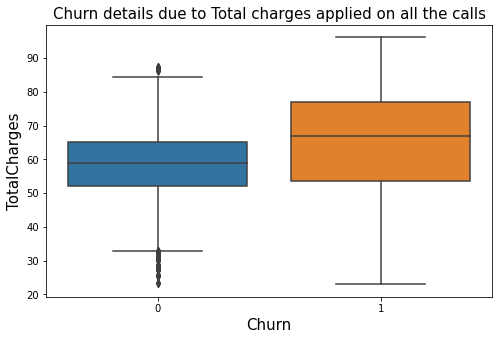

In [59]:
# Plotting box plot on 'churn' and 'total_day_charge'
plt.rcParams["figure.figsize"] = [8,5]

z = sns.boxplot(x = 'churn', y = 'Total_Charge', data = df_fea)

plt.title("Churn details due to Total charges applied on all the calls", fontsize=15)
plt.xlabel("Churn", fontsize=15)
plt.ylabel("TotalCharges", fontsize=15)

plt.show()

<b>Interpretation:</b>  We can infer that, the Total charges of the customers who churn is slightly more than those who do not churn

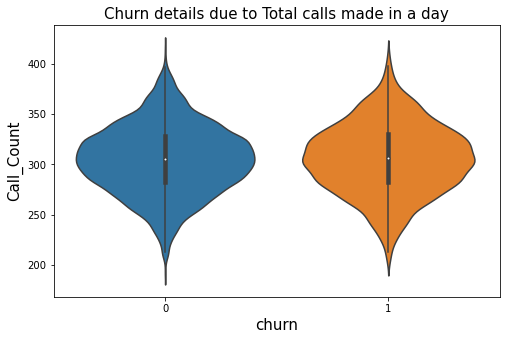

In [60]:
# Plotting box plot on 'churn' and 'total_calls'

plt.rcParams["figure.figsize"] = [8,5]

plt.title("Churn details due to Total calls made in a day", fontsize=15)
plt.xlabel("Churn", fontsize=15)
plt.ylabel("Total Number of calls", fontsize=15)

sns.violinplot( data=df_fea, x='churn', y='Call_Count')


plt.show()

<b>Interpretation:</b>  
* We can infer that, churn is not affected by total calls made  by the customers 
* Average calls made by customers who churn and do not churn is more or less the same.

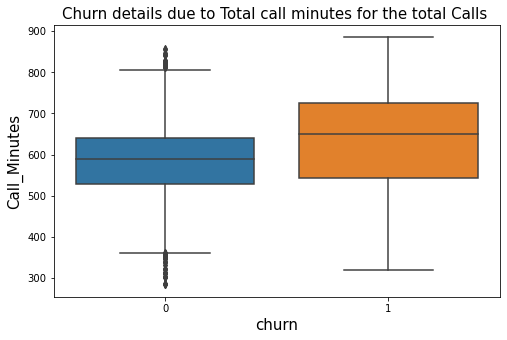

In [61]:
# Plotting box plot on 'churn' and 'total_day_minutes','total_eve_minutes'',total_night_minutes','total_intl_minutes'


plt.rcParams["figure.figsize"] = [8,5]

plt.title("Churn details due to Total call minutes for the total Calls ", fontsize=15)
plt.xlabel("Churn", fontsize=15)
plt.ylabel("Total call minutes", fontsize=15)

sns.boxplot(data=df_fea, x='churn', y='Call_Minutes')

plt.show()

<b>Interpretation:</b>  We can infer that, the Total Call Minutes of the customers who churn is slightly more than those who do not churn

## Plot to find the relationship between categorical-categorical variables.

### Both Dataset with & without feature engineering

In [62]:
tab=pd.crosstab(index=df['state'], columns=df['churn'])
tab

churn    0   1
state         
AK     186  13
AL     287  33
AR     180  39
AZ     228  18
CA      98  35
CO     220  34
CT     221  42
DC     198  21
DE     206  37
FL     218  32
GA     188  31
HI     199  11
IA     161  14
ID     256  34
IL     203  18
IN     231  36
KS     221  49
KY     202  34
LA     190  17
MA     212  44
MD     206  61
ME     205  51
MI     224  53
MN     273  53
MO     222  31
MS     199  50
MT     207  52
NC     210  35
ND     208  22
NE     217  18
NH     191  30
NJ     204  71
NM     213  24
NV     200  52
NY     252  54
OH     258  39
OK     200  36
OR     257  42
PA     158  25
RI     233  20
SC     180  46
SD     192  31
TN     184  24
TX     223  66
UT     243  40
VA     278  19
VT     248  30
WA     196  52
WI     262  25
WV     356  46
WY     265  33

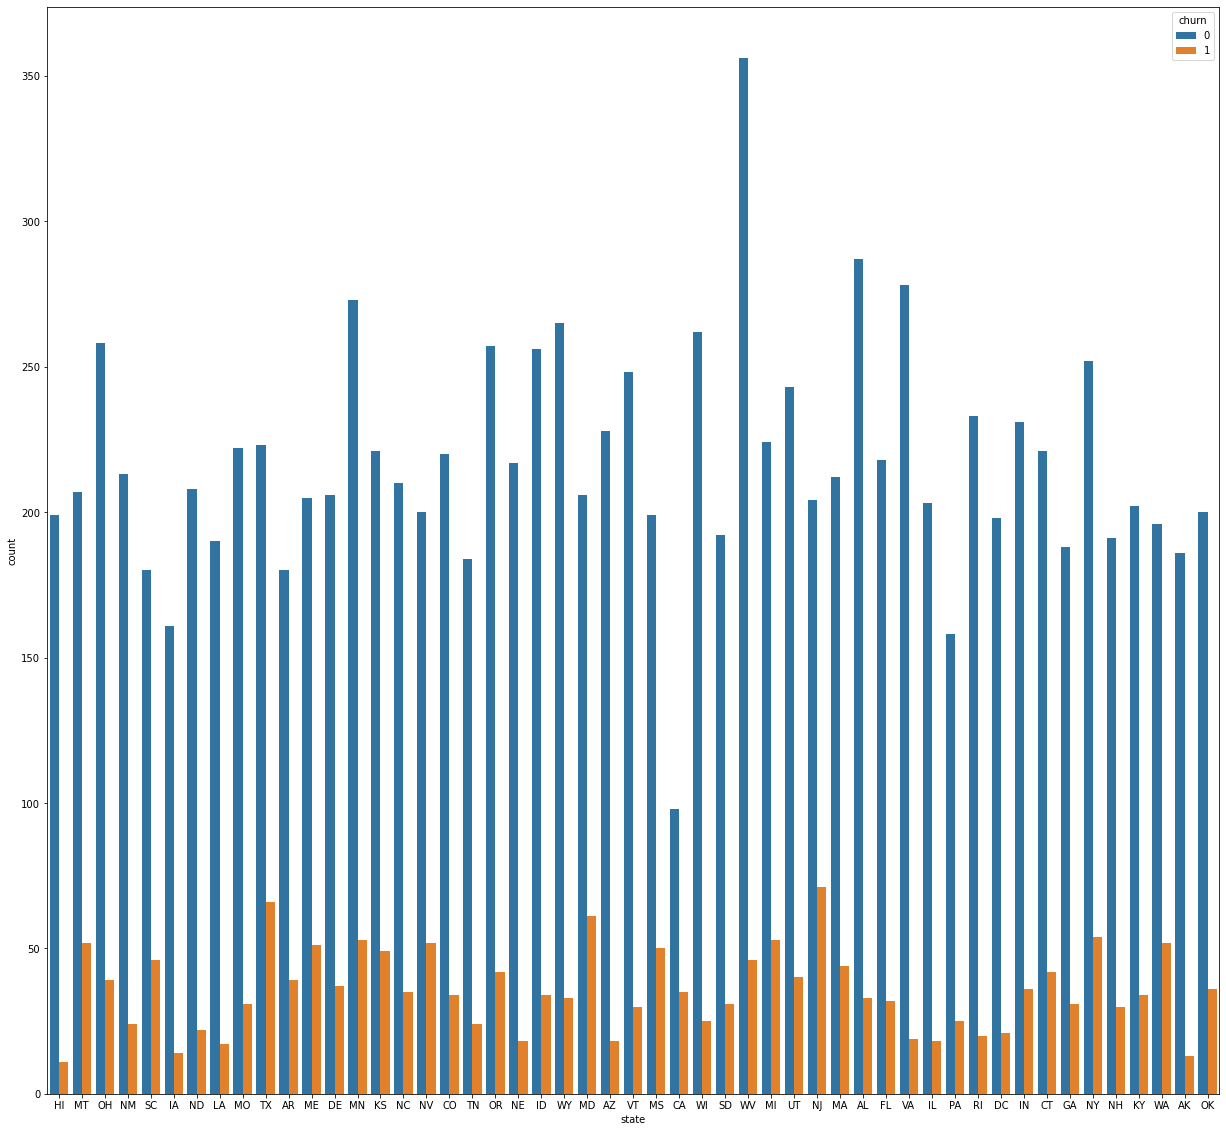

In [63]:
# Plotting countplot on 'churn' and 'state' variables.
plt.rcParams["figure.figsize"] = [21,20]
sns.countplot(x='state', hue='churn', data=df)
plt.show()

<b>Interpretation:</b>  
* We can infer that, WV state has most customers who do not churn 
* NJ state has the most customers who churn.

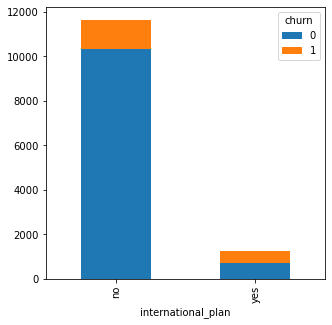

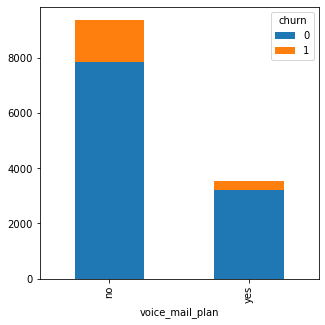

In [64]:
# Plotting bar plot on 'churn' against 'international_plan' and 'voice_mail_plan'.

# Churn by International plan
df.groupby(["international_plan", "churn"]).size().unstack().plot(kind="bar", stacked=True, figsize=(5,5))
plt.show()

# Churn by Voice mail plan
df.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind="bar", stacked=True, figsize=(5,5))
plt.show()

Interpretation:

1. Churn by International plan
Customers who do not have an international plan have churned the most.

2. Churn by Voice mail plan
Customers who do not own a voice mail plan have churned the most.

## Multivariate Analysis

## Multivariate Analysis on Dataset without Feature Engineering

### Plot to understand the correlation between the attributes on multiple numerical variables, in a single plot.

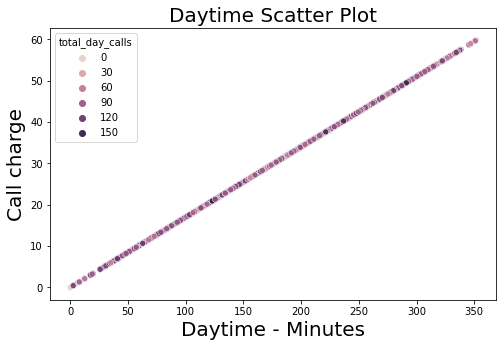

In [65]:
# Plotting scatter plot on 'total_day_minutes' and 'total_day_charge' with hue as 'total_day_calls'.
plt.rcParams["figure.figsize"] = [8,5]
sns.scatterplot('total_day_minutes', 'total_day_charge', data = df, hue='total_day_calls')

plt.xlabel("Daytime - Minutes", fontsize=20)
plt.ylabel("Call charge", fontsize=20)
plt.title("Daytime Scatter Plot", fontsize=20)
plt.show()

<b>Interpretation:</b>
    We can infer that, all the three variables are positively correlated with one another ie., as total usage of plan diring the day, total day charge vary proportionally with the total calls made during the day. 

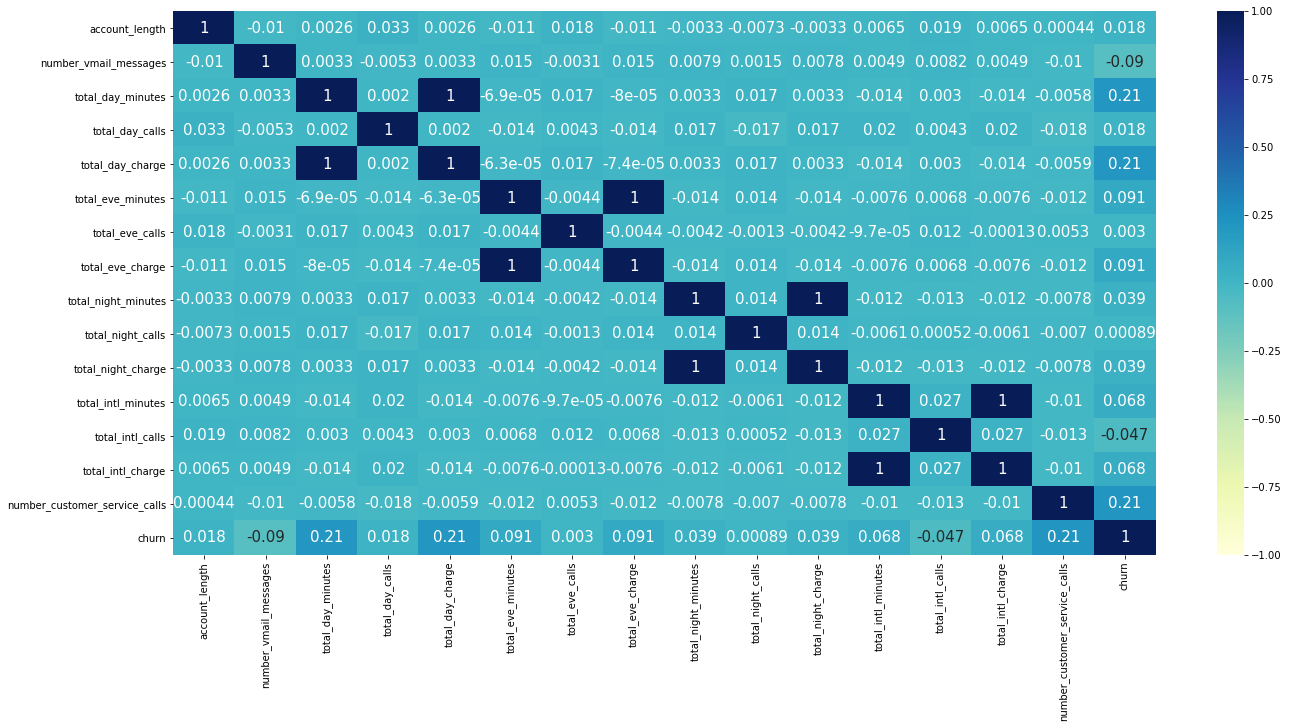

In [66]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':15})
plt.show()


<b>Interpretation:</b> 
* total_day_minutes, total_eve_minutes, total_night_minutes and total_intl_calls; and total_day_charge, total_eve_charge, total_night_charge and total_intl_charge respectively, have perfect positive correlation.
* <b>Multicollinearity</b> present in the data,we will remove that before buliding model

In [67]:
# sns.pairplot(df,diag_kind= 'kde');

## Multivariate Analysis on Dataset with Feature Engineering

### Plot to understand the correlation between the attributes on multiple numerical variables, in a single plot.

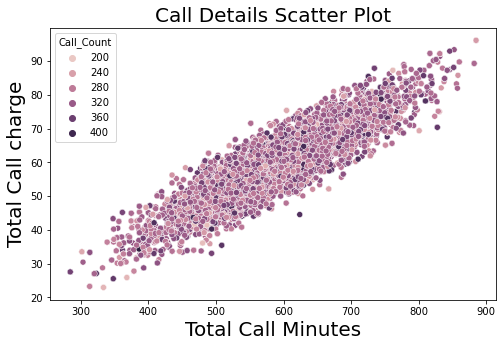

In [68]:
# Plotting scatter plot on 'total_day_minutes' and 'total_day_charge' with hue as 'total_day_calls'.
plt.rcParams["figure.figsize"] = [8,5]
sns.scatterplot('Call_Minutes', 'Total_Charge', data = df_fea, hue='Call_Count')

plt.xlabel("Total Call Minutes", fontsize=20)
plt.ylabel("Total Call charge", fontsize=20)
plt.title("Call Details Scatter Plot", fontsize=20)
plt.show()

<b>Interpretation:</b>
    We can infer that, all the three variables are positively correlated with one another ie., as total usage of plan diring the day, total day charge vary proportionally with the total calls made during the day. 

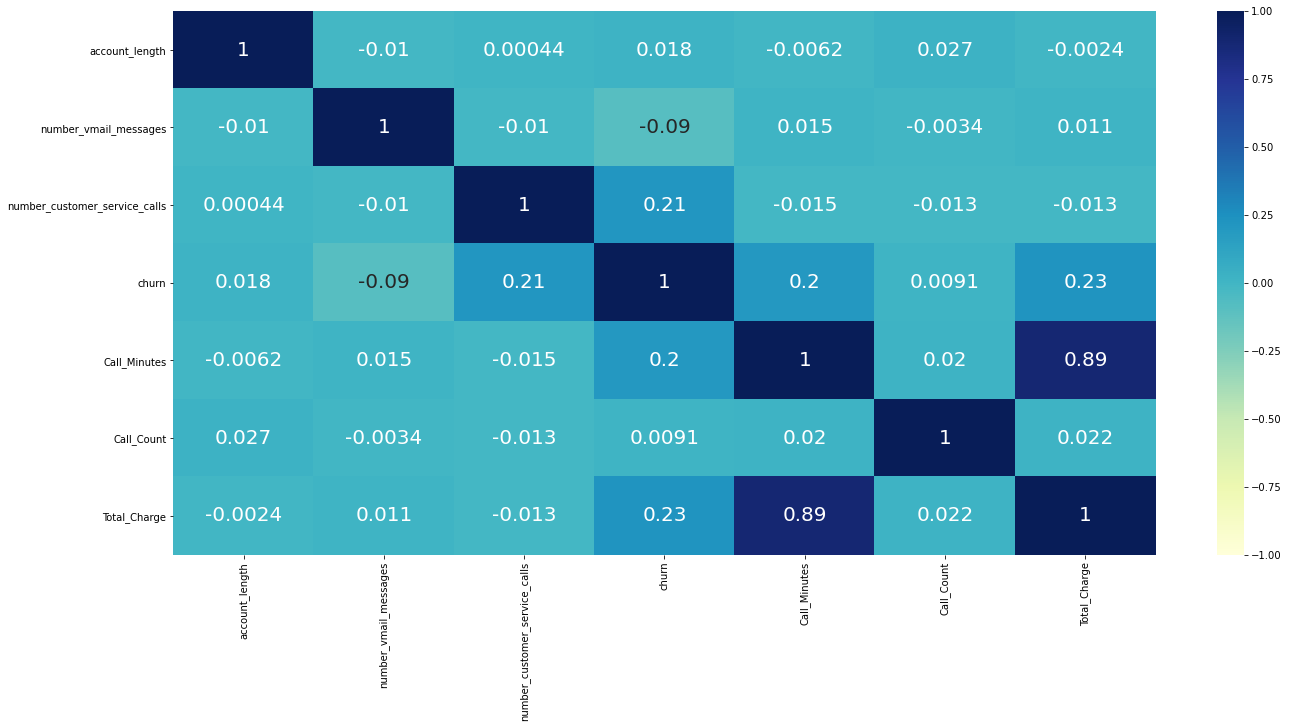

In [69]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df_fea.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':20})
plt.show()


<b>Interpretation:</b> 
* Call_minutes and Call_charge have  positive correlation.
* <b>Multicollinearity</b> present in the data,we will remove that before buliding model

In [70]:
# sns.pairplot(df_fea,diag_kind= 'kde');

## Missing Values detection - for both Dataset with & without Feature engineering

In [71]:
# Checking for null values.
df.isnull().values.any()

False

In [72]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

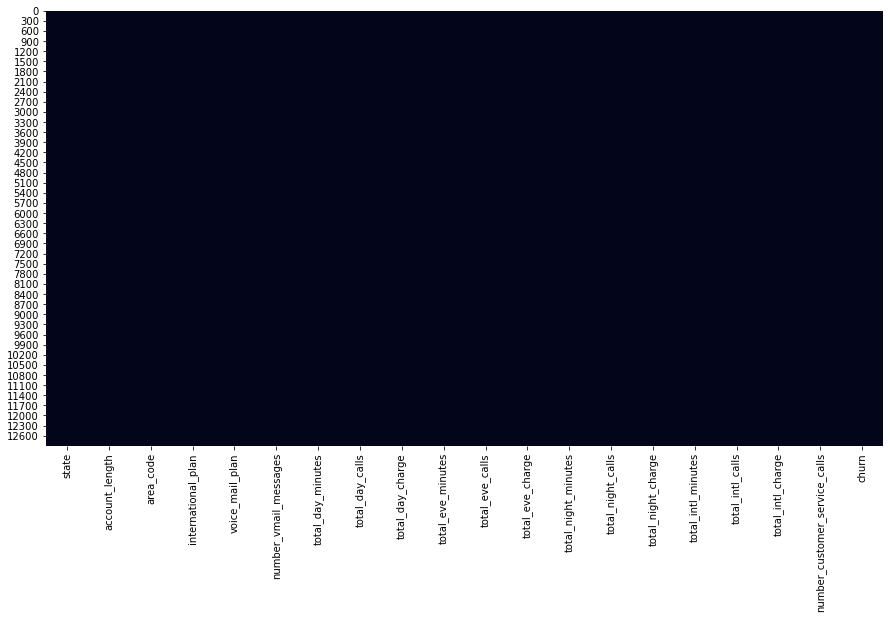

In [73]:
# Visualization of no missing values using heatmap
plt.rcParams["figure.figsize"]=[15,8]
sns.heatmap(df.isnull(), cbar = False)
plt.show()

In [74]:
# Frequency of categories to check the presence of non- standard missing values like '?' '-' 'NA'
for col in df:
    print (df[col].value_counts(), '\n')

WV    402
MN    326
AL    320
NY    306
OR    299
WY    298
OH    297
VA    297
ID    290
TX    289
WI    287
UT    283
VT    278
MI    277
NJ    275
KS    270
IN    267
MD    267
CT    263
MT    259
ME    256
MA    256
CO    254
RI    253
MO    253
NV    252
FL    250
MS    249
WA    248
AZ    246
NC    245
DE    243
NM    237
OK    236
KY    236
NE    235
ND    230
SC    226
SD    223
IL    221
NH    221
AR    219
DC    219
GA    219
HI    210
TN    208
LA    207
AK    199
PA    183
IA    175
CA    133
Name: state, dtype: int64 

87     160
90     157
105    154
93     151
86     145
      ... 
14       2
238      1
233      1
216      1
187      1
Name: account_length, Length: 218, dtype: int64 

Area 3    6401
Area 2    3248
Area 1    3243
Name: area_code, dtype: int64 

no     11651
yes     1241
Name: international_plan, dtype: int64 

no     9372
yes    3520
Name: voice_mail_plan, dtype: int64 

0     9373
31     226
28     193
29     193
33     177
24     168
27     167
26     1

<b>Interpretation:</b>
* We can infer that, there is neither standard or non-standard missing values in the considered dataset.
* Hence, no missing value treatment is required to be performed.

# Detection and Treatment for Outliers 

## Dataset without Feature Engineering

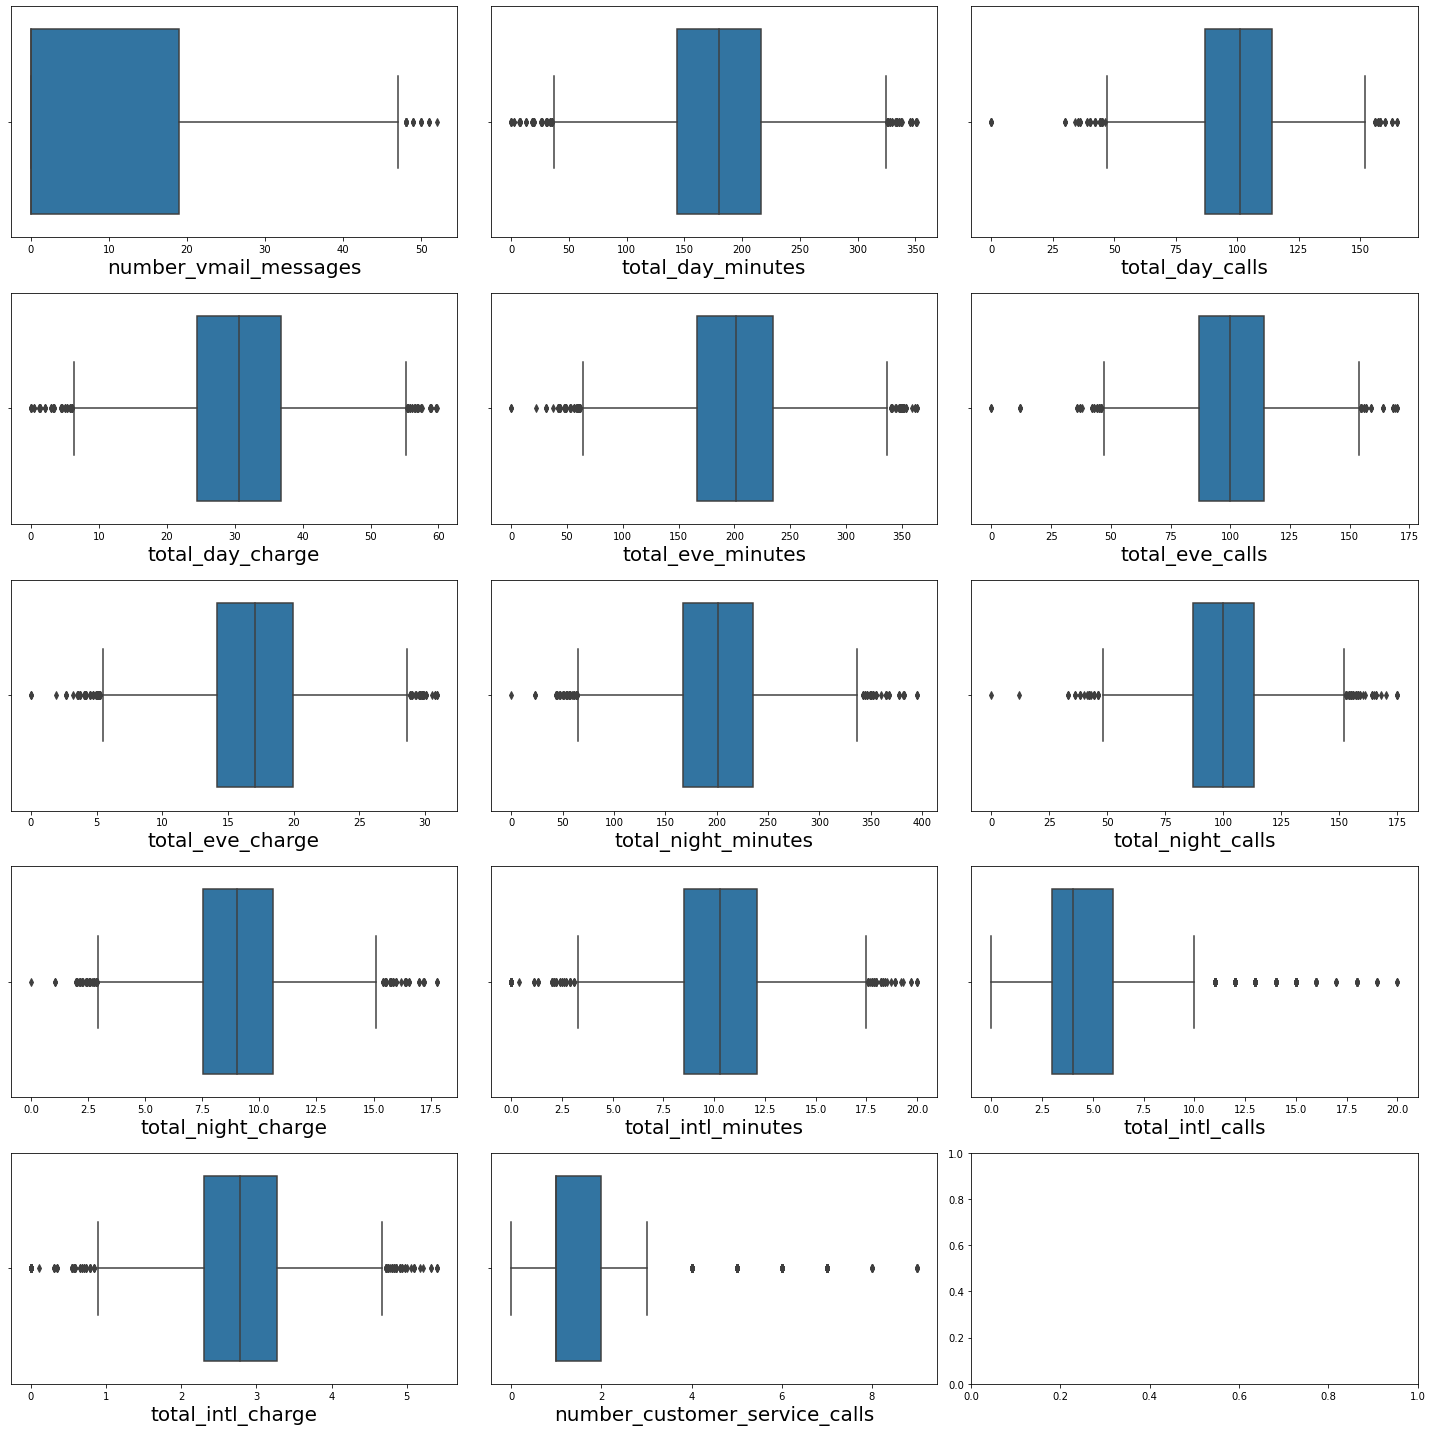

In [75]:
# Visualization of Outliers before treatment.
fig, ax = plt.subplots(5, 3, figsize=(20,20))
for variable, subplot in zip(df.columns[5:19], ax.flatten()):
    z = sns.boxplot(x = df[variable] ,ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
plt.tight_layout()

## Dataset with Feature Engineering

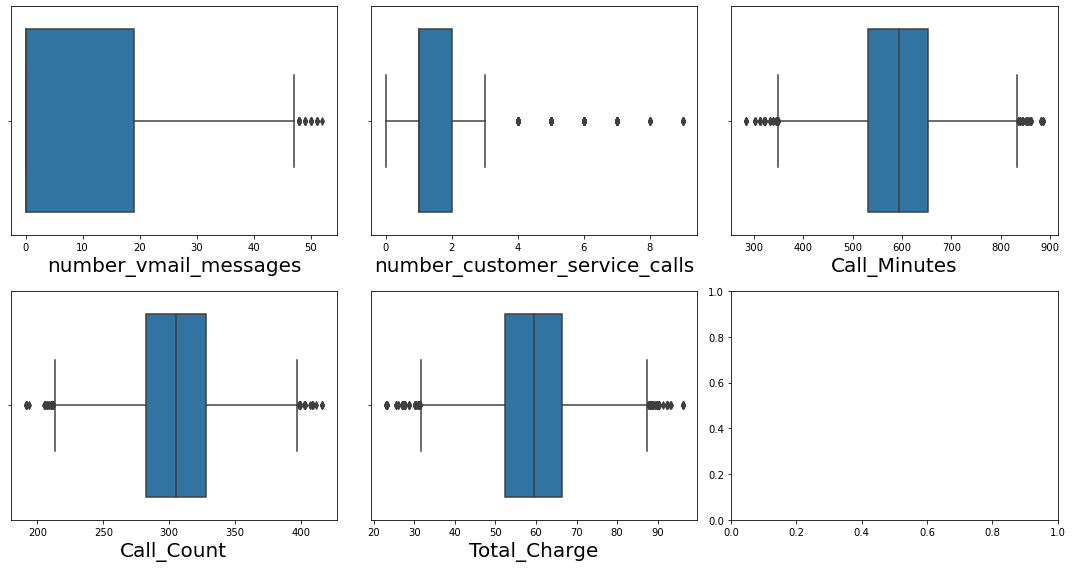

In [76]:
# Visualization of Outliers before treatment.
fig, ax = plt.subplots(2, 3, figsize=(15,8))
for variable, subplot in zip(df_fea[['number_vmail_messages','number_customer_service_calls','Call_Minutes','Call_Count','Total_Charge']], ax.flatten()):
    z = sns.boxplot(x = df_fea[variable] ,ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
plt.tight_layout()

<b>Interpretation:</b>
* There are Outliers present in the data,But while checking the variables where outlier presents, it depends upon the customer only because some customer will speak more time on call some may speak less. <b>So first we will consider the outlier as significant and do the model</b>.After that we will remove outlier bulid the model again and compare the results of both. Based on the results we will conclude which model is best

### Outlier Treatment - Inter quartile range (IQR Method)

#### Creating dataframe after oulier treatment without feature engineering



In [77]:
df_out = df.copy()

In [78]:
df_out.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [79]:
# Converting numerical variable to categorical variable.
df_out['churn'] = df_out['churn'].astype(object)

In [80]:
df_out.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [81]:
df_out_num = df_out.select_dtypes(include = np.number)
df_out_num.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [82]:
Q1 = df_out_num.quantile(0.25)   # first quartile
Q3 = df_out_num.quantile(0.75)   # third quartile
IQR1 = Q3 - Q1

print(IQR1)
print('\n')

# Filter out the Outlier values

# ~ : selects all rows which do not satisfy the condition
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (0 for 'index')
df_iqr = df_out[~((df_out < (Q1 - 1.5 * IQR1)) |(df_out > (Q3 + 1.5 * IQR1))).any(axis=1)]
df_iqr = df_iqr.reset_index( drop = True )
df_iqr

account_length                   54.00
number_vmail_messages            19.00
total_day_minutes                72.30
total_day_calls                  27.00
total_day_charge                 12.29
total_eve_minutes                68.70
total_eve_calls                  27.00
total_eve_charge                  5.84
total_night_minutes              68.10
total_night_calls                26.00
total_night_charge                3.06
total_intl_minutes                3.60
total_intl_calls                  3.00
total_intl_charge                 0.97
number_customer_service_calls     1.00
dtype: float64




state  account_length area_code international_plan voice_mail_plan  \
0        HI             101    Area 1                 no              no   
1        MT             137    Area 1                 no              no   
2        OH             103    Area 2                 no             yes   
3        NM              99    Area 3                 no              no   
4        SC             108    Area 3                 no              no   
...     ...             ...       ...                ...             ...   
10810    MT              25    Area 3                 no              no   
10811    MT             113    Area 3                 no              no   
10812    ID              88    Area 3                 no             yes   
10813    AK             120    Area 3                 no              no   
10814    UT              74    Area 3                 no              no   

       number_vmail_messages  total_day_minutes  total_day_calls  \
0                          0               70.9              123   
1                          0              223.6               86   
2                         29              294.7               95   
3                          0              216.8              123   
4                          0              197.4               78   
...                      ...                ...              ...   
10810                      0              134.3               98   
10811                      0              215.9               93   
10812                     31              181.6               91   
10813                      0              178.4               97   
10814                      0              106.4               84   

       total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                 12.05              211.9               73             18.01   
1                 38.01              244.8              139             20.81   
2                 50.10              237.3              105             20.17   
3                 36.86              126.4               88             10.74   
4                 33.56              124.0              101             10.54   
...                 ...                ...              ...               ...   
10810             22.83              202.3              109             17.20   
10811             36.70              240.1               85             20.41   
10812             30.87              213.2              120             18.12   
10813             30.33              168.3              113             14.31   
10814             18.09              140.2              104             11.92   

       total_night_minutes  total_night_calls  total_night_charge  \
0                    236.0                 73               10.62   
1                     94.2                 81                4.24   
2                    300.3                127               13.51   
3                    220.6                 82                9.93   
4                    204.5                107                9.20   
...                    ...                ...                 ...   
10810                195.9                100                8.82   
10811                156.7                123                7.05   
10812                207.8                104                9.35   
10813                120.5                 93                5.42   
10814                 90.9                 81                4.09   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
0                    10.6                 3               2.86   
1                     9.5                 7               2.57   
2                    13.7                 6               3.70   
3                    15.7                 2               4.24   
4                     7.7                 4               2.08   
...                   ...               ...                ...   
10810       

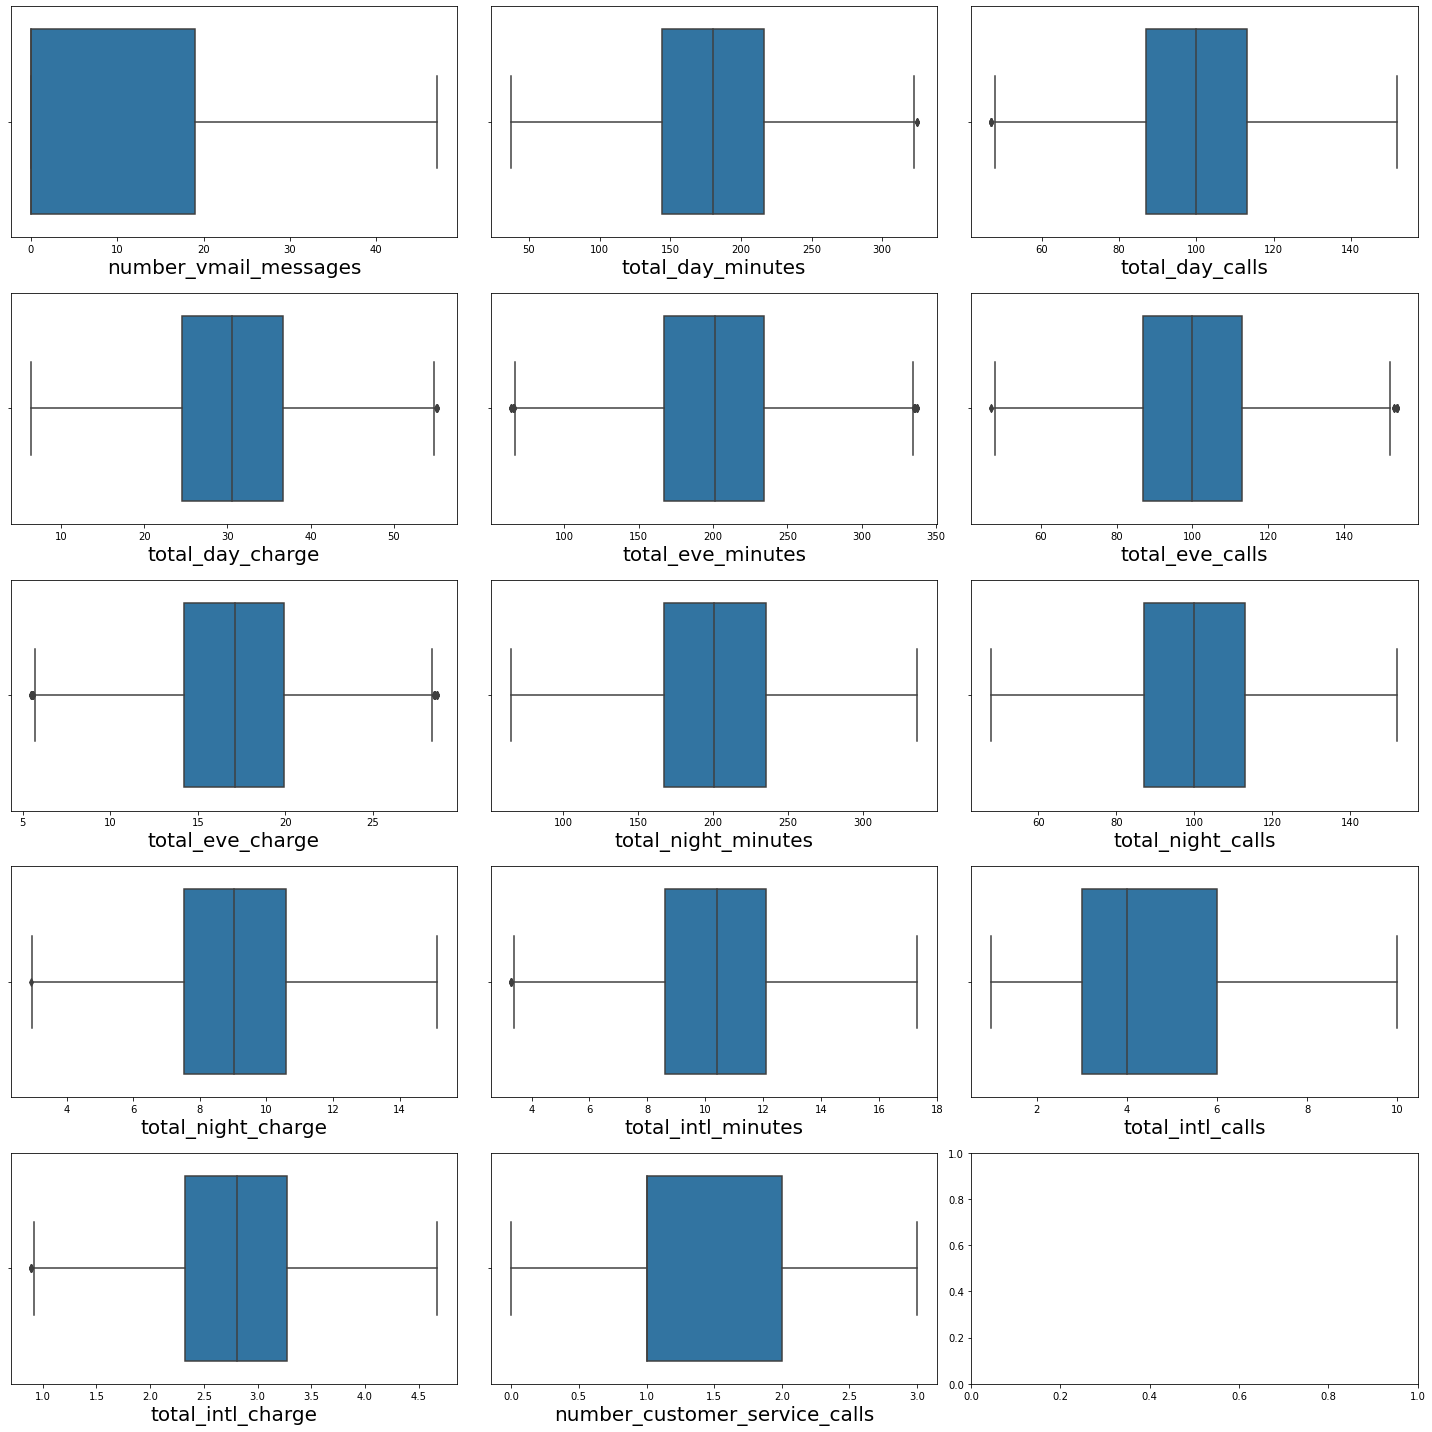

In [83]:
# Visualization of Outliers after treatment.
fig, ax = plt.subplots(5, 3, figsize=(20,20))
for variable, subplot in zip(df_iqr.columns[5:19], ax.flatten()):
    z = sns.boxplot(x = df_iqr[variable] ,ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
plt.tight_layout()

#### Creating dataframe after oulier treatment with feature engineering



In [84]:
df_fea_out = df_fea.copy()

In [85]:
df_fea_out.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages',
       'number_customer_service_calls', 'churn', 'Call_Minutes', 'Call_Count',
       'Total_Charge'],
      dtype='object')

In [86]:
# Converting numerical variable to categorical variable.
df_fea_out['churn'] = df_fea_out['churn'].astype(object)

In [87]:
df_fea_out.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
number_customer_service_calls      int64
churn                             object
Call_Minutes                     float64
Call_Count                         int64
Total_Charge                     float64
dtype: object

In [88]:
df_fea_out_num = df_fea_out.select_dtypes(include = np.number)
df_fea_out_num.columns

Index(['account_length', 'number_vmail_messages',
       'number_customer_service_calls', 'Call_Minutes', 'Call_Count',
       'Total_Charge'],
      dtype='object')

In [89]:
Q1 = df_fea_out_num.quantile(0.25)   # first quartile
Q3 = df_fea_out_num.quantile(0.75)   # third quartile
IQR2 = Q3 - Q1

print(IQR2)
print('\n')
# Filter out the Outlier values

# ~ : selects all rows which do not satisfy the condition
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (0 for 'index')
df_fea_iqr = df_fea_out[~((df_fea_out < (Q1 - 1.5 * IQR2)) |(df_fea_out > (Q3 + 1.5 * IQR2))).any(axis=1)]
df_fea_iqr = df_fea_iqr.reset_index(drop=True)
df_fea_iqr

account_length                    54.00
number_vmail_messages             19.00
number_customer_service_calls      1.00
Call_Minutes                     121.40
Call_Count                        46.00
Total_Charge                      14.04
dtype: float64




state  account_length area_code international_plan voice_mail_plan  \
0        HI             101    Area 1                 no              no   
1        MT             137    Area 1                 no              no   
2        NM              99    Area 3                 no              no   
3        SC             108    Area 3                 no              no   
4        IA             117    Area 3                 no              no   
...     ...             ...       ...                ...             ...   
11603    MT              25    Area 3                 no              no   
11604    MT             113    Area 3                 no              no   
11605    ID              88    Area 3                 no             yes   
11606    AK             120    Area 3                 no              no   
11607    UT              74    Area 3                 no              no   

       number_vmail_messages  number_customer_service_calls churn  \
0                          0                              3     0   
1                          0                              0     0   
2                          0                              1     0   
3                          0                              2     0   
4                          0                              1     0   
...                      ...                            ...   ...   
11603                      0                              2     0   
11604                      0                              3     0   
11605                     31                              1     0   
11606                      0                              1     0   
11607                      0                              1     0   

       Call_Minutes  Call_Count  Total_Charge  
0             529.4         272         43.54  
1             572.1         313         65.63  
2             579.5         295         61.77  
3             533.6         290         55.38  
4             598.0         248         62.45  
...             ...         ...           ...  
11603         545.1         312         52.25  
11604         617.6         306         65.48  
11605         614.0         319         61.42  
11606         476.5         312         52.57  
11607         348.9         272         37.18  

[11608 rows x 11 columns]

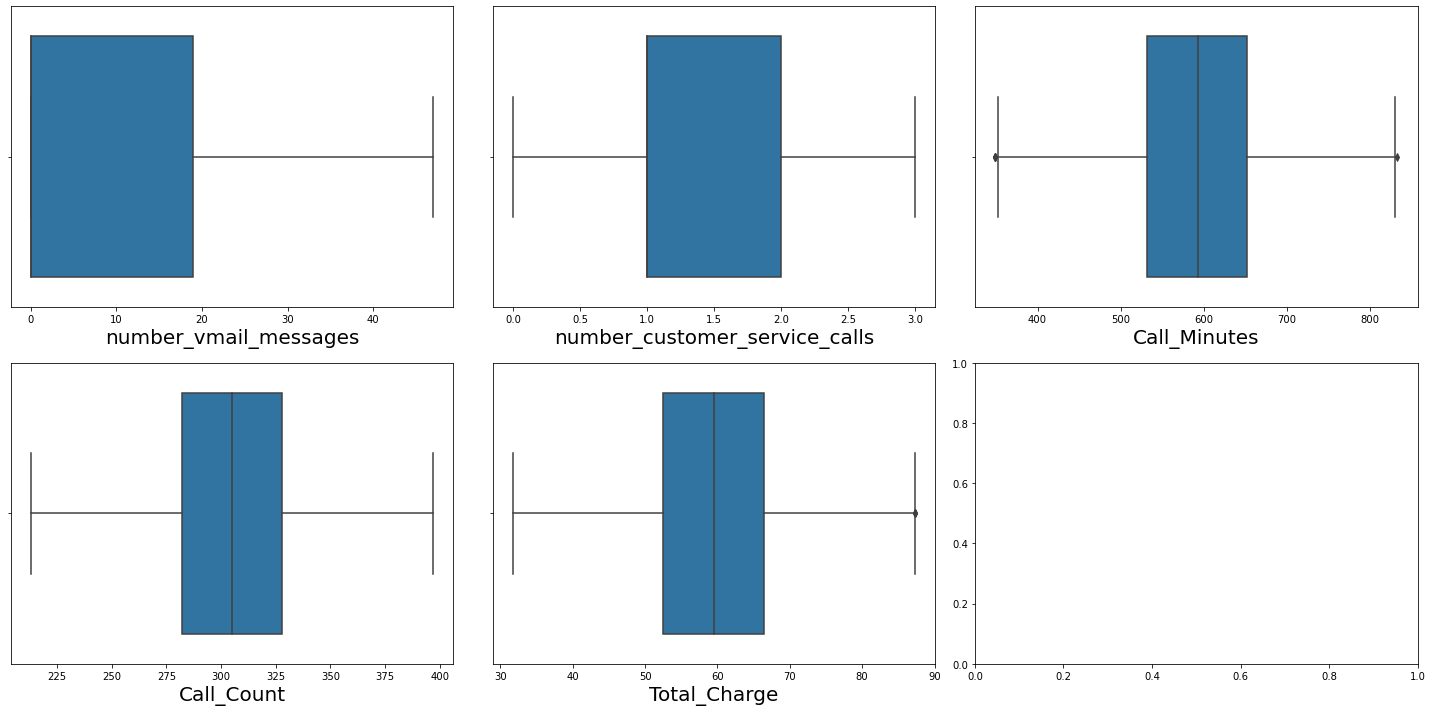

In [90]:
# Visualization of Outliers after treatment.
fig, ax = plt.subplots(2, 3, figsize=(20,10))
for variable, subplot in zip(df_fea_iqr[['number_vmail_messages','number_customer_service_calls','Call_Minutes','Call_Count','Total_Charge']], ax.flatten()):
    z = sns.boxplot(x = df_fea_iqr[variable] ,ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
plt.tight_layout()

## Transformation of Features - Dataset without Feature Engineering

In [91]:
df.skew()

account_length                   0.103428
number_vmail_messages            1.288646
total_day_minutes               -0.021381
total_day_calls                 -0.091077
total_day_charge                -0.021381
total_eve_minutes               -0.026042
total_eve_calls                 -0.046818
total_eve_charge                -0.026015
total_night_minutes              0.006204
total_night_calls                0.014347
total_night_charge               0.006188
total_intl_minutes              -0.229942
total_intl_calls                 1.348923
total_intl_charge               -0.230140
number_customer_service_calls    1.070848
churn                            2.058529
dtype: float64

* 'number of vmail messages','total international calls' and 'number of customer service calls' are highly skewed.
* We will do transformation techniques to remove the skewness

Skewness before transformation: 1.2886456274866787


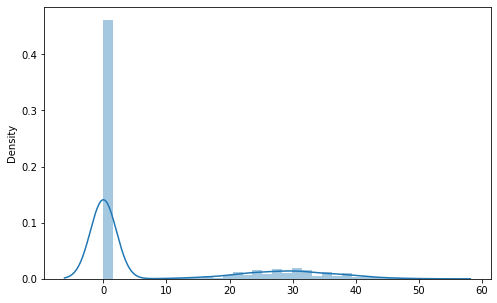

In [92]:
#number_vmail_messages 

plt.rcParams["figure.figsize"] = [8,5]
sns.distplot(df[['number_vmail_messages']])
print('Skewness before transformation:', df['number_vmail_messages'].skew())
plt.show()

Skewness after square root tranformation: 1.0978242659655713


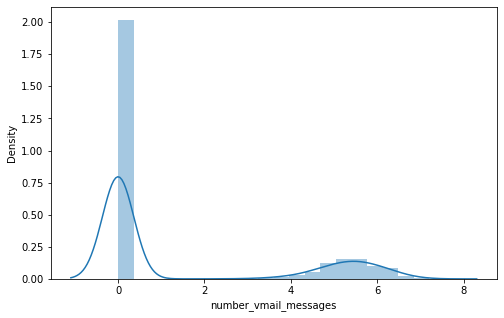

In [93]:
# Performing square root transformation on 'number_vmail_messages' attribute.
plt.rcParams["figure.figsize"] = [8,5]
df['number_vmail_messages'] = np.sqrt(df['number_vmail_messages'])
print('Skewness after square root tranformation:', df['number_vmail_messages'].skew())
sns.distplot(df['number_vmail_messages'])
plt.show()

Skewness before transformation: 1.34892344956006


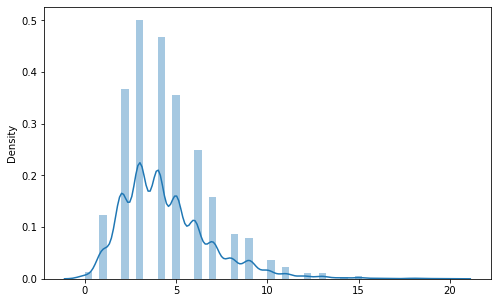

In [94]:
#total_international_calls 

plt.rcParams["figure.figsize"] = [8,5]
sns.distplot(df[['total_intl_calls']])
print('Skewness before transformation:', df['total_intl_calls'].skew())
plt.show()

Skewness after square root tranformation: 0.25221366183103067


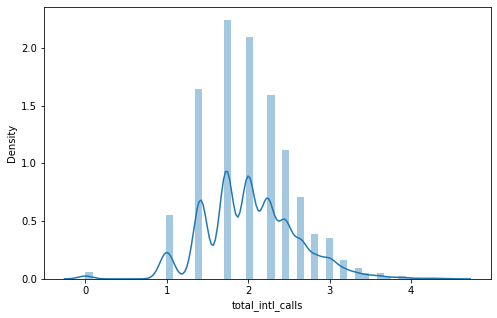

In [95]:
# Performing square root transformation on 'total_intl_calls' attribute.
plt.rcParams["figure.figsize"] = [8,5]
df['total_intl_calls'] = np.sqrt(df['total_intl_calls'])
print('Skewness after square root tranformation:', df['total_intl_calls'].skew())
sns.distplot(df['total_intl_calls'])
plt.show()

Skewness before transformation: 1.0708477253135023


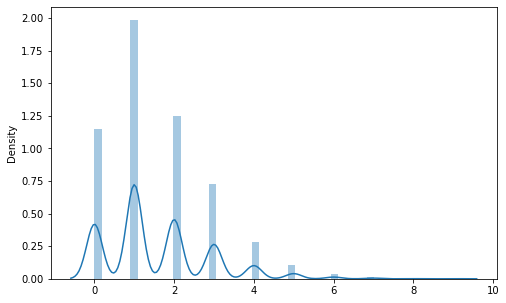

In [96]:
#total_number_customer_service_calls

plt.rcParams["figure.figsize"] = [8,5]
sns.distplot(df[['number_customer_service_calls']])
print('Skewness before transformation:', df['number_customer_service_calls'].skew())
plt.show()

Skewness after square root tranformation: -0.3871384561514076


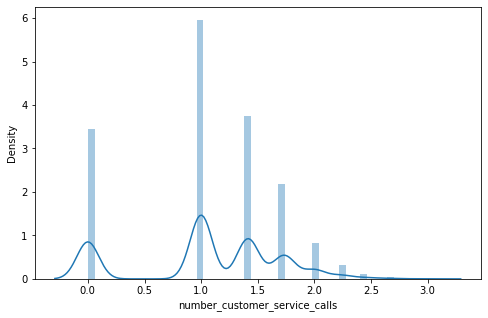

In [97]:
# Performing square root transformation on 'number_customer_service_calls' attribute.
plt.rcParams["figure.figsize"] = [8,5]
df['number_customer_service_calls'] = np.sqrt(df['number_customer_service_calls'])
print('Skewness after square root tranformation:', df['number_customer_service_calls'].skew())
sns.distplot(df['number_customer_service_calls'])
plt.show()

<b>Interpretation:</b>
    We can infer that, the three attributes which were highly skewed are now transformed to normally distributed data.

## Transformation of Features - Dataset with Feature Engineering

In [98]:
df_fea.skew()

account_length                   0.103428
number_vmail_messages            1.288646
number_customer_service_calls    1.070848
churn                            2.058529
Call_Minutes                    -0.015261
Call_Count                      -0.030592
Total_Charge                    -0.023561
dtype: float64

* 'number of vmail messages' and 'number of customer service calls' are highly skewed.
* We will do transformation techniques to remove the skewness

Skewness before transformation: 1.2886456274866787


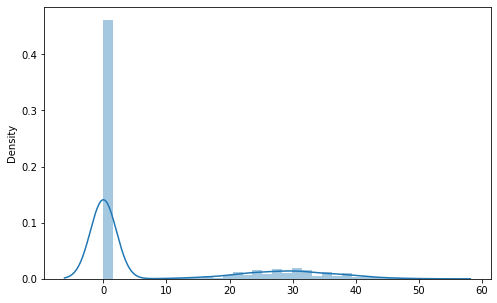

In [99]:
#number_vmail_messages 

plt.rcParams["figure.figsize"] = [8,5]
sns.distplot(df_fea[['number_vmail_messages']])
print('Skewness before transformation:', df_fea['number_vmail_messages'].skew())
plt.show()

Skewness after square root tranformation: 1.0978242659655713


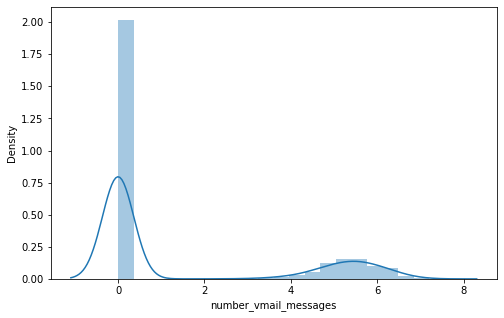

In [100]:
# Performing square root transformation on 'number_vmail_messages' attribute.
plt.rcParams["figure.figsize"] = [8,5]
df_fea['number_vmail_messages'] = np.sqrt(df_fea['number_vmail_messages'])
print('Skewness after square root tranformation:', df_fea['number_vmail_messages'].skew())
sns.distplot(df_fea['number_vmail_messages'])
plt.show()

Skewness before transformation: 1.0708477253135023


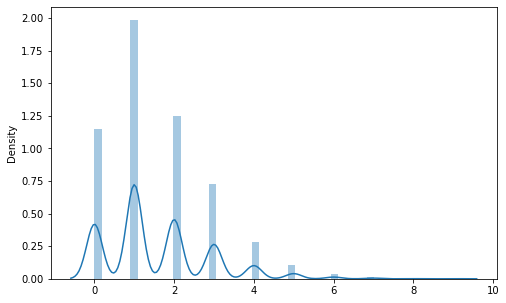

In [101]:
#total_number_customer_service_calls

plt.rcParams["figure.figsize"] = [8,5]
sns.distplot(df_fea[['number_customer_service_calls']])
print('Skewness before transformation:', df_fea['number_customer_service_calls'].skew())
plt.show()

Skewness after square root tranformation: -0.3871384561514076


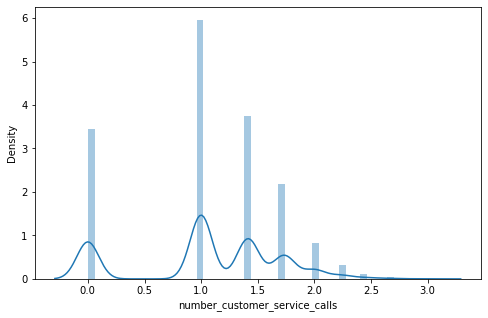

In [102]:
# Performing square root transformation on 'number_customer_service_calls' attribute.
plt.rcParams["figure.figsize"] = [8,5]
df_fea['number_customer_service_calls'] = np.sqrt(df_fea['number_customer_service_calls'])
print('Skewness after square root tranformation:', df_fea['number_customer_service_calls'].skew())
sns.distplot(df_fea['number_customer_service_calls'])
plt.show()

<b>Interpretation:</b>
    We can infer that, the three attributes which were highly skewed are now transformed to normally distributed data.

## Transformation of Features - Dataset without Feature Engineering (after Outlier Treatment)

In [103]:
df_iqr.skew()

account_length                   0.020157
number_vmail_messages            1.276397
total_day_minutes               -0.007013
total_day_calls                  0.007990
total_day_charge                -0.007011
total_eve_minutes                0.014570
total_eve_calls                  0.007853
total_eve_charge                 0.014610
total_night_minutes             -0.021081
total_night_calls               -0.041537
total_night_charge              -0.021066
total_intl_minutes              -0.049890
total_intl_calls                 0.675737
total_intl_charge               -0.049779
number_customer_service_calls    0.279458
churn                            2.578319
dtype: float64

* 'number of vmail messages' are highly skewed is 1.195 
* We will do transformation techniques to remove the skewness

Skewness before transformation: 1.2763969620980258


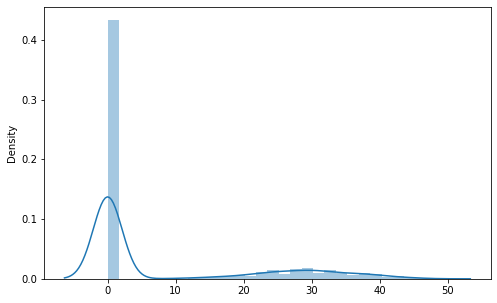

In [104]:
#number_vmail_messages 

plt.rcParams["figure.figsize"] = [8,5]
sns.distplot(df_iqr[['number_vmail_messages']])
print('Skewness before transformation:', df_iqr['number_vmail_messages'].skew())
plt.show()

Skewness after square root tranformation: 1.0962444270739231


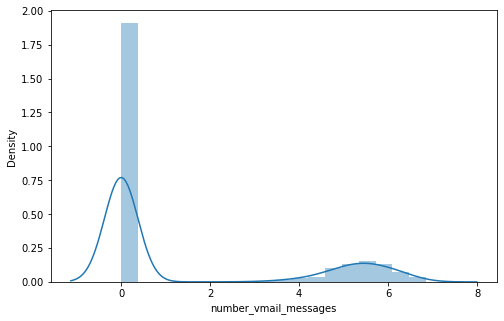

In [105]:
# Performing square root transformation on 'number_vmail_messages' attribute.
plt.rcParams["figure.figsize"] = [8,5]
df_iqr['number_vmail_messages'] = np.sqrt(df_iqr['number_vmail_messages'])
print('Skewness after square root tranformation:', df_iqr['number_vmail_messages'].skew())
sns.distplot(df_iqr['number_vmail_messages'])
plt.show()

<b>Interpretation:</b>
    We can infer that, the number_vmail_messages attributes which was highly skewed are now transformed to normally distributed data.

## Transformation of Features - Dataset with Feature Engineering (after Outlier Treatment)

In [106]:
df_fea_iqr.skew()

account_length                   0.022087
number_vmail_messages            1.277152
number_customer_service_calls    0.289155
churn                            2.563742
Call_Minutes                    -0.005701
Call_Count                      -0.000369
Total_Charge                    -0.020234
dtype: float64

* 'number of vmail messages' are highly skewed is 1.194
* We will do transformation techniques to remove the skewness

Skewness before transformation: 1.27715208723875


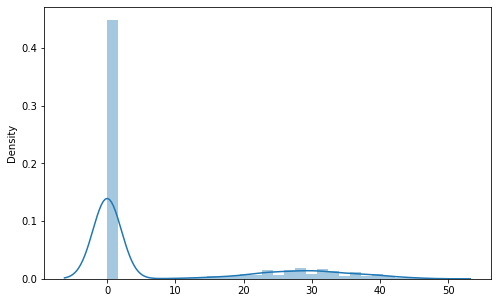

In [107]:
#number_vmail_messages 

plt.rcParams["figure.figsize"] = [8,5]
sns.distplot(df_fea_iqr[['number_vmail_messages']])
print('Skewness before transformation:', df_fea_iqr['number_vmail_messages'].skew())
plt.show()

Skewness after square root tranformation: 1.0949626359319131


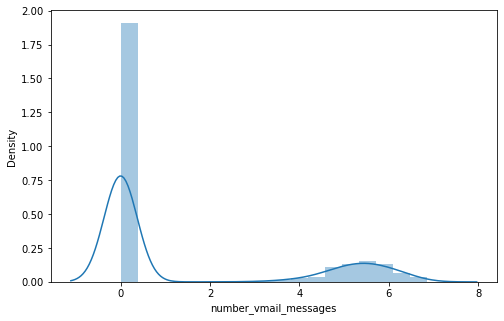

In [108]:
# Performing square root transformation on 'number_vmail_messages' attribute.
plt.rcParams["figure.figsize"] = [8,5]
df_fea_iqr['number_vmail_messages'] = np.sqrt(df_fea_iqr['number_vmail_messages'])
print('Skewness after square root tranformation:', df_fea_iqr['number_vmail_messages'].skew())
sns.distplot(df_fea_iqr['number_vmail_messages'])
plt.show()

<b>Interpretation:</b>
    We can infer that, the number_vmail_messages attributes which was highly skewed are now transformed to normally distributed data.

## Handling Non-Numeric Data - Dummy Encode the Categorical Variables

There are categorical variables in the considered dataset and it is important to convert these categorical variables to numerical variables as Machine Learning Algorithms are designed to work with numeric type.

### Dataset without Feature Enginering

#### Split the dependent and independent variable

In [109]:
# store the target variable 'churn' in a dataframe 'df_target'
df_target = df['churn']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'churn' using drop()
# 'axis = 1' drops the specified column
df_predictor = df.drop('churn', axis = 1)

In [110]:
df_predictor.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

#### Filter numerical and categorical variables

In [111]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_numerical = df_predictor.select_dtypes(include = [np.number])

# display numerical features
df_numerical.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [112]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_categorical = df_predictor.select_dtypes(include = [np.object])

# display categorical features
df_categorical.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

### Dataset with Feature Enginering

#### Split the dependent and independent variable

In [113]:
df_fea_target = df_fea['churn']

df_fea_predictor = df_fea.drop('churn', axis = 1)

In [114]:
df_fea_predictor.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages',
       'number_customer_service_calls', 'Call_Minutes', 'Call_Count',
       'Total_Charge'],
      dtype='object')

#### Filter numerical and categorical variables

In [115]:
df_fea_numerical = df_fea_predictor.select_dtypes(include = [np.number])

df_fea_numerical.columns

Index(['account_length', 'number_vmail_messages',
       'number_customer_service_calls', 'Call_Minutes', 'Call_Count',
       'Total_Charge'],
      dtype='object')

In [116]:
df_fea_categorical = df_fea_predictor.select_dtypes(include = [np.object])

df_fea_categorical.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

In [117]:
# use 'get_dummies' from pandas to create dummy variables for area_code,international_plan,voice_mail_plan
df_fea_categorical = pd.get_dummies(data = df_fea_categorical, columns = ['area_code','international_plan','voice_mail_plan'], drop_first = True)

In [118]:
#use label encoding for state
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# fit the encoder on 'State' 
df_fea_categorical['state'] = labelencoder.fit_transform(df_fea_categorical.state)

# display first 5 observations
df_fea_categorical.head()

state  area_code_Area 2  area_code_Area 3  international_plan_yes  \
0     11                 0                 0                       0   
1     26                 0                 0                       0   
2     35                 1                 0                       0   
3     32                 0                 1                       0   
4     40                 0                 1                       0   

   voice_mail_plan_yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0

### Dataset without Feature Enginering (After Outlier Treatment)

#### Split the dependent and independent variable

In [119]:
df_iqr_target = df_iqr['churn'].astype('int64')

df_iqr_predictor = df_iqr.drop('churn', axis = 1)

In [120]:
df_iqr_predictor.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

#### Filter numerical and categorical variables

In [121]:
df_iqr_numerical = df_iqr_predictor.select_dtypes(include = [np.number])

df_iqr_numerical.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [122]:
df_iqr_categorical = df_iqr_predictor.select_dtypes(include = [np.object])

df_iqr_categorical.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

### Dataset with Feature Enginering (After Outlier Treatment)

#### Split the dependent and independent variable

In [123]:
df_fea_iqr_target = df_fea_iqr['churn'].astype('int64')

df_fea_iqr_predictor = df_fea_iqr.drop('churn', axis = 1)

In [124]:
df_fea_iqr_predictor.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages',
       'number_customer_service_calls', 'Call_Minutes', 'Call_Count',
       'Total_Charge'],
      dtype='object')

#### Filter numerical and categorical variables

In [125]:
df_fea_iqr_numerical = df_fea_iqr_predictor.select_dtypes(include = [np.number])

df_fea_iqr_numerical.columns

Index(['account_length', 'number_vmail_messages',
       'number_customer_service_calls', 'Call_Minutes', 'Call_Count',
       'Total_Charge'],
      dtype='object')

In [126]:
df_fea_iqr_categorical = df_fea_iqr_predictor.select_dtypes(include = [np.object])

df_fea_iqr_categorical.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

##  Assumptions Before Model

1. Target variable - Here our Target variable is Categorical so our problem is Classification problem
2. No or little multicollinearity

<b>Multicollinearity: </b>
The presence of multicollinearity can destabilize the model. Thus, the existence of multicollinearity must be detected and corrected actions should be taken.

If we use dummy variables to encode a categorical variable and do not omit the parent column, then this results in a strong correlation between the dummy variables and the parent column.

## Dataset without Feature Enginering

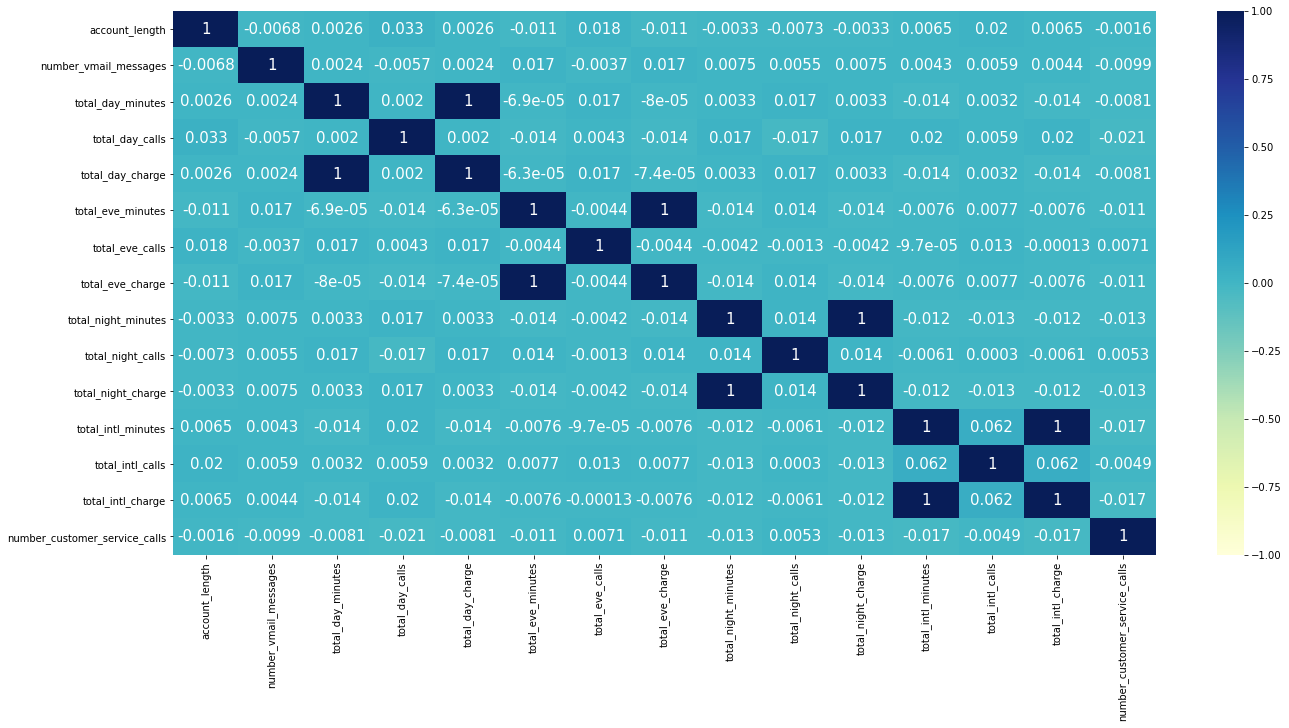

In [127]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df_predictor.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':15})
plt.show()

<b>Interpretation:</b> total_day_minutes, total_eve_minutes, total_night_minutes and total_intl_minutes; and total_day_charge, total_eve_charge, total_night_charge and total_intl_charge respectively, have perfect positive correlation.

## <b>Above multi collinearity is overcomed by:</b>


1.Variation Inflation Factor technique.

2.Directly Dropping the required Highly Correlated Feature with the help of Heatmap

### 1. The Variance Inflation Factor (VIF)

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
df_target_vif = df_target.copy()

In [130]:
# filter the numerical features in the dataset
df_numerical_vif = df_predictor.select_dtypes(include=[np.number])

# display the first five observations
df_numerical_vif.head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             101               0.000000               70.9              123   
1             137               0.000000              223.6               86   
2             103               5.385165              294.7               95   
3              99               0.000000              216.8              123   
4             108               0.000000              197.4               78   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             12.05              211.9               73             18.01   
1             38.01              244.8              139             20.81   
2             50.10              237.3              105             20.17   
3             36.86              126.4               88             10.74   
4             33.56              124.0              101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6          1.732051               2.86   
1                 9.5          2.645751               2.57   
2                13.7          2.449490               3.70   
3                15.7          1.414214               4.24   
4                 7.7          2.000000               2.08   

   number_customer_service_calls  
0                       1.732051  
1                       0.000000  
2                       1.000000  
3                       1.000000  
4                       1.414214

#### Calculate the VIF for each numeric variable.

In [131]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numerical_vif.values, i) for i in range(df_numerical_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numerical_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                       Features
0   1.248681e+08               total_day_charge
1   1.248636e+08              total_day_minutes
2   3.737767e+07               total_eve_charge
3   3.737670e+07              total_eve_minutes
4   1.062846e+07            total_night_minutes
5   1.062839e+07             total_night_charge
6   1.001495e+06              total_intl_charge
7   1.001030e+06             total_intl_minutes
8   2.230980e+01              total_night_calls
9   2.222154e+01                total_eve_calls
10  2.213472e+01                total_day_calls
11  1.286958e+01               total_intl_calls
12  7.161085e+00                 account_length
13  3.680163e+00  number_customer_service_calls
14  1.365416e+00          number_vmail_messages

The output shows that the variable 'total_day_charge' has the highest VIF. Now, we use the `for loop` to find VIF and remove the variables with VIF greater than 10. We set the threshold to 10, as we wish to remove the variable for which the remaining variables explain more than 90% of the variation. One can choose the threshold  other than 10. (it depends on the business requirements)

In [132]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numerical_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numerical_vif.values, i) for i in range(df_numerical_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numerical_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numerical_vif = df_numerical_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor                       Features
0    6.085560                 account_length
1    1.351479          number_vmail_messages
2    8.146020              total_day_minutes
3    8.749501               total_intl_calls
4    3.438178  number_customer_service_calls


In [133]:
df_numerical_vif.head()

account_length  number_vmail_messages  total_day_minutes  total_intl_calls  \
0             101               0.000000               70.9          1.732051   
1             137               0.000000              223.6          2.645751   
2             103               5.385165              294.7          2.449490   
3              99               0.000000              216.8          1.414214   
4             108               0.000000              197.4          2.000000   

   number_customer_service_calls  
0                       1.732051  
1                       0.000000  
2                       1.000000  
3                       1.000000  
4                       1.414214

**Interpretation** Now, we have all the variables with VIF less than 10. So, we can conclude that there is no multicollinearity in the data.<br>
We will use the above dataframe "df_numeric_features_vif" to build the model with significant variables.

<b>The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding.</b>

#### Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.

In [134]:
df_categorical_vif = df_categorical.copy()
df_categorical_vif.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

In [135]:
# use 'get_dummies' from pandas to create dummy variables for area_code,international_plan,voice_mail_plan
# use 'drop_first' to create (n-1) dummy variables

df_categorical_vif= pd.get_dummies(data = df_categorical_vif, columns = ['area_code','international_plan','voice_mail_plan'], drop_first = True)


In [136]:
#use label encoding for state

# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder on 'State' 
df_categorical_vif['state'] = labelencoder.fit_transform(df_predictor.state)

# display first 5 observations
df_categorical_vif.head()

state  area_code_Area 2  area_code_Area 3  international_plan_yes  \
0     11                 0                 0                       0   
1     26                 0                 0                       0   
2     35                 1                 0                       0   
3     32                 0                 1                       0   
4     40                 0                 1                       0   

   voice_mail_plan_yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0

### 2.Directly Dropping the required Highly Correlated Feature with the help of Heatmap

In [137]:
# store the target variable 'churn' in a dataframe 'df_target_mulcol_drop'
df_target_mulcol_drop = df_target.copy()

# store all the independent variables in a dataframe 'df_predictor_mulcol_drop' 
df_predictor_mulcol_drop = df_predictor.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'],axis = 1)

In [138]:
df_predictor_mulcol_drop.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

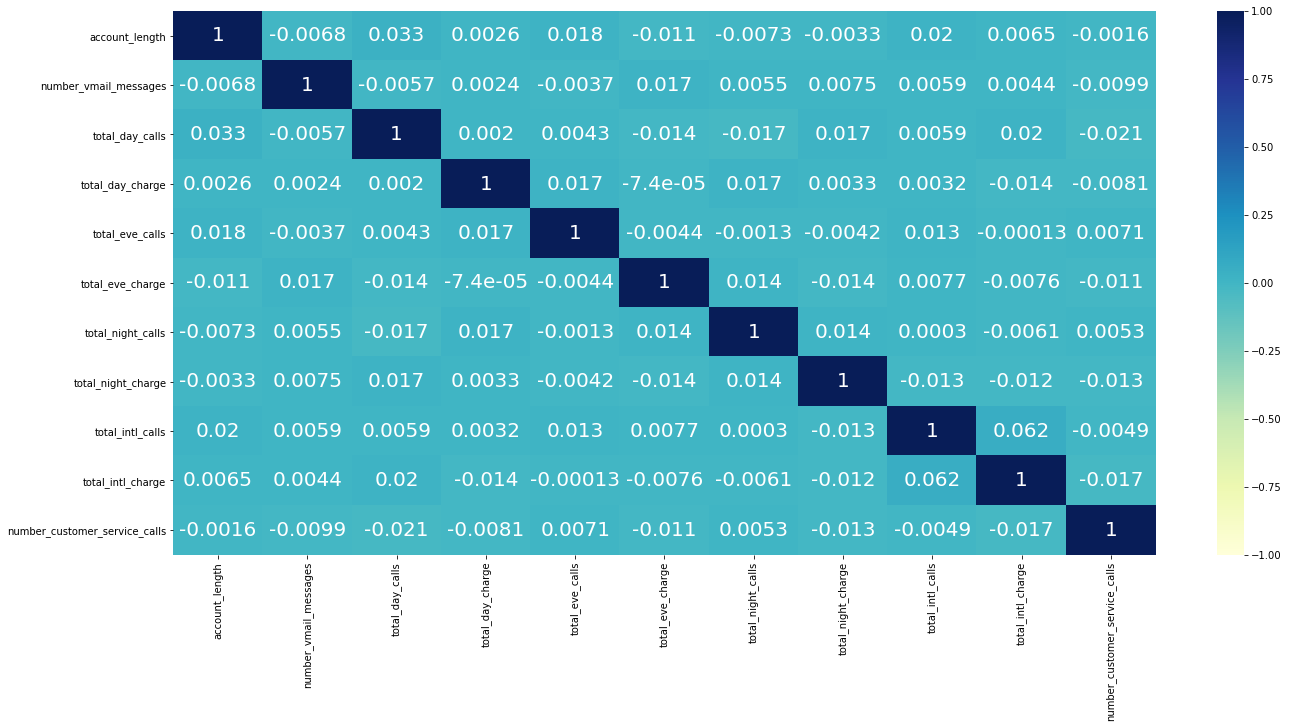

In [139]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df_predictor_mulcol_drop.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':20})
plt.show()

<b>Interpretation:</b> Thereby after removing the highly correlated (Multi collinear variables) - total_day_minutes, total_eve_minutes, total_night_minutes and total_intl_minutes, we could visulaize, above the reduction in the multi colinearity.

#### Filter numerical and categorical variables after Removing Multi collinearity Independent variables

In [140]:
# filter the numerical features in the dataset
df_numerical_mulcol_drop = df_predictor_mulcol_drop.select_dtypes(include=[np.number])

df_numerical_mulcol_drop.columns

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

In [141]:
# filter the categorical features in the dataset
df_categorical_mulcol_drop =  df_predictor_mulcol_drop.select_dtypes(include = [np.object])

df_categorical_mulcol_drop.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

<b>The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding.</b>

#### Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.

In [142]:
# use 'get_dummies' from pandas to create dummy variables for area_code,international_plan,voice_mail_plan
df_categorical_mulcol_drop = pd.get_dummies(data = df_categorical_mulcol_drop, columns = ['area_code','international_plan','voice_mail_plan'], drop_first = True)

In [143]:
#use label encoding for state
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# fit the encoder on 'State' 
df_categorical_mulcol_drop['state'] = labelencoder.fit_transform(df_predictor_mulcol_drop.state)

# display first 5 observations
df_categorical_mulcol_drop.head()

state  area_code_Area 2  area_code_Area 3  international_plan_yes  \
0     11                 0                 0                       0   
1     26                 0                 0                       0   
2     35                 1                 0                       0   
3     32                 0                 1                       0   
4     40                 0                 1                       0   

   voice_mail_plan_yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0

## Dataset with Feature Enginering

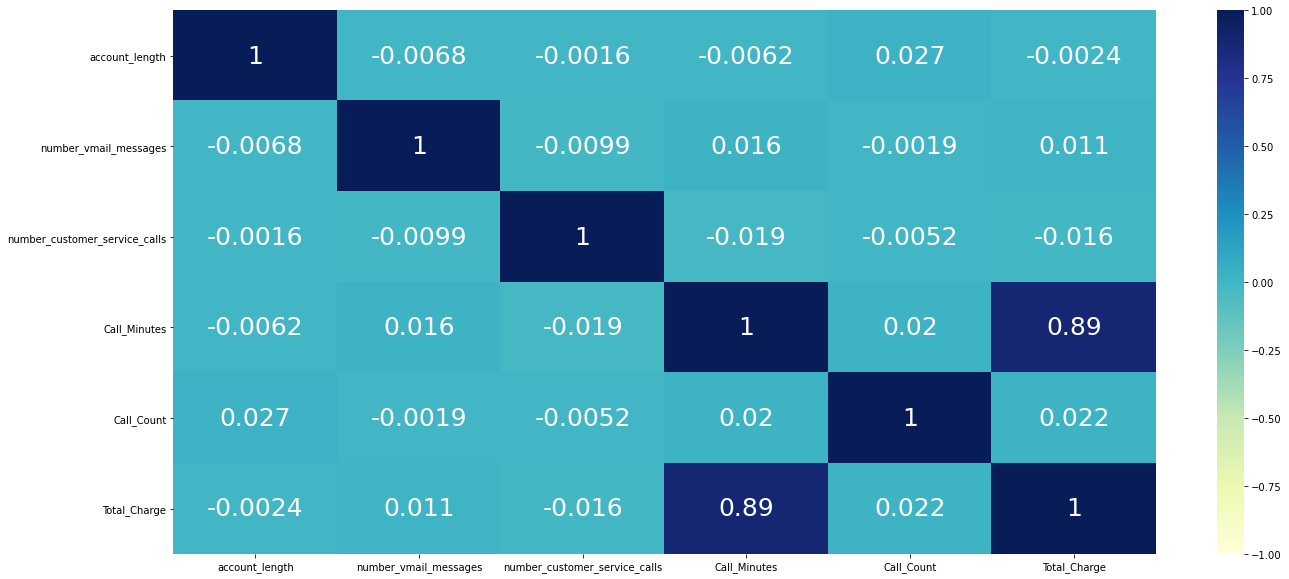

In [144]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df_fea_predictor.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':25})
plt.show()

<b>Interpretation:</b> total_day_minutes, total_eve_minutes, total_night_minutes and total_intl_calls; and total_day_charge, total_eve_charge, total_night_charge and total_intl_charge respectively, have perfect positive correlation.

### Directly Dropping the required Highly Correlated Feature with the help of Heatmap

In [145]:
# store all the independent variables in a dataframe 'df_fea_predictor_mulcol_drop' after dropping certain variables
df_fea_predictor_mulcol_drop = df_fea_predictor.drop(['Call_Minutes'],axis = 1)

In [146]:
df_fea_predictor_mulcol_drop.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages',
       'number_customer_service_calls', 'Call_Count', 'Total_Charge'],
      dtype='object')

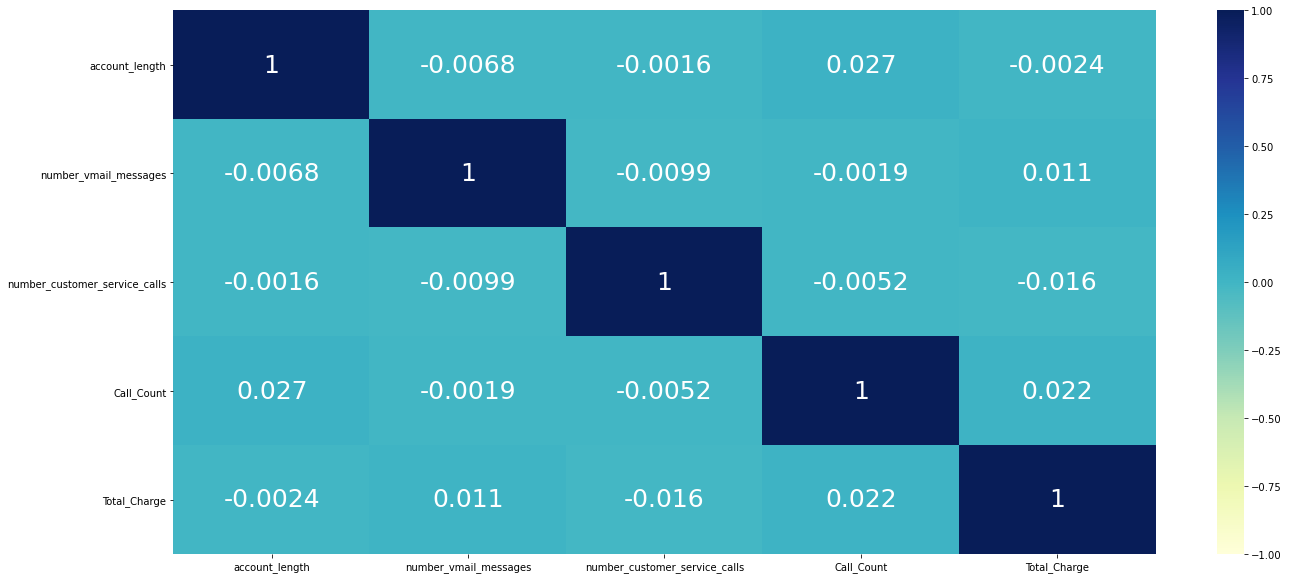

In [147]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df_fea_predictor_mulcol_drop.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':25})
plt.show()

#### Filter numerical and categorical variables after Removing Multi collinearity Independent variables

In [148]:
# filter the numerical features in the dataset
df_fea_numerical_mulcol_drop = df_fea_predictor_mulcol_drop.select_dtypes(include=[np.number])

df_fea_numerical_mulcol_drop.columns

Index(['account_length', 'number_vmail_messages',
       'number_customer_service_calls', 'Call_Count', 'Total_Charge'],
      dtype='object')

In [149]:
# filter the categorical features in the dataset
df_fea_categorical_mulcol_drop =  df_fea_predictor_mulcol_drop.select_dtypes(include = [np.object])

df_fea_categorical_mulcol_drop.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

<b>The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding.</b>

#### Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.

In [150]:
# use 'get_dummies' from pandas to create dummy variables for area_code,international_plan,voice_mail_plan
df_fea_categorical_mulcol_drop = pd.get_dummies(data = df_fea_categorical_mulcol_drop, columns = ['area_code','international_plan','voice_mail_plan'], drop_first = True)

In [151]:
#use label encoding for state
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# fit the encoder on 'State' 
df_fea_categorical_mulcol_drop['state'] = labelencoder.fit_transform(df_fea_predictor_mulcol_drop.state)

# display first 5 observations
df_fea_categorical_mulcol_drop.head()

state  area_code_Area 2  area_code_Area 3  international_plan_yes  \
0     11                 0                 0                       0   
1     26                 0                 0                       0   
2     35                 1                 0                       0   
3     32                 0                 1                       0   
4     40                 0                 1                       0   

   voice_mail_plan_yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0

## Dataset without Feature Enginering (After Outlier Treatment)

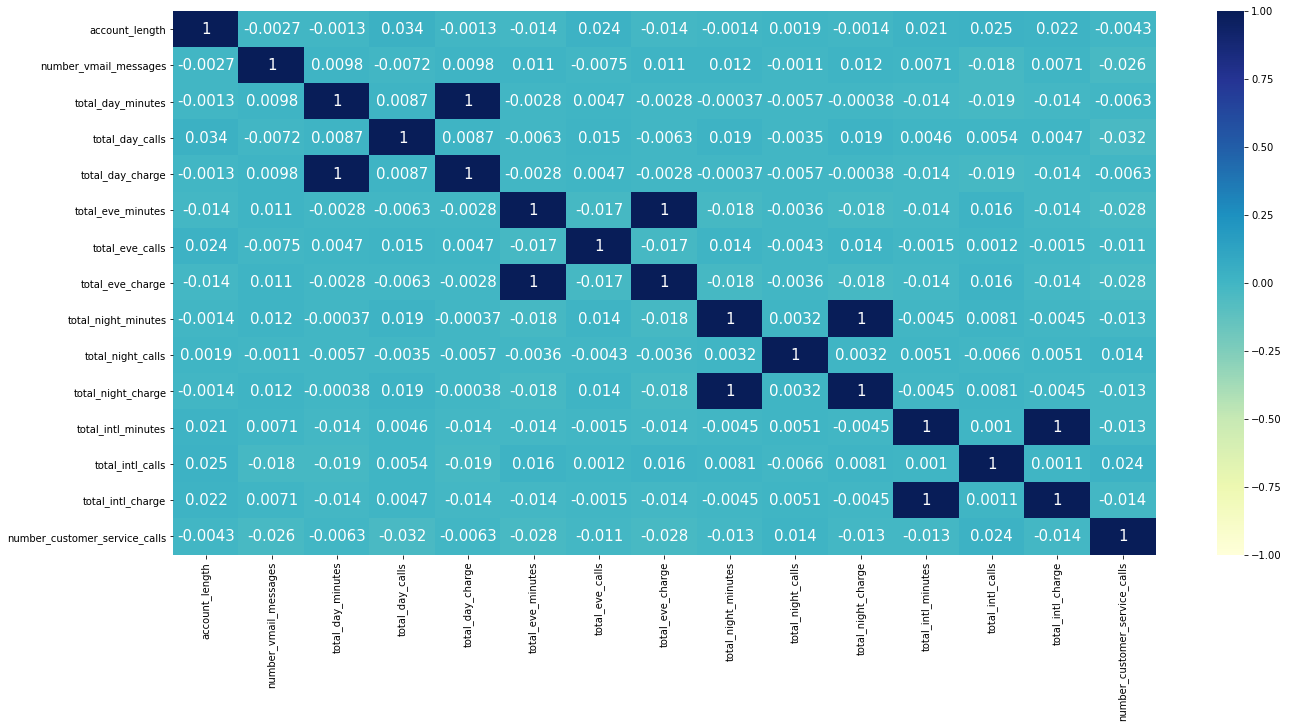

In [152]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df_iqr_predictor.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':15})
plt.show()

<b>Interpretation:</b> total_day_minutes, total_eve_minutes, total_night_minutes and total_intl_minutes; and total_day_charge, total_eve_charge, total_night_charge and total_intl_charge respectively, have perfect positive correlation.

### Directly Dropping the required Highly Correlated Feature with the help of Heatmap

In [153]:
# store all the independent variables in a dataframe 'df_iqr_predictor_mulcol_drop' after dropping certain variables
df_iqr_predictor_mulcol_drop = df_iqr_predictor.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'],axis = 1)

In [154]:
df_iqr_predictor_mulcol_drop.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

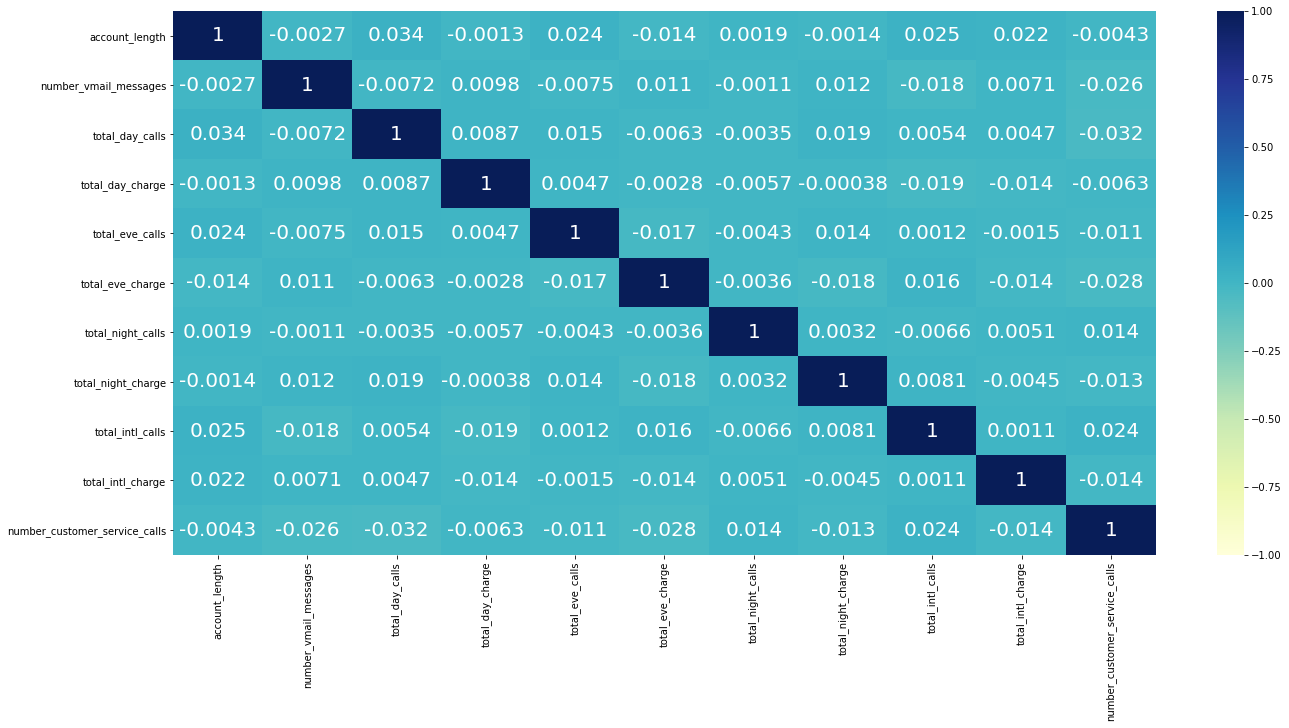

In [155]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df_iqr_predictor_mulcol_drop.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':20})
plt.show()

<b>Interpretation:</b> Thereby after removing the highly correlated (Multi collinear variables) - total_day_minutes, total_eve_minutes, total_night_minutes and total_intl_minutes, we could visulaize, above the reduction in the multi colinearity.

#### Filter numerical and categorical variables after Removing Multi collinearity Independent variables

In [156]:
# filter the numerical features in the dataset
df_iqr_numerical_mulcol_drop = df_iqr_predictor_mulcol_drop.select_dtypes(include=[np.number])

df_iqr_numerical_mulcol_drop.columns

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

In [157]:
# filter the categorical features in the dataset
df_iqr_categorical_mulcol_drop =  df_iqr_predictor_mulcol_drop.select_dtypes(include = [np.object])

df_iqr_categorical_mulcol_drop.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

<b>The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding.</b>

#### Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.

In [158]:
# use 'get_dummies' from pandas to create dummy variables for area_code,international_plan,voice_mail_plan
df_iqr_categorical_mulcol_drop = pd.get_dummies(data = df_iqr_categorical_mulcol_drop, columns = ['area_code','international_plan','voice_mail_plan'], drop_first = True)

In [159]:
#use label encoding for state
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# fit the encoder on 'State' 
df_iqr_categorical_mulcol_drop['state'] = labelencoder.fit_transform(df_iqr_predictor_mulcol_drop.state)

# display first 5 observations
df_iqr_categorical_mulcol_drop.head()

state  area_code_Area 2  area_code_Area 3  international_plan_yes  \
0     11                 0                 0                       0   
1     26                 0                 0                       0   
2     35                 1                 0                       0   
3     32                 0                 1                       0   
4     40                 0                 1                       0   

   voice_mail_plan_yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0

## Dataset with Feature Enginering (After Outlier Treatment)

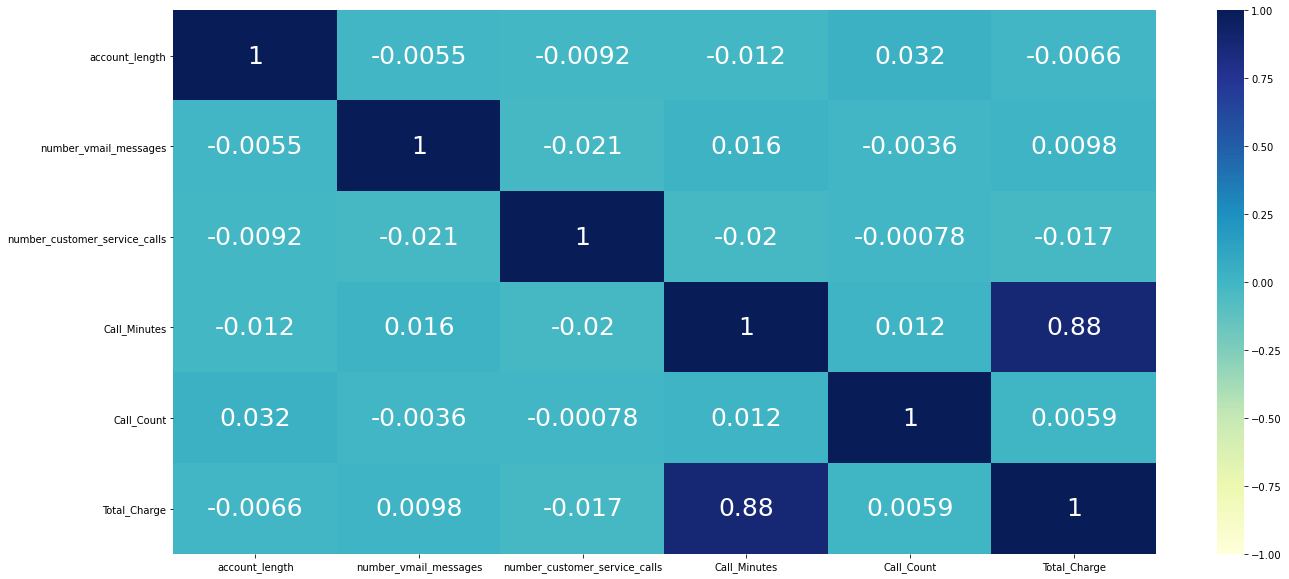

In [160]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df_fea_iqr_predictor.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':25})
plt.show()

<b>Interpretation:</b> total_day_minutes, total_eve_minutes, total_night_minutes and total_intl_calls; and total_day_charge, total_eve_charge, total_night_charge and total_intl_charge respectively, have perfect positive correlation.

### Directly Dropping the required Highly Correlated Feature with the help of Heatmap

In [161]:
# store all the independent variables in a dataframe 'df_fea_iqr_predictor_mulcol_drop' after dropping certain variables
df_fea_iqr_predictor_mulcol_drop = df_fea_iqr_predictor.drop(['Call_Minutes'],axis = 1)

In [162]:
df_fea_iqr_predictor_mulcol_drop.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages',
       'number_customer_service_calls', 'Call_Count', 'Total_Charge'],
      dtype='object')

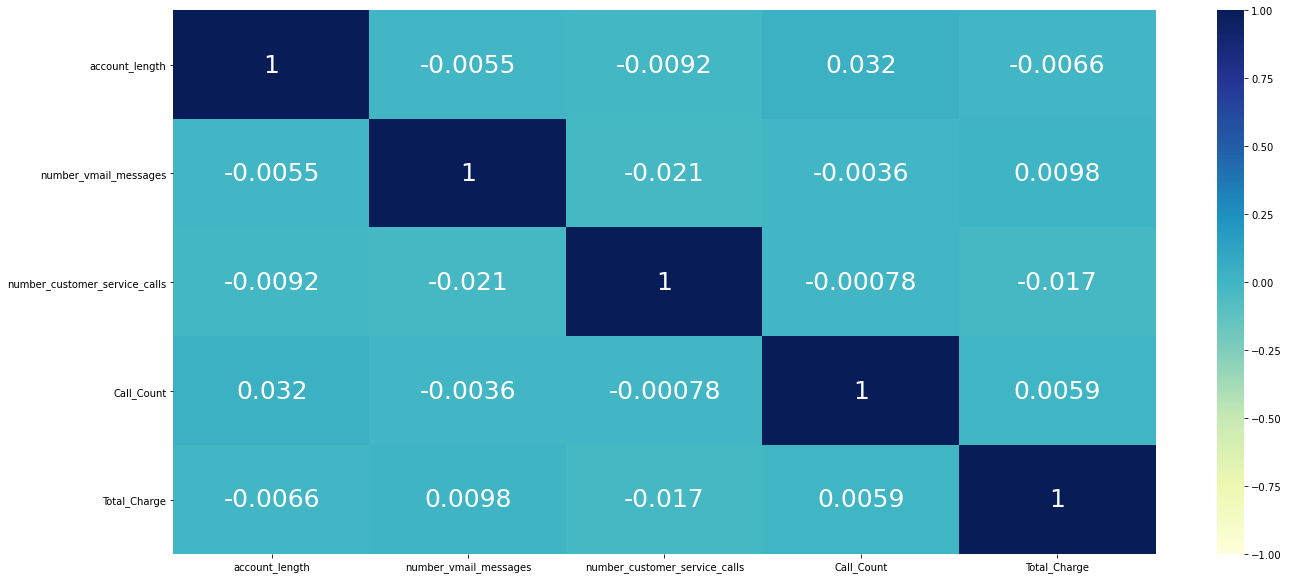

In [163]:
# Plotting heatmap on the numerical variables.
plt.figure(figsize = (22,10))
sns.heatmap(df_fea_iqr_predictor_mulcol_drop.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1,annot_kws={'size':25})
plt.show()

<b>Interpretation:</b> Thereby after removing the highly correlated (Multi collinear variables) - Total Call Minutes we could visulaize, above the reduction in the multi colinearity.

#### Filter numerical and categorical variables after Removing Multi collinearity Independent variables

In [164]:
# filter the numerical features in the dataset
df_fea_iqr_numerical_mulcol_drop = df_fea_iqr_predictor_mulcol_drop.select_dtypes(include=[np.number])

df_fea_iqr_numerical_mulcol_drop.columns

Index(['account_length', 'number_vmail_messages',
       'number_customer_service_calls', 'Call_Count', 'Total_Charge'],
      dtype='object')

In [165]:
# filter the categorical features in the dataset
df_fea_iqr_categorical_mulcol_drop =  df_fea_iqr_predictor_mulcol_drop.select_dtypes(include = [np.object])

df_fea_iqr_categorical_mulcol_drop.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

<b>The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding.</b>

#### Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.

In [166]:
# use 'get_dummies' from pandas to create dummy variables for area_code,international_plan,voice_mail_plan
df_fea_iqr_categorical_mulcol_drop = pd.get_dummies(data = df_fea_iqr_categorical_mulcol_drop, columns = ['area_code','international_plan','voice_mail_plan'], drop_first = True)

In [167]:
#use label encoding for state
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# fit the encoder on 'State' 
df_fea_iqr_categorical_mulcol_drop['state'] = labelencoder.fit_transform(df_fea_iqr_predictor_mulcol_drop.state)

# display first 5 observations
df_fea_iqr_categorical_mulcol_drop.head()

state  area_code_Area 2  area_code_Area 3  international_plan_yes  \
0     11                 0                 0                       0   
1     26                 0                 0                       0   
2     32                 0                 1                       0   
3     40                 0                 1                       0   
4     12                 0                 1                       0   

   voice_mail_plan_yes  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

### Model is built on Five aspects, in order to predict the Churn rate with the best siginificant Variable

#### 1. Dataset without Feature Engineering using VIF Technique.
#### 2. Dataset without Feature Engineering, dropped highly positive correlated columns using Heatmap.
#### 3. Dataset with Feature Engineering, dropped highly positive correlated columns  using Heatmap.
#### 4. Dataset without Feature Engineering, dropped highly positive correlated columns  using Heatmap - After Outlier Treatment.
#### 5. Dataset with Feature Engineering, dropped highly positive correlated columns using Heatmap- After Outlier Treatment.

# Scale the data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

## 1. Dataset without Feature Engineering using VIF Technique

In [168]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled1 = X_scaler.fit_transform(df_numerical_vif)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_numerical_vif_scaled = pd.DataFrame(num_scaled1, columns = df_numerical_vif.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.


In [169]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X1 = pd.concat([df_numerical_vif_scaled, df_categorical_vif], axis = 1)

# display first five observations
X1.shape

(12892, 10)

### Train-Test Split

Before applying various classification techniques to predict the churn of the customers, let us split the dataset in train and test set.

In [170]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X1 = sm.add_constant(X1)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X1_full, X1_test, y1_full,y1_test = train_test_split(X1, df_target_vif , random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X1_full', X1_full.shape)
print('y1_full', y1_full.shape)

# print dimension of test set
print('X1_test', X1_test.shape)
print('y1_test', y1_test.shape)

X1_full (10313, 11)
y1_full (10313,)
X1_test (2579, 11)
y1_test (2579,)


<b>let us split the full train dataset into train and validation sets</b>

In [171]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_full, y1_full, random_state = 10, test_size = 0.2)

print('X1_train', X1_train.shape)
print('y1_train', y1_train.shape)

print('X1_val', X1_val.shape)
print('y1_val', y1_val.shape)

X1_train (8250, 11)
y1_train (8250,)
X1_val (2063, 11)
y1_val (2063,)


#### As our Dataset is  Imbalanced, we are applying SMOTE Technique to overcome it

 #### Actual propotion : Positive class (Churn=1) is 14.14% which is very much less than negative class (churn=0 ) 85.86%.

#### SMOTE - Synthetic Minority Oversampling Technique
SMOTE  - helps to create data similar to the minority class


In [172]:
smote = SMOTE(sampling_strategy=0.3) # sampling startegy is the proportion of minority sample

X1_train_os , y1_train_os = smote.fit_resample(X1_train , y1_train)

print('X1_train_os', X1_train_os.shape)
print('y1_train_os', y1_train_os.shape)

print('X1_val', X1_val.shape)
print('y1_val', y1_val.shape)

print('X1_test', X1_test.shape)
print('y1_test', y1_test.shape)


X1_train_os (9226, 11)
y1_train_os (9226,)
X1_val (2063, 11)
y1_val (2063,)
X1_test (2579, 11)
y1_test (2579,)


Balanced the Target Variable

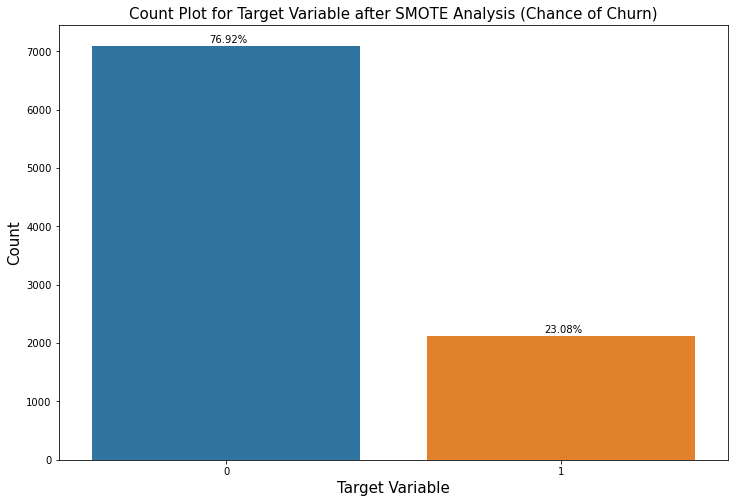

0    7097
1    2129
Name: churn, dtype: int64


In [173]:
plt.figure(figsize = [12,8])

sns.countplot(y1_train_os)

plt.text(x = -0.05, y = y1_train_os.value_counts()[0]+50, s = str(round((y1_train_os.value_counts()[0])*100/len(y1_train_os),2)) + '%')
plt.text(x = 0.95, y = y1_train_os.value_counts()[1]+50 , s = str(round((y1_train_os.value_counts()[1])*100/len(y1_train_os),2)) + '%')

plt.title('Count Plot for Target Variable after SMOTE Analysis (Chance of Churn)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()
print(y1_train_os.value_counts())

**Interpretation:**
<ul>Initially Target variable has imbalanced class distribution.</ul>
<ul>After the SMOTE Analysis Technique.</ul> <ul> Positive class (Churn=1) increased to 23.08% which seems to be balanced along with the  negative class (churn=0 ) 76.92%.</ul>


## 2. Dataset without Feature Engineering using Heatmap, dropped highly positive correlated          columns.

In [174]:
X_scaler = StandardScaler()

num_scaled2 = X_scaler.fit_transform(df_numerical_mulcol_drop)

df_numerical_mulcol_drop_scaled = pd.DataFrame(num_scaled2, columns = df_numerical_mulcol_drop.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.


In [175]:
X2 = pd.concat([df_numerical_mulcol_drop_scaled, df_categorical_mulcol_drop], axis = 1)

X2.shape

(12892, 16)

## Train-Test Split

Before applying various classification techniques to predict the churn of the customers, let us split the dataset in train and test set.

In [176]:
X2 = sm.add_constant(X2)

X2_full, X2_test, y2_full, y2_test = train_test_split(X2, df_target_mulcol_drop , random_state = 10, test_size = 0.2)

print('X2_full', X2_full.shape)
print('y2_full', y2_full.shape)

print('X2_test', X2_test.shape)
print('y2_test', y2_test.shape)

X2_full (10313, 17)
y2_full (10313,)
X2_test (2579, 17)
y2_test (2579,)


<b>let us split the full train dataset into train and validation sets</b>

In [177]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_full, y2_full, random_state = 10, test_size = 0.2)

print('X2_train', X2_train.shape)
print('y2_train', y2_train.shape)

print('X2_val', X2_val.shape)
print('y2_val', y2_val.shape)

X2_train (8250, 17)
y2_train (8250,)
X2_val (2063, 17)
y2_val (2063,)


#### SMOTE - Synthetic Minority Oversampling Technique
SMOTE  - helps to create data similar to the minority class


In [178]:
smote = SMOTE(sampling_strategy = 0.3) # sampling startegy is the proportion of minority sample

X2_train_os , y2_train_os = smote.fit_resample(X2_train , y2_train)

print('X2_train_os', X2_train_os.shape)
print('y2_train_os', y2_train_os.shape)

print('X2_val', X2_val.shape)
print('Y2_val', y2_val.shape)

print('X2_test', X2_test.shape)
print('y2_test', y2_test.shape)


X2_train_os (9226, 17)
y2_train_os (9226,)
X2_val (2063, 17)
Y2_val (2063,)
X2_test (2579, 17)
y2_test (2579,)


<ul>Initially Target variable has imbalanced class distribution.</ul>
<ul>After the SMOTE Analysis Technique.</ul> <ul> Positive class (Churn=1) increased to 23.08% which seems to be balanced along with the  negative class (churn=0 ) 76.92%.</ul>


## 3. Dataset with Feature Engineering using VIF Technique

In [179]:
X_scaler = StandardScaler()

num_scaled3 = X_scaler.fit_transform(df_fea_numerical)

df_fea_numerical_scaled = pd.DataFrame(num_scaled3, columns = df_fea_numerical.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.


In [180]:
X3 = pd.concat([df_fea_numerical_scaled, df_fea_categorical], axis = 1)

X3.shape

(12892, 11)

## Train-Test Split

Before applying various classification techniques to predict the churn of the customers, let us split the dataset in train and test set.

In [181]:
X3 = sm.add_constant(X3)

X3_full, X3_test, y3_full, y3_test = train_test_split(X3, df_fea_target , random_state = 10, test_size = 0.2)

print('X3_full', X3_full.shape)
print('y3_full', y3_full.shape)

print('X3_test', X3_test.shape)
print('y3_test', y3_test.shape)

X3_full (10313, 12)
y3_full (10313,)
X3_test (2579, 12)
y3_test (2579,)


<b>let us split the full train dataset into train and validation sets</b>

In [182]:
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_full, y3_full, random_state = 10, test_size = 0.2)

print('X3_train', X3_train.shape)
print('y3_train', y3_train.shape)

print('X3_val', X3_val.shape)
print('y3_val', y3_val.shape)

X3_train (8250, 12)
y3_train (8250,)
X3_val (2063, 12)
y3_val (2063,)


#### SMOTE - Synthetic Minority Oversampling Technique
SMOTE  - helps to create data similar to the minority class


In [183]:
#use label encoding for state
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# fit the encoder on 'State' 
df_fea_categorical['state'] = labelencoder.fit_transform(df_fea_categorical.state)

# display first 5 observations
df_fea_categorical_mulcol_drop.head()

state  area_code_Area 2  area_code_Area 3  international_plan_yes  \
0     11                 0                 0                       0   
1     26                 0                 0                       0   
2     35                 1                 0                       0   
3     32                 0                 1                       0   
4     40                 0                 1                       0   

   voice_mail_plan_yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0

In [184]:
smote = SMOTE(sampling_strategy = 0.3) # sampling startegy is the proportion of minority sample

X3_train_os , y3_train_os = smote.fit_resample(X3_train , y3_train)

print('X3_train_os', X3_train_os.shape)
print('y3_train_os', y3_train_os.shape)

print('X3_val', X3_val.shape)
print('Y3_val', y3_val.shape)

print('X3_test', X3_test.shape)
print('y3_test', y3_test.shape)



X3_train_os (9226, 12)
y3_train_os (9226,)
X3_val (2063, 12)
Y3_val (2063,)
X3_test (2579, 12)
y3_test (2579,)


<ul>Initially Target variable has imbalanced class distribution.</ul>
<ul>After the SMOTE Analysis Technique.</ul> <ul> Positive class (Churn=1) increased to 23.08% which seems to be balanced along with the  negative class (churn=0 ) 76.92%.</ul>


## 4. Dataset without Feature Engineering using Heatmap, dropped highly positive correlated columns - After Outlier Treatment.

In [185]:
X_scaler = StandardScaler()

num_scaled4 = X_scaler.fit_transform(df_iqr_numerical_mulcol_drop)

df_iqr_numerical_mulcol_drop_scaled = pd.DataFrame(num_scaled4, columns = df_iqr_numerical_mulcol_drop.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.


In [186]:
X4 = pd.concat([df_iqr_numerical_mulcol_drop_scaled, df_iqr_categorical_mulcol_drop], axis = 1)

X4.shape

(10815, 16)

# Train-Test Split

Before applying various classification techniques to predict the churn of the customers, let us split the dataset in train and test set.

In [187]:
X4 = sm.add_constant(X4)

X4_full, X4_test, y4_full, y4_test = train_test_split(X4,df_iqr_target , random_state = 10, test_size = 0.2)

print('X4_full', X4_full.shape)
print('y4_full', y4_full.shape)

print('X4_test', X4_test.shape)
print('y4_test', y4_test.shape)

X4_full (8652, 17)
y4_full (8652,)
X4_test (2163, 17)
y4_test (2163,)


<b>let us split the full train dataset into train and validation sets</b>

In [188]:
X4_train, X4_val, y4_train, y4_val = train_test_split(X4_full, y4_full, random_state = 10, test_size = 0.2)

print('X4_train', X4_train.shape)
print('y4_train', y4_train.shape)

print('X4_val', X4_val.shape)
print('y4_val', y4_val.shape)

X4_train (6921, 17)
y4_train (6921,)
X4_val (1731, 17)
y4_val (1731,)


#### As our Dataset is  Imbalanced, we are applying SMOTE Technique to overcome it

 #### Actual propotion : Positive class (Churn=1) is 14.14% which is very much less than negative class (churn=0 ) 85.86%.

#### SMOTE - Synthetic Minority Oversampling Technique
SMOTE  - helps to create data similar to the minority class


In [189]:
smote = SMOTE(sampling_strategy=0.3) # sampling startegy is the proportion of minority sample

X4_train_os , y4_train_os = smote.fit_resample(X4_train , y4_train)

print('X4_train_os', X4_train_os.shape)
print('y4_train_os', y4_train_os.shape)

print('X4_val', X4_val.shape)
print('Y4_val', y4_val.shape)

print('X4_test', X4_test.shape)
print('y4_test', y4_test.shape)


X4_train_os (8058, 17)
y4_train_os (8058,)
X4_val (1731, 17)
Y4_val (1731,)
X4_test (2163, 17)
y4_test (2163,)


Balanced the Target Variable

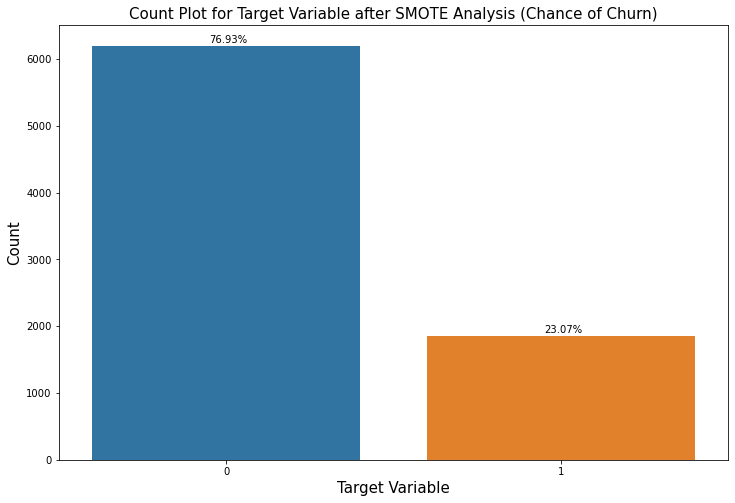

0    6199
1    1859
Name: churn, dtype: int64


In [190]:
plt.figure(figsize = [12,8])

sns.countplot(y4_train_os)
plt.text(x = -0.05, y = y4_train_os.value_counts()[0]+50, s = str(round((y4_train_os.value_counts()[0])*100/len(y4_train_os),2)) + '%')
plt.text(x = 0.95, y = y4_train_os.value_counts()[1]+50 , s = str(round((y4_train_os.value_counts()[1])*100/len(y4_train_os),2)) + '%')
plt.title('Count Plot for Target Variable after SMOTE Analysis (Chance of Churn)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()
print(y4_train_os.value_counts())

**Interpretation:**
<ul>Initially Target variable has imbalanced class distribution.</ul>
<ul>After the SMOTE Analysis Technique.</ul> <ul> Positive class (Churn=1) increased to 23.07% which seems to be balanced along with the  negative class (churn=0 ) 76.93%.</ul>


## 5. Dataset with Feature Engineering using Heatmap, dropped highly positive correlated columns - After Outlier Treatment.

In [191]:
X_scaler = StandardScaler()

num_scaled5 = X_scaler.fit_transform(df_fea_iqr_numerical_mulcol_drop)

df_fea_iqr_numerical_mulcol_drop_scaled = pd.DataFrame(num_scaled5, columns = df_fea_iqr_numerical_mulcol_drop.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.


In [192]:
X5 = pd.concat([df_fea_iqr_numerical_mulcol_drop_scaled, df_fea_iqr_categorical_mulcol_drop], axis = 1)

X5.shape

(11608, 10)

# Train-Test Split

Before applying various classification techniques to predict the churn of the customers, let us split the dataset in train and test set.

In [193]:
X5 = sm.add_constant(X5)

X5_full, X5_test, y5_full, y5_test = train_test_split(X5 ,df_fea_iqr_target , random_state = 10, test_size = 0.2)

print('X5_full', X5_full.shape)
print('y5_full', y5_full.shape)

print('X5_test', X5_test.shape)
print('y5_test', y5_test.shape)

X5_full (9286, 11)
y5_full (9286,)
X5_test (2322, 11)
y5_test (2322,)


<b>let us split the full train dataset into train and validation sets</b>

In [194]:
X5_train, X5_val, y5_train, y5_val = train_test_split(X5_full, y5_full, random_state = 10, test_size = 0.2)

print('X5_train', X5_train.shape)
print('y5_train', y5_train.shape)

print('X5_val', X5_val.shape)
print('y5_val', y5_val.shape)

X5_train (7428, 11)
y5_train (7428,)
X5_val (1858, 11)
y5_val (1858,)


#### As our Dataset is  Imbalanced, we are applying SMOTE Technique to overcome it

 #### Actual propotion : Positive class (Churn=1) is 14.14% which is very much less than negative class (churn=0 ) 85.86%.

#### SMOTE - Synthetic Minority Oversampling Technique
SMOTE  - helps to create data similar to the minority class


In [195]:
smote = SMOTE(sampling_strategy=0.3) # sampling startegy is the proportion of minority sample

X5_train_os , y5_train_os = smote.fit_resample(X5_train , y5_train)

print('X5_train_os', X5_train_os.shape)
print('y5_train_os', y5_train_os.shape)

print('X5_val', X5_val.shape)
print('Y5_val', y5_val.shape)

print('X5_test', X5_test.shape)
print('y5_test', y5_test.shape)


X5_train_os (8590, 11)
y5_train_os (8590,)
X5_val (1858, 11)
Y5_val (1858,)
X5_test (2322, 11)
y5_test (2322,)


Balanced the Target Variable

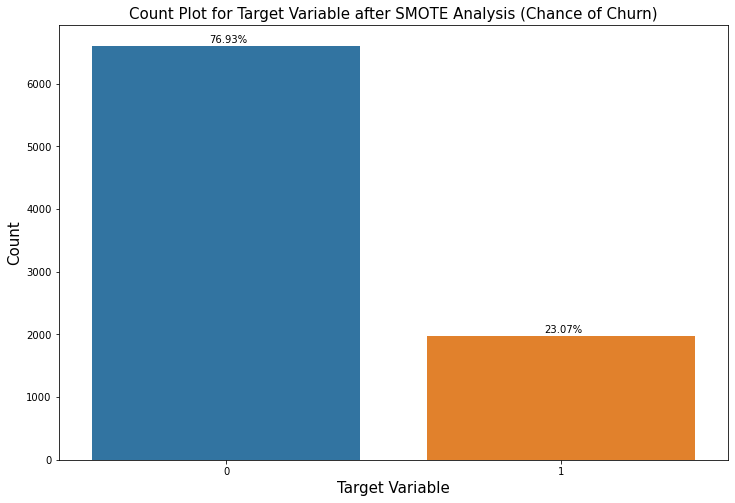

0    6608
1    1982
Name: churn, dtype: int64


In [196]:
plt.figure(figsize = [12,8])

sns.countplot(y5_train_os)
plt.text(x = -0.05, y = y5_train_os.value_counts()[0]+50, s = str(round((y5_train_os.value_counts()[0])*100/len(y5_train_os),2)) + '%')
plt.text(x = 0.95, y = y5_train_os.value_counts()[1]+50 , s = str(round((y5_train_os.value_counts()[1])*100/len(y5_train_os),2)) + '%')

plt.title('Count Plot for Target Variable after SMOTE Analysis (Chance of Churn)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()
print(y5_train_os.value_counts())

**Interpretation:**
<ul>Initially Target variable has imbalanced class distribution.</ul>
<ul>After the SMOTE Analysis Technique.</ul> <ul> Positive class (Churn=1) increased to 23.07% which seems to be balanced along with the  negative class (churn=0 ) 76.93%.</ul>


# Model Building

# 1. Dataset without Feature Engineering using VIF Technique

## Logistic Regression

## Logit Function

In [197]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg1 = sm.Logit(y1_train_os, X1_train_os).fit()

# print the summary of the model
print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.440832
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 9226
Model:                          Logit   Df Residuals:                     9215
Method:                           MLE   Df Model:                           10
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                  0.1839
Time:                        12:01:17   Log-Likelihood:                -4067.1
converged:                       True   LL-Null:                       -4983.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.2574      0.151     -1.707      0.

#### Pseudo R-squared value is 0.1911

#### LLR p-value is lesser than 0.05, which implies the model is significant

In [198]:
y1_pred_prob = logreg1.predict(X1_test)

y1_pred_prob.head()

9228    0.186740
6071    0.152438
5110    0.103693
874     0.034065
5084    0.484994
dtype: float64

In [199]:
y1_pred_l1 = [ 0 if x < 0.5 else 1 for x in y1_pred_prob]

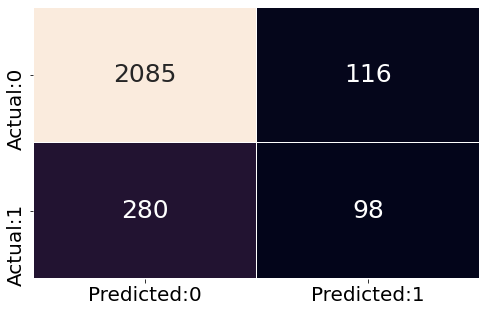

In [200]:
cm = confusion_matrix(y1_test,y1_pred_l1)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [201]:
# calculate various performance measures
acc_table1 = classification_report(y1_test,y1_pred_l1)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2201
           1       0.46      0.26      0.33       378

    accuracy                           0.85      2579
   macro avg       0.67      0.60      0.62      2579
weighted avg       0.82      0.85      0.83      2579



In [202]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

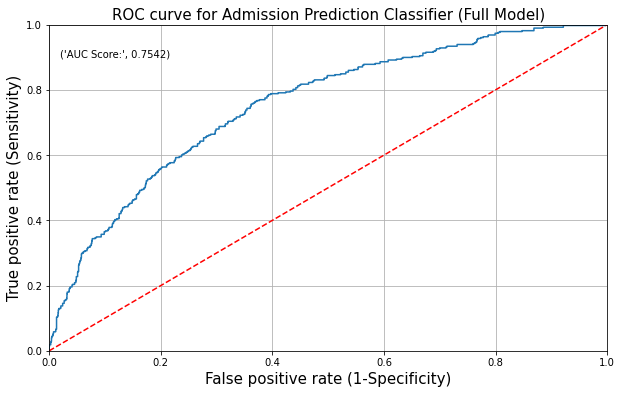

In [203]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
plt.figure(figsize=(10,6))
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y1_test, y1_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

In [204]:
print('AUC Score:', round(metrics.roc_auc_score(y1_test, y1_pred_prob),4))

AUC Score: 0.7542


### Creating scorecard

In [205]:
score_card = pd.DataFrame(columns=['Model Name','Accuracy', 'Precision', 'Recall', 'F1 Score'])

score_card


Empty DataFrame
Columns: [Model Name, Accuracy, Precision, Recall, F1 Score]
Index: []

### Updating scorecard

In [206]:
score_card = score_card.append({'Model Name': 'Logit-VIF',
                       'Accuracy':metrics.accuracy_score(y1_test, y1_pred_l1), 
                       'Precision': metrics.precision_score(y1_test,  y1_pred_l1), 
                       'Recall': metrics.recall_score(y1_test,  y1_pred_l1), 
                       'F1 Score': metrics.f1_score(y1_test,  y1_pred_l1),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0  Logit-VIF  0.846452   0.457944  0.259259  0.331081

## Using sklearn.linear_model import LogisticRegression

In [207]:
# removing intercept from train & test splits

X1_train_os = X1_train_os.iloc[:,1:]

X1_val = X1_val.iloc[:,1:]

X1_test = X1_test.iloc[:,1:]

In [208]:
logreg1_sk = LogisticRegression()  # sklearn add constant on its own
logreg1_sk.fit(X1_train_os, y1_train_os)

LogisticRegression()

### Do predictions on the train set

In [209]:
y1_train_pred= logreg1_sk.predict(X1_train_os)
y1_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

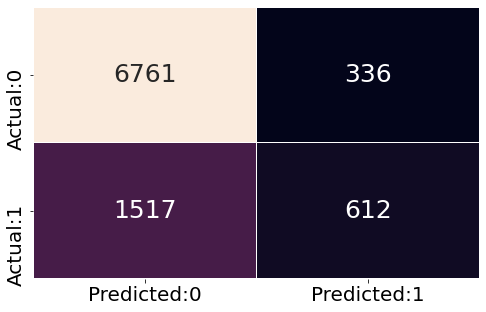

In [210]:
cm = confusion_matrix(y1_train_os, y1_train_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [211]:
# calculate various performance measures
acc_table1 = classification_report(y1_train_os, y1_train_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7097
           1       0.65      0.29      0.40      2129

    accuracy                           0.80      9226
   macro avg       0.73      0.62      0.64      9226
weighted avg       0.78      0.80      0.77      9226



### Do predictions on the Validation set.

In [212]:
y1_val_pred= logreg1_sk.predict(X1_val)
y1_val_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

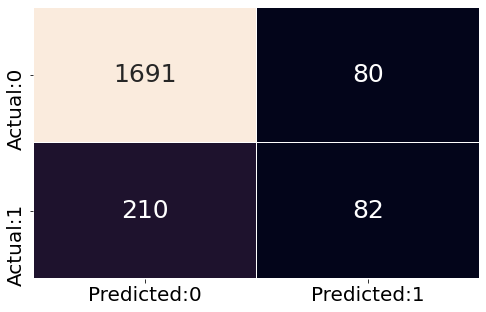

In [213]:
cm = confusion_matrix(y1_val, y1_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [214]:
# calculate various performance measures
acc_table1 = classification_report(y1_val, y1_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1771
           1       0.51      0.28      0.36       292

    accuracy                           0.86      2063
   macro avg       0.70      0.62      0.64      2063
weighted avg       0.84      0.86      0.84      2063



### Do predictions on the test set.

In [215]:
y1_test_pred_sk= logreg1_sk.predict(X1_test)
y1_test_pred_sk

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of test set.

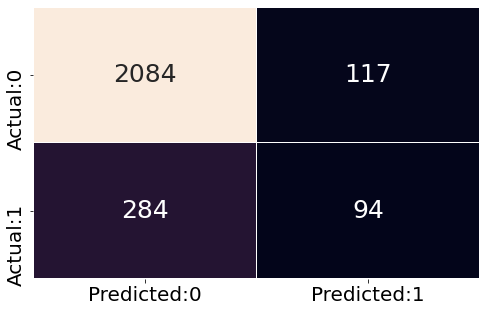

In [216]:
cm = confusion_matrix(y1_test, y1_test_pred_sk)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [217]:
# calculate various performance measures
acc_table1 = classification_report(y1_test, y1_test_pred_sk)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2201
           1       0.45      0.25      0.32       378

    accuracy                           0.84      2579
   macro avg       0.66      0.60      0.62      2579
weighted avg       0.82      0.84      0.83      2579



### Updating scorecard

In [218]:
score_card = score_card.append({'Model Name': 'LogReg_Sk_VIF',
                       'Accuracy':metrics.accuracy_score(y1_test, y1_test_pred_sk), 
                       'Precision': metrics.precision_score(y1_test,y1_test_pred_sk), 
                       'Recall': metrics.recall_score(y1_test,y1_test_pred_sk), 
                       'F1 Score': metrics.f1_score(y1_test, y1_test_pred_sk),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0      Logit-VIF  0.846452   0.457944  0.259259  0.331081
1  LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185

## Recursive Feature Elimination (RFE)

In [219]:
# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
rfe_model = RFE(estimator = logreg, n_features_to_select = None)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X1_train_os, y1_train_os)

# create a series containing feature and its corresponding rank obtained from RFE
feat_index = pd.Series(data = rfe_model.ranking_, index = X1_train_os.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['number_vmail_messages', 'total_day_minutes',
       'number_customer_service_calls', 'international_plan_yes',
       'voice_mail_plan_yes'],
      dtype='object')


In [220]:
# Storing the important feature in train & test variable 
X1_train_rf = X1_train_os[['number_vmail_messages', 'total_day_minutes',
                           'number_customer_service_calls', 'international_plan_yes','voice_mail_plan_yes']]
X1_test_rf = X1_test[['number_vmail_messages', 'total_day_minutes',
                      'number_customer_service_calls', 'international_plan_yes','voice_mail_plan_yes']]
X1_val_rf = X1_val[['number_vmail_messages', 'total_day_minutes',
                    'number_customer_service_calls', 'international_plan_yes','voice_mail_plan_yes']]

In [221]:
logreg1_rfe = LogisticRegression()  # sklearn add constant onits own
logreg1_rfe.fit(X1_train_rf,y1_train_os)

LogisticRegression()

### Do predictions on the Validation set.

In [222]:
y1_val_pred= logreg1_rfe.predict(X1_val_rf)
y1_val_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

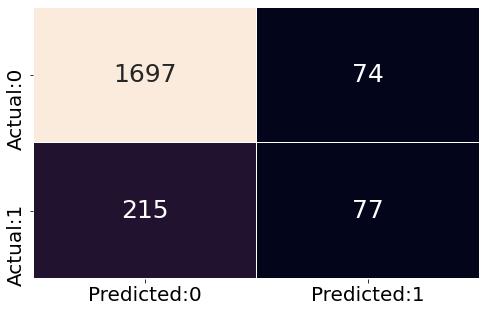

In [223]:
cm = confusion_matrix(y1_val, y1_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [224]:
# calculate various performance measures
acc_table1 = classification_report(y1_val, y1_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1771
           1       0.51      0.26      0.35       292

    accuracy                           0.86      2063
   macro avg       0.70      0.61      0.63      2063
weighted avg       0.83      0.86      0.84      2063



### Do predictions on the test set.

In [225]:
y1_test_pred_rf= logreg1_rfe.predict(X1_test_rf)
y1_test_pred_rf

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Plot the confusion matrix of test set.

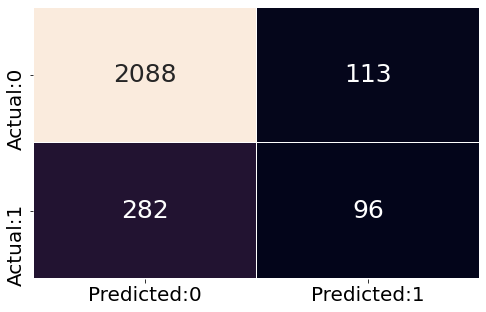

In [226]:
cm = confusion_matrix(y1_test, y1_test_pred_rf)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [227]:
# calculate various performance measures
acc_table = classification_report(y1_test, y1_test_pred_rf)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2201
           1       0.46      0.25      0.33       378

    accuracy                           0.85      2579
   macro avg       0.67      0.60      0.62      2579
weighted avg       0.82      0.85      0.83      2579



### Updating scorecard

In [228]:
score_card = score_card.append({'Model Name': 'LogReg_sk_rfe_VIF',
                       'Accuracy':metrics.accuracy_score(y1_test, y1_test_pred_rf), 
                       'Precision': metrics.precision_score(y1_test,  y1_test_pred_rf), 
                       'Recall': metrics.recall_score(y1_test,  y1_test_pred_rf), 
                       'F1 Score': metrics.f1_score(y1_test,  y1_test_pred_rf),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0          Logit-VIF  0.846452   0.457944  0.259259  0.331081
1      LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2  LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087

## Using Decision Tree

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

#### Create a generalized function to calculate the metrics for the train and the test set.

In [229]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X1_train_os)

    # return the performace measures on train set
    return(classification_report(y1_train_os, train_pred))

In [230]:
# create a generalized function to calculate the metrics values for validation set
def get_val_report(model):
    
    # for validation set:
    # val_pred: prediction made by the model on the validation dataset 'X_val'
    # y_val: actual values of the target variable for the validation dataset

    # predict the output of the target variable from the validation data 
    val_pred = model.predict(X1_val)

    # return the performace measures on validation set
    return(classification_report(y1_val, val_pred))

In [231]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X1_test)

    # return the performace measures on test set
    return(classification_report(y1_test, test_pred))

#### Build a full decision tree model on a train dataset using 'entropy'.

In [232]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification1.fit(X1_train_os, y1_train_os)

### Over-fitting in Decision Tree

The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.

**Calculate performance measures on the train set.**

In [233]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      1.00      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate performance measures on the Validation set.**

In [234]:
# compute the performance measures on Validation data
# call the function 'get_val_report'
# pass the decision tree to the function
val_report = get_val_report(decision_tree)

# print the performance measures
print(val_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1771
           1       0.83      0.92      0.87       292

    accuracy                           0.96      2063
   macro avg       0.91      0.94      0.92      2063
weighted avg       0.96      0.96      0.96      2063



**Calculate performance measures on the test set.**

In [235]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2201
           1       0.83      0.92      0.88       378

    accuracy                           0.96      2579
   macro avg       0.91      0.95      0.93      2579
weighted avg       0.96      0.96      0.96      2579



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

#### Build a decision tree using 'criterion = gini', 'max_depth = 5', 'min_samples_split = 4', 'max_leaf_nodes = 6'.

In [236]:
# pass the criteria 'gini' to the parameter, 'criterion' 
# max_depth: that assigns maximum depth of the tree
# min_samples_split: assigns minimum number of samples to split an internal node
# max_leaf_nodes': assigns maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree_pruning1 = dt_model.fit(X1_train_os, y1_train_os)

# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree_pruning1)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on Validation data
# call the function 'get_val_report'
# pass the decision tree to the function
val_report = get_val_report(decision_tree_pruning1)

# print the performance measures
print('Validation data:\n', val_report)

# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree_pruning1)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      7097
           1       0.76      0.63      0.69      2129

    accuracy                           0.87      9226
   macro avg       0.83      0.78      0.80      9226
weighted avg       0.86      0.87      0.86      9226

Validation data:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1771
           1       0.61      0.64      0.62       292

    accuracy                           0.89      2063
   macro avg       0.77      0.78      0.78      2063
weighted avg       0.89      0.89      0.89      2063

Test data:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2201
           1       0.61      0.61      0.61       378

    accuracy                           0.89      2579
   macro avg       0.77      0.77      0.77      2579
weighted avg       0.89      0.

**Interpretation:** From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

### Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [237]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X1_train_os, y1_train_os)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [238]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model1_gcv = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model1_gcv = dt_model1_gcv.fit(X1_train_os, y1_train_os)

**Calculate performance measures on the train set.**

In [239]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(dt_model1_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7097
           1       0.72      0.57      0.64      2129

    accuracy                           0.85      9226
   macro avg       0.80      0.75      0.77      9226
weighted avg       0.84      0.85      0.84      9226



**Calculate performance measures on the Validation set.**

In [240]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(dt_model1_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1771
           1       0.58      0.61      0.59       292

    accuracy                           0.88      2063
   macro avg       0.76      0.77      0.76      2063
weighted avg       0.88      0.88      0.88      2063



**Calculate performance measures on the test set.**

In [241]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(dt_model1_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2201
           1       0.58      0.51      0.54       378

    accuracy                           0.87      2579
   macro avg       0.75      0.72      0.73      2579
weighted avg       0.87      0.87      0.87      2579



### Updating scorecard

In [242]:
y1_test_pred_dt1= dt_model1_gcv.predict(X1_test)
y1_test_pred_dt1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [243]:
score_card = score_card.append({'Model Name': 'DecisionTree_HYP_VIF',
                       'Accuracy':metrics.accuracy_score(y1_test, y1_test_pred_dt1), 
                       'Precision': metrics.precision_score(y1_test,y1_test_pred_dt1), 
                       'Recall': metrics.recall_score(y1_test,y1_test_pred_dt1), 
                       'F1 Score': metrics.f1_score(y1_test,y1_test_pred_dt1),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0             Logit-VIF  0.846452   0.457944  0.259259  0.331081
1         LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2     LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3  DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135

# Ensembling Techniques 


## Random Forest for Classification

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes. 

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree. 

In [244]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification1 = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model1 = rf_classification1.fit(X1_train_os, y1_train_os)

**Calculate performance measures on the train set.**

In [245]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model1))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      0.99      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate performance measures on the Validation set.**

In [246]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model1))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1771
           1       0.94      0.88      0.91       292

    accuracy                           0.97      2063
   macro avg       0.96      0.93      0.95      2063
weighted avg       0.97      0.97      0.97      2063



**Calculate performance measures on the test set.**

In [247]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_model1))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2201
           1       0.93      0.89      0.91       378

    accuracy                           0.97      2579
   macro avg       0.96      0.94      0.95      2579
weighted avg       0.97      0.97      0.97      2579



In [248]:
# Selecting best hyper parameters using gridsearch cv

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X1_train_os, y1_train_os)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 70} 



In [249]:
# Random forest model with best hyper paramters

rf_model1_gcv = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model1_gcv = rf_model1_gcv.fit(X1_train_os, y1_train_os)

**Calculate performance measures on the train set.**

In [250]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model1_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      7097
           1       0.85      0.62      0.72      2129

    accuracy                           0.89      9226
   macro avg       0.87      0.79      0.82      9226
weighted avg       0.88      0.89      0.88      9226



**Calculate performance measures on the Validation set.**

In [251]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model1_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1771
           1       0.74      0.59      0.66       292

    accuracy                           0.91      2063
   macro avg       0.84      0.78      0.80      2063
weighted avg       0.91      0.91      0.91      2063



**Calculate performance measures on the test set.**

In [252]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_model1_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2201
           1       0.73      0.56      0.63       378

    accuracy                           0.90      2579
   macro avg       0.83      0.76      0.79      2579
weighted avg       0.90      0.90      0.90      2579



### Updating scorecard

In [253]:
y1_test_pred_rf1= rf_model1_gcv.predict(X1_test)
y1_test_pred_rf1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [254]:
score_card = score_card.append({'Model Name': 'RandomForest_HYP_VIF',
                       'Accuracy':metrics.accuracy_score(y1_test, y1_test_pred_rf1), 
                       'Precision': metrics.precision_score(y1_test,y1_test_pred_rf1), 
                       'Recall': metrics.recall_score(y1_test,y1_test_pred_rf1), 
                       'F1 Score': metrics.f1_score(y1_test,y1_test_pred_rf1),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0             Logit-VIF  0.846452   0.457944  0.259259  0.331081
1         LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2     LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3  DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4  RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836

# Boosting

The boosting method fits multiple weak classifiers to create a strong classifier. In this method, the model tries to correct the errors in the previous model.

## XGBoost 

XGBoost (extreme gradient boost) is an alternative form of gradient boosting method. This method generally considers the initial prediction as 0.5 and build the decision tree to predict the residuals. It considers the regularization parameter to avoid overfitting.

In [255]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model1 = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model1.fit(X1_train_os, y1_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate performance measures on the train set.**

In [256]:
print('Classification Report for train set: \n', get_train_report(xgb_model1))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7097
           1       1.00      0.97      0.98      2129

    accuracy                           0.99      9226
   macro avg       1.00      0.99      0.99      9226
weighted avg       0.99      0.99      0.99      9226



**Calculate performance measures on the validation set.**

In [257]:
print('Classification Report for Validation set: \n', get_val_report(xgb_model1))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1771
           1       0.93      0.83      0.87       292

    accuracy                           0.97      2063
   macro avg       0.95      0.91      0.93      2063
weighted avg       0.97      0.97      0.97      2063



**Calculate performance measures on the test set.**

In [258]:
print('Classification Report for test set: \n', get_test_report(xgb_model1))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2201
           1       0.93      0.84      0.88       378

    accuracy                           0.97      2579
   macro avg       0.95      0.92      0.93      2579
weighted avg       0.97      0.97      0.97      2579



### Tune the Hyperparameters (GridSearchCV)

In [259]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X1_train_os, y1_train_os)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.6, 'max_depth': 9} 



In [260]:
# instantiate the 'XGBClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
xgb_grid_model1 = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_grid_model1 = xgb_grid_model1.fit(X1_train_os, y1_train_os)

**Calculate performance measures on the train set.**

In [261]:
print('Classification Report for train set: \n', get_train_report(xgb_grid_model1))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      1.00      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate performance measures on the validation set.**

In [262]:
print('Classification Report for validation set: \n', get_val_report(xgb_grid_model1))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1771
           1       0.93      0.89      0.91       292

    accuracy                           0.98      2063
   macro avg       0.96      0.94      0.95      2063
weighted avg       0.98      0.98      0.98      2063



**Calculate performance measures on the test set.**

In [263]:
print('Classification Report for validation set: \n', get_test_report(xgb_grid_model1))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2201
           1       0.94      0.91      0.93       378

    accuracy                           0.98      2579
   macro avg       0.96      0.95      0.96      2579
weighted avg       0.98      0.98      0.98      2579



### Updating scorecard

In [264]:
y1_test_pred_xg1= xgb_grid_model1.predict(X1_test)
y1_test_pred_xg1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [265]:
score_card = score_card.append({'Model Name': 'XGBoost_HYP_VIF',
                       'Accuracy':metrics.accuracy_score(y1_test, y1_test_pred_xg1), 
                       'Precision': metrics.precision_score(y1_test,y1_test_pred_xg1), 
                       'Recall': metrics.recall_score(y1_test,y1_test_pred_xg1), 
                       'F1 Score': metrics.f1_score(y1_test,y1_test_pred_xg1),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0             Logit-VIF  0.846452   0.457944  0.259259  0.331081
1         LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2     LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3  DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4  RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5       XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174

## 2. Dataset without Feature Engineering using Heatmap, dropped highly positive correlated          columns.

## Using Logistic Regression

#### Logit Function

In [266]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg2 = sm.Logit(y2_train_os, X2_train_os).fit()

# print the summary of the model
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.425389
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 9226
Model:                          Logit   Df Residuals:                     9209
Method:                           MLE   Df Model:                           16
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                  0.2125
Time:                        12:58:06   Log-Likelihood:                -3924.6
converged:                       True   LL-Null:                       -4983.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.0067      0.150     -0.044      0.

#### Pseudo R-squared value is 0.2194

#### LLR p-value is lesser than 0.05, which implies the model is significant

In [267]:
y2_pred_prob = logreg2.predict(X2_test)

y2_pred_prob.head()

9228    0.156046
6071    0.113102
5110    0.127737
874     0.021616
5084    0.610231
dtype: float64

In [268]:
y2_pred_l2 = [ 0 if x < 0.5 else 1 for x in y2_pred_prob]

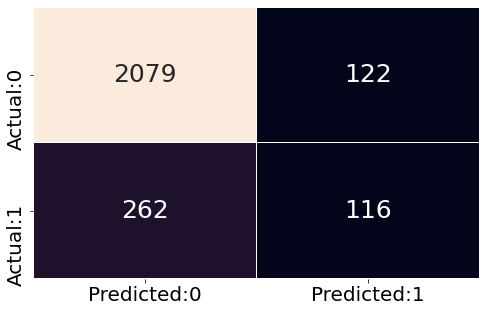

In [269]:
cm = confusion_matrix(y2_test,y2_pred_l2)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                           index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [270]:
# calculate various performance measures
acc_table1 = classification_report(y2_test,y2_pred_l2)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2201
           1       0.49      0.31      0.38       378

    accuracy                           0.85      2579
   macro avg       0.69      0.63      0.65      2579
weighted avg       0.83      0.85      0.84      2579



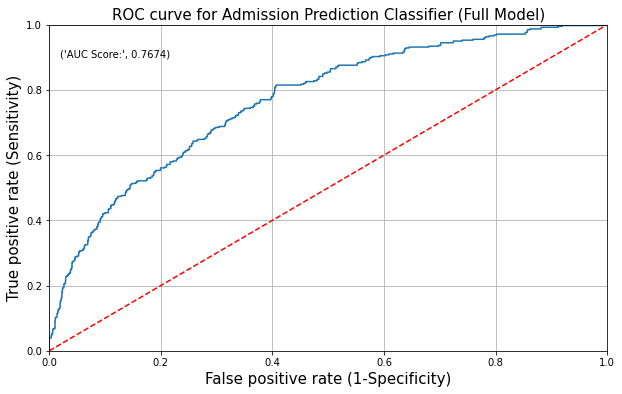

In [271]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
plt.figure(figsize=(10,6))
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y2_test, y2_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

In [272]:
print('AUC Score:', round(metrics.roc_auc_score(y2_test, y2_pred_prob),4))

AUC Score: 0.7674


### Updating scorecard

In [273]:
score_card = score_card.append({'Model Name': 'Logit_Col_drop',
                       'Accuracy':metrics.accuracy_score(y2_test, y2_pred_l2), 
                       'Precision': metrics.precision_score(y2_test, y2_pred_l2), 
                       'Recall': metrics.recall_score(y2_test, y2_pred_l2), 
                       'F1 Score': metrics.f1_score(y2_test, y2_pred_l2),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0             Logit-VIF  0.846452   0.457944  0.259259  0.331081
1         LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2     LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3  DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4  RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5       XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6        Logit_Col_drop  0.851105   0.487395  0.306878  0.376623

## Using sklearn.linear_model import LogisticRegression

In [274]:

# removing intercept from train & test splits

X2_train_os = X2_train_os.iloc[:,1:]

X2_val = X2_val.iloc[:,1:]

X2_test = X2_test.iloc[:,1:]

In [275]:
logreg2_sk = LogisticRegression()  # sklearn add constant on its own
logreg2_sk.fit(X2_train_os, y2_train_os)

LogisticRegression()

### Do predictions on the train set.

In [276]:
y2_train_pred= logreg2_sk.predict(X2_train_os)
y2_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

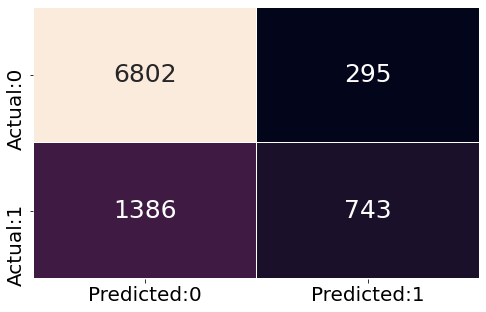

In [277]:
cm = confusion_matrix(y2_train_os, y2_train_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [278]:
# calculate various performance measures
acc_table1 = classification_report(y2_train_os, y2_train_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7097
           1       0.72      0.35      0.47      2129

    accuracy                           0.82      9226
   macro avg       0.77      0.65      0.68      9226
weighted avg       0.80      0.82      0.79      9226



### Do predictions on the Validation set.

In [279]:
y2_val_pred= logreg2_sk.predict(X2_val)
y2_val_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

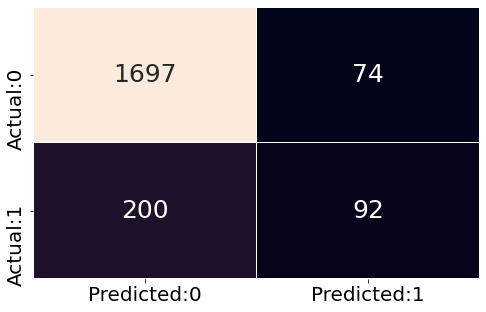

In [280]:
cm = confusion_matrix(y2_val, y2_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [281]:
# calculate various performance measures
acc_table1 = classification_report(y2_val, y2_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1771
           1       0.55      0.32      0.40       292

    accuracy                           0.87      2063
   macro avg       0.72      0.64      0.66      2063
weighted avg       0.85      0.87      0.85      2063



### Do predictions on the test set.

In [282]:
y2_test_pred_sk= logreg2_sk.predict(X2_test)
y2_test_pred_sk

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of test set.

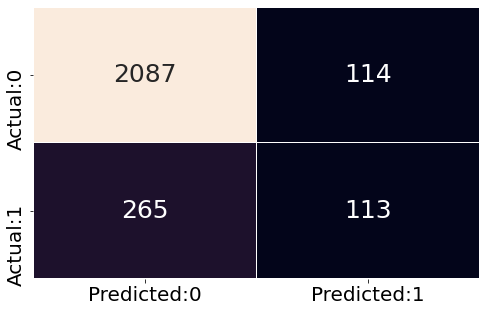

In [283]:
cm = confusion_matrix(y2_test, y2_test_pred_sk)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                           index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [284]:
# calculate various performance measures
acc_table1 = classification_report(y2_test, y2_test_pred_sk)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2201
           1       0.50      0.30      0.37       378

    accuracy                           0.85      2579
   macro avg       0.69      0.62      0.65      2579
weighted avg       0.83      0.85      0.84      2579



### Updating scorecard

In [285]:
score_card = score_card.append({'Model Name': 'LogReg_SK_Col_drop',
                       'Accuracy':metrics.accuracy_score(y2_test,y2_test_pred_sk), 
                       'Precision': metrics.precision_score(y2_test, y2_test_pred_sk), 
                       'Recall': metrics.recall_score(y2_test,y2_test_pred_sk), 
                       'F1 Score': metrics.f1_score(y2_test,y2_test_pred_sk),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0             Logit-VIF  0.846452   0.457944  0.259259  0.331081
1         LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2     LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3  DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4  RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5       XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6        Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7    LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554

## Using Recursive Feature Elimination (RFE)

In [286]:
logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = None)

rfe_model = rfe_model.fit(X2_train_os, y2_train_os)

feat_index = pd.Series(data = rfe_model.ranking_, index = X2_train_os.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
       'number_customer_service_calls', 'area_code_Area 2', 'area_code_Area 3',
       'international_plan_yes', 'voice_mail_plan_yes'],
      dtype='object')


In [287]:
# Storing the important feature in train & test variable 
X2_train_rf = X2_train_os[['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
                           'number_customer_service_calls', 'area_code_Area 2', 'area_code_Area 3',
                           'international_plan_yes', 'voice_mail_plan_yes']]
X2_test_rf = X2_test[['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
                       'number_customer_service_calls', 'area_code_Area 2', 'area_code_Area 3',
                       'international_plan_yes', 'voice_mail_plan_yes']]
X2_val_rf = X2_val[['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
                       'number_customer_service_calls', 'area_code_Area 2', 'area_code_Area 3',
                       'international_plan_yes', 'voice_mail_plan_yes']]

In [288]:
logreg2_rfe = LogisticRegression()  # sklearn add constant onits own
logreg2_rfe.fit(X2_train_rf,y2_train_os)

LogisticRegression()

### Do predictions on the Validation set.

In [289]:
y2_val_pred= logreg2_rfe.predict(X2_val_rf)
y2_val_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

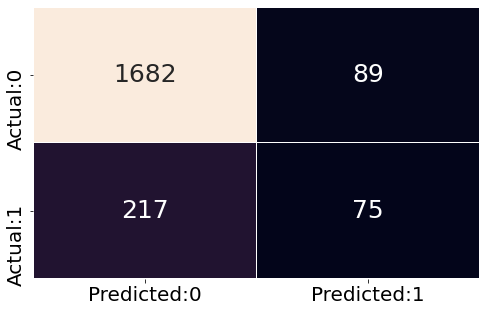

In [290]:
cm = confusion_matrix(y2_val, y2_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                           index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [291]:
# calculate various performance measures
acc_table1 = classification_report(y2_val, y2_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1771
           1       0.46      0.26      0.33       292

    accuracy                           0.85      2063
   macro avg       0.67      0.60      0.62      2063
weighted avg       0.83      0.85      0.83      2063



### Do predictions on the test set.

In [292]:
y2_test_pred_rf= logreg2_rfe.predict(X2_test_rf)
y2_test_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of test set.

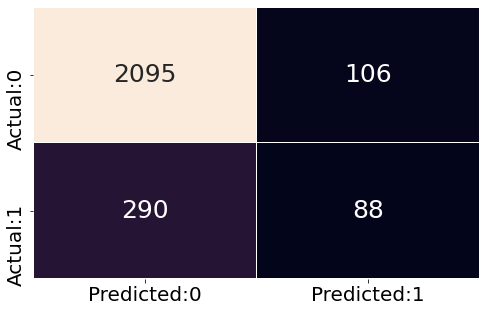

In [293]:
cm = confusion_matrix(y2_test, y2_test_pred_rf)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                           index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [294]:
# calculate various performance measures
acc_table = classification_report(y2_test, y2_test_pred_rf)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2201
           1       0.45      0.23      0.31       378

    accuracy                           0.85      2579
   macro avg       0.67      0.59      0.61      2579
weighted avg       0.82      0.85      0.82      2579



### Updating scorecard

In [295]:
score_card = score_card.append({'Model Name': 'LogReg_SK_rfe_Col_drop',
                       'Accuracy':metrics.accuracy_score(y2_test, y2_test_pred_rf), 
                       'Precision': metrics.precision_score(y2_test, y2_test_pred_rf), 
                       'Recall': metrics.recall_score(y2_test, y2_test_pred_rf), 
                       'F1 Score': metrics.f1_score(y2_test, y2_test_pred_rf),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0               Logit-VIF  0.846452   0.457944  0.259259  0.331081
1           LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2       LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3    DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4    RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5         XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6          Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7      LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8  LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692

## Using Decision Tree

#### Create a generalized function to calculate the metrics for the train and the test set.

In [296]:
def get_train_report(model):

    train_pred = model.predict(X2_train_os)

    return(classification_report(y2_train_os, train_pred))

In [297]:
def get_val_report(model):

    val_pred = model.predict(X2_val)

    return(classification_report(y2_val, val_pred))

In [298]:
def get_test_report(model):

    test_pred = model.predict(X2_test)

    return(classification_report(y2_test, test_pred))

#### Build a full decision tree model on a train dataset using 'entropy'.

In [299]:
decision_tree_classification2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree2 = decision_tree_classification2.fit(X2_train_os, y2_train_os)

### Over-fitting in Decision Tree



**Calculate performance measures on the train set.**

In [300]:
train_report = get_train_report(decision_tree2)

print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      1.00      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate performance measures on the Validation set.**

In [301]:
val_report = get_val_report(decision_tree2)

print(val_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1771
           1       0.92      0.95      0.93       292

    accuracy                           0.98      2063
   macro avg       0.96      0.97      0.96      2063
weighted avg       0.98      0.98      0.98      2063



**Calculate performance measures on the test set.**

In [302]:
test_report = get_test_report(decision_tree2)

print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2201
           1       0.92      0.96      0.94       378

    accuracy                           0.98      2579
   macro avg       0.96      0.97      0.96      2579
weighted avg       0.98      0.98      0.98      2579



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

#### Build a decision tree using 'criterion = gini', 'max_depth = 5', 'min_samples_split = 4', 'max_leaf_nodes = 6'.

In [303]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

decision_tree = dt_model.fit(X2_train_os, y2_train_os)

train_report = get_train_report(decision_tree)
print('Train data:\n', train_report)

val_report = get_val_report(decision_tree)
print('Validation data:\n', val_report)

test_report = get_test_report(decision_tree)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      7097
           1       0.76      0.62      0.68      2129

    accuracy                           0.87      9226
   macro avg       0.83      0.78      0.80      9226
weighted avg       0.86      0.87      0.86      9226

Validation data:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1771
           1       0.61      0.64      0.62       292

    accuracy                           0.89      2063
   macro avg       0.77      0.78      0.78      2063
weighted avg       0.89      0.89      0.89      2063

Test data:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2201
           1       0.61      0.61      0.61       378

    accuracy                           0.89      2579
   macro avg       0.77      0.77      0.77      2579
weighted avg       0.89      0.

**Interpretation:** From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

### Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [304]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X2_train_os, y2_train_os)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [305]:
dt_model2_gcv = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model2_gcv = dt_model2_gcv.fit(X2_train_os, y2_train_os)

**Calculate performance measures on the train set.**

In [306]:
print('Classification Report for train set: \n', get_train_report(dt_model2_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7097
           1       0.76      0.51      0.61      2129

    accuracy                           0.85      9226
   macro avg       0.82      0.73      0.76      9226
weighted avg       0.84      0.85      0.84      9226



**Calculate performance measures on the Validation set.**

In [307]:
print('Classification Report for Validation set: \n', get_val_report(dt_model2_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1771
           1       0.62      0.53      0.57       292

    accuracy                           0.89      2063
   macro avg       0.77      0.74      0.75      2063
weighted avg       0.88      0.89      0.88      2063



**Calculate performance measures on the test set.**

In [308]:
print('Classification Report for test set: \n', 
      get_test_report(dt_model2_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2201
           1       0.62      0.44      0.51       378

    accuracy                           0.88      2579
   macro avg       0.76      0.70      0.72      2579
weighted avg       0.87      0.88      0.87      2579



### Updating scorecard

In [309]:
y2_test_pred_dt= dt_model2_gcv.predict(X2_test)
y2_test_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [310]:
score_card = score_card.append({'Model Name': 'DecisionTree_HYP_Col_drop',
                       'Accuracy':metrics.accuracy_score(y2_test, y2_test_pred_dt), 
                       'Precision': metrics.precision_score(y2_test, y2_test_pred_dt), 
                       'Recall': metrics.recall_score(y2_test,y2_test_pred_dt), 
                       'F1 Score': metrics.f1_score(y2_test, y2_test_pred_dt),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                  Logit-VIF  0.846452   0.457944  0.259259  0.331081
1              LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2          LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3       DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4       RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5            XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6             Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7         LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8     LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9  DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932

# Ensembling Techniques 


## Random Forest for Classification

In [311]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification2 = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model2 = rf_classification2.fit(X2_train_os, y2_train_os)

**Calculate performance measures on the train set.**

In [312]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model2))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      0.99      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate performance measures on the Validation set.**

In [313]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model2))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1771
           1       0.98      0.94      0.96       292

    accuracy                           0.99      2063
   macro avg       0.98      0.97      0.98      2063
weighted avg       0.99      0.99      0.99      2063



**Calculate performance measures on the test set.**

In [314]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n',
      get_test_report(rf_model2))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2201
           1       0.97      0.94      0.96       378

    accuracy                           0.99      2579
   macro avg       0.98      0.97      0.97      2579
weighted avg       0.99      0.99      0.99      2579



In [315]:
# Selecting best hyper parameters using gridsearch cv

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X2_train_os, y2_train_os)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 70} 



In [316]:
# Random forest model with best hyper paramters

rf_model2_gcv = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model2_gcv = rf_model2_gcv.fit(X2_train_os, y2_train_os)

**Calculate performance measures on the train set.**

In [317]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model2_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7097
           1       0.97      0.57      0.72      2129

    accuracy                           0.90      9226
   macro avg       0.93      0.78      0.83      9226
weighted avg       0.91      0.90      0.89      9226



**Calculate performance measures on the Validation set.**

In [318]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model2_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1771
           1       0.92      0.58      0.71       292

    accuracy                           0.93      2063
   macro avg       0.93      0.78      0.84      2063
weighted avg       0.93      0.93      0.93      2063



**Calculate performance measures on the test set.**

In [319]:
# print the performance measures for test set for the 
# model with best parameters

print('Classification Report for test set: \n',
      get_test_report(rf_model2_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      2201
           1       0.93      0.50      0.65       378

    accuracy                           0.92      2579
   macro avg       0.92      0.75      0.80      2579
weighted avg       0.92      0.92      0.91      2579



### Updating scorecard

In [320]:
y2_test_pred_rf= rf_model2_gcv.predict(X2_test)
y2_test_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [321]:
score_card = score_card.append({'Model Name': 'RandomForest_HYP_Col_drop',
                       'Accuracy':metrics.accuracy_score(y2_test, y2_test_pred_rf), 
                       'Precision': metrics.precision_score(y2_test, y2_test_pred_rf), 
                       'Recall': metrics.recall_score(y2_test,y2_test_pred_rf), 
                       'F1 Score': metrics.f1_score(y2_test, y2_test_pred_rf),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                   Logit-VIF  0.846452   0.457944  0.259259  0.331081
1               LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2           LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3        DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4        RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5             XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6              Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7          LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8      LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9   DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10  RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801

## Boosting
### XGBoost

In [322]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model2 = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model2.fit(X2_train_os, y2_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate Performance Measure on train set**

In [323]:
print('Classification Report for train set: \n', get_train_report(xgb_model2))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      1.00      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate Performance Measure on validation set**

In [324]:
print('Classification Report for validation set: \n', get_val_report(xgb_model2))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1771
           1       0.99      0.95      0.97       292

    accuracy                           0.99      2063
   macro avg       0.99      0.97      0.98      2063
weighted avg       0.99      0.99      0.99      2063



**Calculate Performance Measure on test set**

In [325]:
print('Classification Report for test set: \n', get_test_report(xgb_model2))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2201
           1       0.99      0.94      0.97       378

    accuracy                           0.99      2579
   macro avg       0.99      0.97      0.98      2579
weighted avg       0.99      0.99      0.99      2579



## Tune the Hyperparameters (GridSearchCV)

In [326]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X2_train_os, y2_train_os)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.4, 'max_depth': 9} 



In [327]:
xgb_grid_model2 = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
xgb_grid_model2.fit(X2_train_os, y2_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate performance measures on the train set**

In [328]:
print('Classification Report for train set: \n', get_train_report(xgb_grid_model2))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      1.00      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate performance measures on the validation set.**

In [329]:
print('Classification Report for validation set: \n', get_val_report(xgb_grid_model2))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1771
           1       0.99      0.94      0.96       292

    accuracy                           0.99      2063
   macro avg       0.99      0.97      0.98      2063
weighted avg       0.99      0.99      0.99      2063



**Calculate performance measures on the test set.**

In [330]:
print('Classification Report for test set: \n', 
      get_test_report(xgb_grid_model2))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2201
           1       1.00      0.95      0.97       378

    accuracy                           0.99      2579
   macro avg       0.99      0.97      0.98      2579
weighted avg       0.99      0.99      0.99      2579



### Updating scorecard

In [331]:
y2_test_pred_xg= xgb_grid_model2.predict(X2_test)
y2_test_pred_xg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [332]:
score_card = score_card.append({'Model Name': 'XGBoost_HYP_Col_drop',
                       'Accuracy':metrics.accuracy_score(y2_test, y2_test_pred_xg), 
                       'Precision': metrics.precision_score(y2_test, y2_test_pred_xg), 
                       'Recall': metrics.recall_score(y2_test,y2_test_pred_xg), 
                       'F1 Score': metrics.f1_score(y2_test, y2_test_pred_xg),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                   Logit-VIF  0.846452   0.457944  0.259259  0.331081
1               LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2           LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3        DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4        RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5             XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6              Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7          LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8      LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9   DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10  RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801
11       XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090  0.971506

## 3. Dataset with Feature Engineering using VIF Technique

## Using Logistic Regression

#### Logit Function

In [333]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg3 = sm.Logit(y3_train_os, X3_train_os).fit()

# print the summary of the model
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.433375
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 9226
Model:                          Logit   Df Residuals:                     9214
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                  0.1977
Time:                        14:05:59   Log-Likelihood:                -3998.3
converged:                       True   LL-Null:                       -4983.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.3329      0.157     -2.116      0.

#### Pseudo R-squared value is 0.1958

#### LLR p-value is lesser than 0.05, which implies the model is significant

In [334]:
y3_pred_prob = logreg3.predict(X3_test)

y3_pred_prob.head()

9228    0.159464
6071    0.215324
5110    0.177591
874     0.023025
5084    0.477070
dtype: float64

In [335]:
y3_pred_l3 = [ 0 if x < 0.5 else 1 for x in y3_pred_prob]

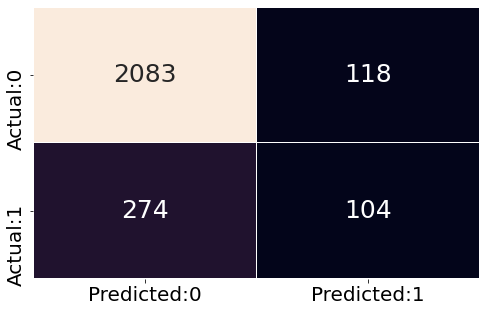

In [336]:
cm = confusion_matrix(y3_test,y3_pred_l3)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [337]:
# calculate various performance measures
acc_table1 = classification_report(y3_test,y3_pred_l3)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2201
           1       0.47      0.28      0.35       378

    accuracy                           0.85      2579
   macro avg       0.68      0.61      0.63      2579
weighted avg       0.82      0.85      0.83      2579



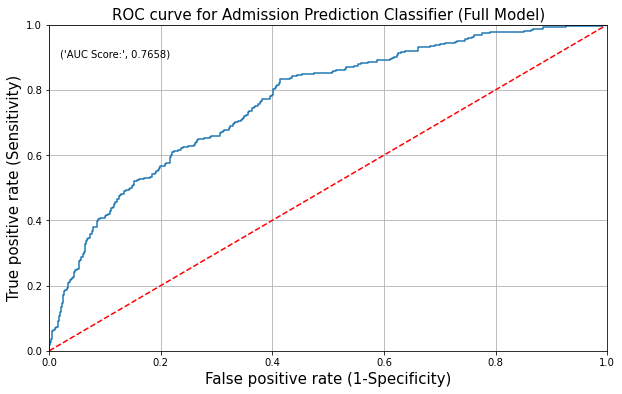

In [338]:
plt.figure(figsize=(10,6))
fpr, tpr, thresholds = roc_curve(y3_test, y3_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y3_test, y3_pred_prob),4)))
                               
plt.grid(True)

In [339]:
print('AUC Score:', round(metrics.roc_auc_score(y3_test, y3_pred_prob),4))

AUC Score: 0.7658


### Updating scorecard

In [340]:
score_card = score_card.append({'Model Name': 'Logit_FeaEng_Col_drop',
                       'Accuracy':metrics.accuracy_score(y3_test, y3_pred_l3), 
                       'Precision': metrics.precision_score(y3_test, y3_pred_l3), 
                       'Recall': metrics.recall_score(y3_test, y3_pred_l3), 
                       'F1 Score': metrics.f1_score(y3_test, y3_pred_l3),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                   Logit-VIF  0.846452   0.457944  0.259259  0.331081
1               LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2           LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3        DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4        RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5             XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6              Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7          LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8      LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9   DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10  RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801
11       XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090  0.971506
12      Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132  0.346667

## Using sklearn.linear_model import LogisticRegression

In [341]:
# removing intercept from train & test splits

X3_train_os = X3_train_os.iloc[:,1:]

X3_val = X3_val.iloc[:,1:]

X3_test = X3_test.iloc[:,1:]

In [342]:
logreg3_sk = LogisticRegression()  # sklearn add constant on its own
logreg3_sk.fit(X3_train_os, y3_train_os)

LogisticRegression()

### Do predictions on the Train set.

In [343]:
y3_train_pred= logreg3_sk.predict(X3_train_os)
y3_train_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

#### Plot the confusion matrix of Validation set.

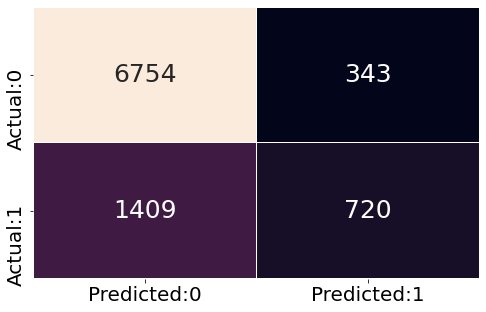

In [344]:
cm = confusion_matrix(y3_train_os, y3_train_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [345]:
# calculate various performance measures
acc_table1 = classification_report(y3_train_os, y3_train_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7097
           1       0.68      0.34      0.45      2129

    accuracy                           0.81      9226
   macro avg       0.75      0.64      0.67      9226
weighted avg       0.79      0.81      0.79      9226



### Do predictions on the Validation set.

In [346]:
y3_val_pred= logreg3_sk.predict(X3_val)
y3_val_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

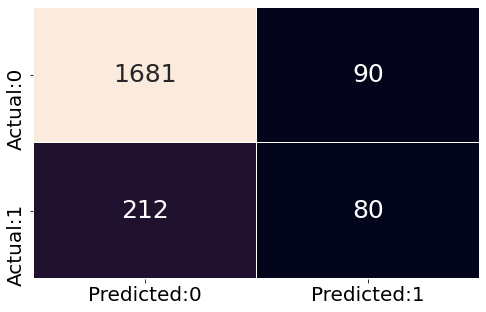

In [347]:
cm = confusion_matrix(y3_val, y3_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [348]:
# calculate various performance measures
acc_table1 = classification_report(y3_val, y3_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1771
           1       0.47      0.27      0.35       292

    accuracy                           0.85      2063
   macro avg       0.68      0.61      0.63      2063
weighted avg       0.83      0.85      0.84      2063



### Do predictions on the test set.

In [349]:
y3_test_pred_sk= logreg3_sk.predict(X3_test)
y3_test_pred_sk

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of test set.

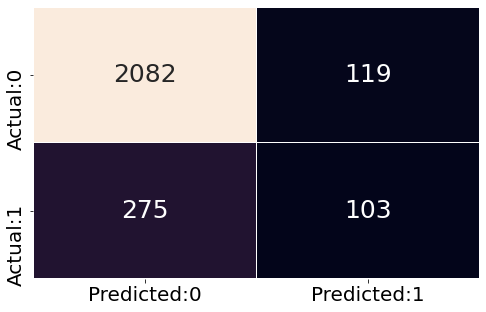

In [350]:
cm = confusion_matrix(y3_test, y3_test_pred_sk)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [351]:
# calculate various performance measures
acc_table1 = classification_report(y3_test, y3_test_pred_sk)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2201
           1       0.46      0.27      0.34       378

    accuracy                           0.85      2579
   macro avg       0.67      0.61      0.63      2579
weighted avg       0.82      0.85      0.83      2579



### Updating scorecard

In [352]:
score_card = score_card.append({'Model Name': 'LogReg_SK_FeaEng_Col_drop',
                       'Accuracy':metrics.accuracy_score(y3_test, y3_test_pred_sk), 
                       'Precision': metrics.precision_score(y3_test,y3_test_pred_sk), 
                       'Recall': metrics.recall_score(y3_test, y3_test_pred_sk), 
                       'F1 Score': metrics.f1_score(y3_test, y3_test_pred_sk),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                   Logit-VIF  0.846452   0.457944  0.259259  0.331081
1               LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2           LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3        DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4        RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5             XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6              Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7          LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8      LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9   DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10  RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801
11       XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090  0.971506
12      Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132  0.346667
13  LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487  0.343333

## Using Recursive Feature Elimination (RFE)

In [353]:
logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select =None)

rfe_model = rfe_model.fit(X3_train_os, y3_train_os)

feat_index = pd.Series(data = rfe_model.ranking_, index = X3_train_os.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['number_vmail_messages', 'number_customer_service_calls',
       'Total_Charge', 'international_plan_yes', 'voice_mail_plan_yes'],
      dtype='object')


In [354]:
# Storing the important feature in train, validation & test variable 
X3_train_rf = X3_train_os[['number_vmail_messages', 'Total_Charge', 'international_plan_yes',
                           'voice_mail_plan_yes']]
X3_test_rf = X3_test[['number_vmail_messages', 'Total_Charge', 'international_plan_yes',
                       'voice_mail_plan_yes']]
X3_val_rf = X3_val[['number_vmail_messages', 'Total_Charge', 'international_plan_yes',
                    'voice_mail_plan_yes']]

In [355]:
logreg3_rfe = LogisticRegression()  # sklearn add constant onits own
logreg3_rfe.fit(X3_train_rf,y3_train_os)

LogisticRegression()

### Do predictions on the Validation set.

In [356]:
y3_val_pred= logreg3_rfe.predict(X3_val_rf)
y3_val_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

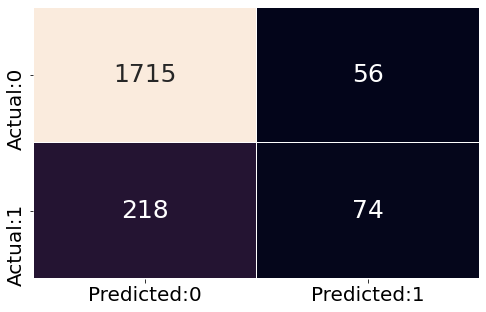

In [357]:
cm = confusion_matrix(y3_val, y3_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [358]:
# calculate various performance measures
acc_table1 = classification_report(y3_val, y3_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1771
           1       0.57      0.25      0.35       292

    accuracy                           0.87      2063
   macro avg       0.73      0.61      0.64      2063
weighted avg       0.84      0.87      0.84      2063



### Do predictions on the test set.

In [359]:
y3_test_pred_rf= logreg3_rfe.predict(X3_test_rf)
y3_test_pred_rf

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Plot the confusion matrix of test set.

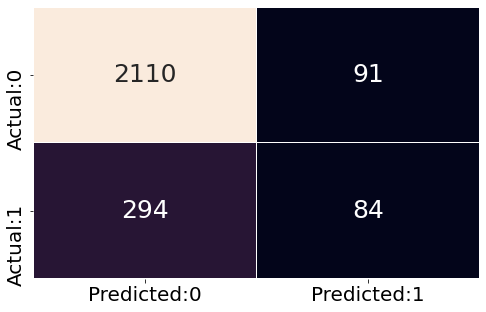

In [360]:
cm = confusion_matrix(y3_test, y3_test_pred_rf)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [361]:
# calculate various performance measures
acc_table = classification_report(y3_test, y3_test_pred_rf)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2201
           1       0.48      0.22      0.30       378

    accuracy                           0.85      2579
   macro avg       0.68      0.59      0.61      2579
weighted avg       0.82      0.85      0.83      2579



### Updating scorecard

In [362]:
score_card = score_card.append({'Model Name': 'LogReg_SK_rfe_FeaEng_Col_drop',
                       'Accuracy':metrics.accuracy_score(y3_test, y3_test_pred_rf), 
                       'Precision': metrics.precision_score(y3_test,y3_test_pred_rf), 
                       'Recall': metrics.recall_score(y3_test, y3_test_pred_rf), 
                       'F1 Score': metrics.f1_score(y3_test, y3_test_pred_rf),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                       Logit-VIF  0.846452   0.457944  0.259259  0.331081
1                   LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2               LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3            DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4            RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5                 XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6                  Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7              LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8          LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9       DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10      RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801
11           XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090  0.971506
12          Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132  0.346667
13      LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487  0.343333
14  LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222  0.303797

## Using Decision Tree

#### Create a generalized function to calculate the metrics for the train and the test set.

In [363]:
def get_train_report(model):

    train_pred = model.predict(X3_train_os)

    return(classification_report(y3_train_os, train_pred))

In [364]:
def get_val_report(model):

    val_pred = model.predict(X3_val)

    return(classification_report(y3_val, val_pred))

In [365]:
def get_test_report(model):

    test_pred = model.predict(X3_test)

    return(classification_report(y3_test, test_pred))

#### Build a full decision tree model on a train dataset using 'entropy'.

In [366]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree3 = decision_tree_classification.fit(X3_train_os, y3_train_os)

### Over-fitting in Decision Tree



**Calculate performance measures on the train set.**

In [367]:
train_report = get_train_report(decision_tree3)

print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      1.00      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate performance measures on the Validation set.**

In [368]:
val_report = get_val_report(decision_tree3)

print(val_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1771
           1       0.89      0.93      0.91       292

    accuracy                           0.97      2063
   macro avg       0.94      0.96      0.95      2063
weighted avg       0.97      0.97      0.97      2063



**Calculate performance measures on the test set.**

In [369]:
test_report = get_test_report(decision_tree3)

print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2201
           1       0.89      0.94      0.91       378

    accuracy                           0.97      2579
   macro avg       0.94      0.96      0.95      2579
weighted avg       0.97      0.97      0.97      2579



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

#### Build a decision tree using 'criterion = gini', 'max_depth = 5', 'min_samples_split = 4', 'max_leaf_nodes = 6'.

In [370]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

decision_tree = dt_model.fit(X3_train_os, y3_train_os)

train_report = get_train_report(decision_tree)
print('Train data:\n', train_report)

val_report = get_val_report(decision_tree)
print('Validation data:\n', val_report)

test_report = get_test_report(decision_tree)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      7097
           1       1.00      0.66      0.80      2129

    accuracy                           0.92      9226
   macro avg       0.95      0.83      0.88      9226
weighted avg       0.93      0.92      0.92      9226

Validation data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1771
           1       1.00      0.71      0.83       292

    accuracy                           0.96      2063
   macro avg       0.98      0.86      0.90      2063
weighted avg       0.96      0.96      0.96      2063

Test data:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2201
           1       1.00      0.63      0.77       378

    accuracy                           0.95      2579
   macro avg       0.97      0.81      0.87      2579
weighted avg       0.95      0.

**Interpretation:** From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

### Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [371]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X3_train_os, y3_train_os)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [372]:
dt_model3_gcv = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model3_gcv = dt_model3_gcv.fit(X3_train_os, y3_train_os)

**Calculate performance measures on the train set.**

In [373]:
print('Classification Report for train set: \n', get_train_report(dt_model3_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7097
           1       0.92      0.64      0.76      2129

    accuracy                           0.90      9226
   macro avg       0.91      0.81      0.85      9226
weighted avg       0.91      0.90      0.90      9226



**Calculate performance measures on the Validation set.**

In [374]:
print('Classification Report for Validation set: \n', get_val_report(dt_model3_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1771
           1       0.85      0.66      0.74       292

    accuracy                           0.94      2063
   macro avg       0.90      0.82      0.85      2063
weighted avg       0.93      0.94      0.93      2063



**Calculate performance measures on the test set.**

In [375]:
print('Classification Report for test set: \n', get_test_report(dt_model3_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2201
           1       0.84      0.57      0.68       378

    accuracy                           0.92      2579
   macro avg       0.89      0.78      0.82      2579
weighted avg       0.92      0.92      0.92      2579



### Updating scorecard

In [376]:
y3_test_pred_dt= dt_model3_gcv.predict(X3_test)
y3_test_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [377]:
score_card = score_card.append({'Model Name': 'DecisionTree_HYP_FeaEng_Col_drop',
                       'Accuracy':metrics.accuracy_score(y3_test, y3_test_pred_dt), 
                       'Precision': metrics.precision_score(y3_test,y3_test_pred_dt), 
                       'Recall': metrics.recall_score(y3_test, y3_test_pred_dt), 
                       'F1 Score': metrics.f1_score(y3_test, y3_test_pred_dt),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                          Logit-VIF  0.846452   0.457944  0.259259  0.331081
1                      LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2                  LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3               DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4               RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5                    XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6                     Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7                 LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8             LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9          DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10         RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801
11              XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090  0.971506
12             Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132  0.346667
13         LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487  0.343333
14     LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222  0.303797
15  DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429  0.681388

# Ensembling Techniques 


## Random Forest for Classification

In [378]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification3 = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model3 = rf_classification3.fit(X3_train_os, y3_train_os)

**Calculate performance measures on the train set.**

In [379]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model3))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      0.99      0.99      2129

    accuracy                           1.00      9226
   macro avg       1.00      0.99      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate performance measures on the Validation set.**

In [380]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model3))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1771
           1       0.98      0.90      0.94       292

    accuracy                           0.98      2063
   macro avg       0.98      0.95      0.96      2063
weighted avg       0.98      0.98      0.98      2063



**Calculate performance measures on the test set.**

In [381]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_model3))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2201
           1       0.99      0.92      0.95       378

    accuracy                           0.99      2579
   macro avg       0.99      0.96      0.97      2579
weighted avg       0.99      0.99      0.99      2579



In [382]:
# Selecting best hyper parameters using gridsearch cv

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X3_train_os, y3_train_os)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 90} 



In [383]:
# Random forest model with best hyper paramters

rf_model3_gcv = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model3_gcv = rf_model3_gcv.fit(X3_train_os, y3_train_os)

**Calculate performance measures on the train set.**

In [384]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model3_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      7097
           1       1.00      0.67      0.80      2129

    accuracy                           0.92      9226
   macro avg       0.95      0.83      0.88      9226
weighted avg       0.93      0.92      0.92      9226



**Calculate performance measures on the Validation set.**

In [385]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model3_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1771
           1       1.00      0.71      0.83       292

    accuracy                           0.96      2063
   macro avg       0.98      0.86      0.90      2063
weighted avg       0.96      0.96      0.96      2063



**Calculate performance measures on the test set.**

In [386]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_model3_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2201
           1       1.00      0.63      0.77       378

    accuracy                           0.95      2579
   macro avg       0.97      0.81      0.87      2579
weighted avg       0.95      0.95      0.94      2579



### Updating scorecard

In [387]:
y3_test_pred_rf= rf_model3_gcv.predict(X3_test)
y3_test_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [388]:
score_card = score_card.append({'Model Name': 'RandomForest_HYP_FeaEng_Col_drop',
                       'Accuracy':metrics.accuracy_score(y3_test, y3_test_pred_rf), 
                       'Precision': metrics.precision_score(y3_test,y3_test_pred_rf), 
                       'Recall': metrics.recall_score(y3_test, y3_test_pred_rf), 
                       'F1 Score': metrics.f1_score(y3_test, y3_test_pred_rf),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                          Logit-VIF  0.846452   0.457944  0.259259  0.331081
1                      LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2                  LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3               DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4               RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5                    XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6                     Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7                 LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8             LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9          DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10         RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801
11              XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090  0.971506
12             Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132  0.346667
13         LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487  0.343333
14     LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222  0.303797
15  DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429  0.681388
16  RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630  0.772727

# Boosting
## XGBoost

In [389]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model3 = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model3.fit(X3_train_os, y3_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate Performance Measure on train set**

In [390]:
print('Classification Report for train set: \n', get_train_report(xgb_model3))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      0.99      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate Performance Measure on validation set**

In [391]:
print('Classification Report for validation set: \n', get_val_report(xgb_model3))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1771
           1       0.97      0.91      0.94       292

    accuracy                           0.98      2063
   macro avg       0.98      0.95      0.97      2063
weighted avg       0.98      0.98      0.98      2063



**Calculate Performance Measure on test set**

In [392]:
print('Classification Report for test set: \n', get_test_report(xgb_model3))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2201
           1       0.99      0.92      0.95       378

    accuracy                           0.99      2579
   macro avg       0.99      0.96      0.97      2579
weighted avg       0.99      0.99      0.99      2579



## Tune the Hyperparameters (GridSearchCV)

In [393]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X3_train_os, y3_train_os)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.4, 'max_depth': 9} 



In [394]:
xgb_grid_model3 = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
xgb_grid_model3.fit(X3_train_os, y3_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate Performance Measure on train set**

In [395]:
print('Classification Report for train set: \n', get_train_report(xgb_grid_model3))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7097
           1       1.00      1.00      1.00      2129

    accuracy                           1.00      9226
   macro avg       1.00      1.00      1.00      9226
weighted avg       1.00      1.00      1.00      9226



**Calculate Performance Measure on validation set**

In [396]:
print('Classification Report for validation set: \n', get_val_report(xgb_grid_model3))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1771
           1       0.96      0.91      0.94       292

    accuracy                           0.98      2063
   macro avg       0.97      0.95      0.96      2063
weighted avg       0.98      0.98      0.98      2063



**Calculate Performance Measure on test set**

In [397]:
print('Classification Report for test set: \n', get_test_report(xgb_grid_model3))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2201
           1       0.98      0.93      0.96       378

    accuracy                           0.99      2579
   macro avg       0.99      0.96      0.97      2579
weighted avg       0.99      0.99      0.99      2579



### Updating scorecard

In [398]:
y3_test_pred_xg= xgb_grid_model3.predict(X3_test)
y3_test_pred_xg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [399]:
score_card = score_card.append({'Model Name': 'XGBoost_HYP_FeaEng_Col_drop',
                       'Accuracy':metrics.accuracy_score(y3_test, y3_test_pred_xg), 
                       'Precision': metrics.precision_score(y3_test,y3_test_pred_xg), 
                       'Recall': metrics.recall_score(y3_test, y3_test_pred_xg), 
                       'F1 Score': metrics.f1_score(y3_test, y3_test_pred_xg),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                          Logit-VIF  0.846452   0.457944  0.259259  0.331081
1                      LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2                  LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3               DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4               RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5                    XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6                     Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7                 LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8             LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9          DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10         RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801
11              XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090  0.971506
12             Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132  0.346667
13         LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487  0.343333
14     LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222  0.303797
15  DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429  0.681388
16  RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630  0.772727
17       XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217  0.956522

## 4. Dataset without Feature Engineering using Heatmap, dropped highly positive correlated columns - After Outlier Treatment.

## Using Logistic Regression

#### Logit Function

In [400]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg4= sm.Logit(y4_train_os, X4_train_os).fit()

# print the summary of the model
print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.360819
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8058
Model:                          Logit   Df Residuals:                     8041
Method:                           MLE   Df Model:                           16
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                  0.3320
Time:                        15:04:15   Log-Likelihood:                -2907.5
converged:                       True   LL-Null:                       -4352.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.0484      0.183     -0.264      0.

#### Pseudo R-squared value is 0.3285

#### LLR p-value is lesser than 0.05, which implies the model is significant

In [401]:
y4_pred_prob = logreg4.predict(X4_test)

y4_pred_prob.head()

5952    0.031724
6581    0.027929
8720    0.077719
6961    0.052917
2381    0.033383
dtype: float64

In [402]:
y4_pred_l4 = [ 0 if x < 0.5 else 1 for x in y4_pred_prob]

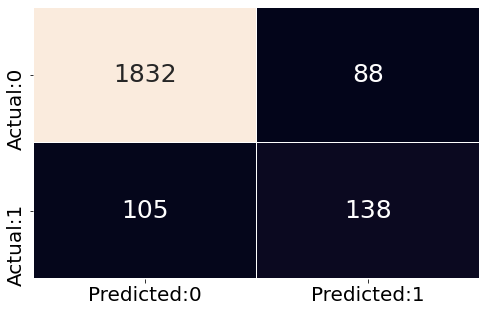

In [403]:
cm = confusion_matrix(y4_test,y4_pred_l4)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [404]:
# calculate various performance measures
acc_table1 = classification_report(y4_test,y4_pred_l4)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1920
           1       0.61      0.57      0.59       243

    accuracy                           0.91      2163
   macro avg       0.78      0.76      0.77      2163
weighted avg       0.91      0.91      0.91      2163



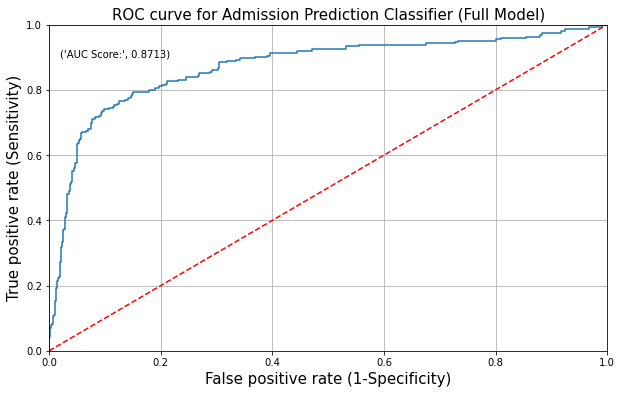

In [405]:
plt.figure(figsize=(10,6))
fpr, tpr, thresholds = roc_curve(y4_test, y4_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y4_test, y4_pred_prob),4)))
                               
plt.grid(True)

In [406]:
print('AUC Score:', round(metrics.roc_auc_score(y4_test, y4_pred_prob),4))

AUC Score: 0.8713


### Updating scorecard

In [407]:
score_card = score_card.append({'Model Name': 'Logit_WO_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y4_test,y4_pred_l4), 
                       'Precision': metrics.precision_score(y4_test,y4_pred_l4), 
                       'Recall': metrics.recall_score(y4_test,y4_pred_l4), 
                       'F1 Score': metrics.f1_score(y4_test,y4_pred_l4),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                          Logit-VIF  0.846452   0.457944  0.259259  0.331081
1                      LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2                  LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3               DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4               RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5                    XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6                     Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7                 LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8             LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9          DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10         RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801
11              XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090  0.971506
12             Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132  0.346667
13         LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487  0.343333
14     LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222  0.303797
15  DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429  0.681388
16  RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630  0.772727
17       XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217  0.956522
18      Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901  0.588486

## Using sklearn.linear_model import LogisticRegression

In [408]:
# removing intercept from train & test splits

X4_train_os = X4_train_os.iloc[:,1:]

X4_val = X4_val.iloc[:,1:]

X4_test = X4_test.iloc[:,1:]

In [409]:
logreg4_sk = LogisticRegression()  # sklearn add constant on its own
logreg4_sk.fit(X4_train_os, y4_train_os)

LogisticRegression()

### Do predictions on the Train set.

In [410]:
y4_train_pred= logreg4_sk.predict(X4_train_os)
y4_train_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

#### Plot the confusion matrix of Validation set.

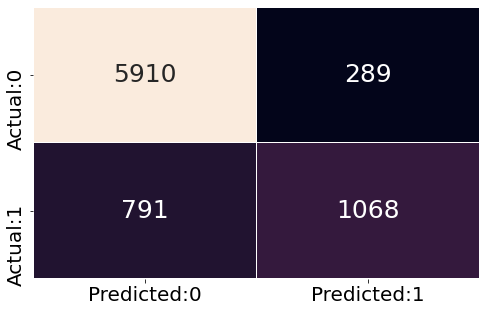

In [411]:
cm = confusion_matrix(y4_train_os, y4_train_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [412]:
# calculate various performance measures
acc_table1 = classification_report(y4_train_os, y4_train_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6199
           1       0.79      0.57      0.66      1859

    accuracy                           0.87      8058
   macro avg       0.83      0.76      0.79      8058
weighted avg       0.86      0.87      0.86      8058



### Do predictions on the Validation set.

In [413]:
y4_val_pred= logreg4_sk.predict(X4_val)
y4_val_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

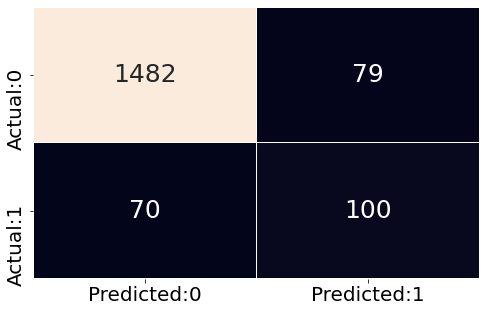

In [414]:
cm = confusion_matrix(y4_val, y4_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [415]:
# calculate various performance measures
acc_table1 = classification_report(y4_val, y4_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1561
           1       0.56      0.59      0.57       170

    accuracy                           0.91      1731
   macro avg       0.76      0.77      0.76      1731
weighted avg       0.92      0.91      0.91      1731



### Do predictions on the test set.

In [416]:
y4_test_pred_sk= logreg4_sk.predict(X4_test)
y4_test_pred_sk

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Plot the confusion matrix of test set.

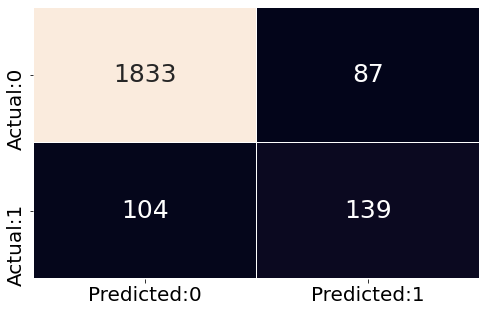

In [417]:
cm = confusion_matrix(y4_test, y4_test_pred_sk)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [418]:
# calculate various performance measures
acc_table1 = classification_report(y4_test, y4_test_pred_sk)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1920
           1       0.62      0.57      0.59       243

    accuracy                           0.91      2163
   macro avg       0.78      0.76      0.77      2163
weighted avg       0.91      0.91      0.91      2163



### Updating scorecard

In [419]:
score_card = score_card.append({'Model Name': 'LogReg_SK_WO_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y4_test, y4_test_pred_sk), 
                       'Precision': metrics.precision_score(y4_test, y4_test_pred_sk), 
                       'Recall': metrics.recall_score(y4_test, y4_test_pred_sk), 
                       'F1 Score': metrics.f1_score(y4_test, y4_test_pred_sk),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  F1 Score
0                          Logit-VIF  0.846452   0.457944  0.259259  0.331081
1                      LogReg_Sk_VIF  0.844513   0.445498  0.248677  0.319185
2                  LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968  0.327087
3               DecisionTree_HYP_VIF  0.873594   0.577844  0.510582  0.542135
4               RandomForest_HYP_VIF  0.904614   0.726027  0.560847  0.632836
5                    XGBoost_HYP_VIF  0.978674   0.940054  0.912698  0.926174
6                     Logit_Col_drop  0.851105   0.487395  0.306878  0.376623
7                 LogReg_SK_Col_drop  0.853044   0.497797  0.298942  0.373554
8             LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804  0.307692
9          DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153  0.513932
10         RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646  0.651801
11              XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090  0.971506
12             Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132  0.346667
13         LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487  0.343333
14     LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222  0.303797
15  DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429  0.681388
16  RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630  0.772727
17       XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217  0.956522
18      Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901  0.588486
19  LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016  0.592751

## Using Recursive Feature Elimination (RFE)

In [420]:
logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = None)

rfe_model = rfe_model.fit(X4_train_os, y4_train_os)

feat_index = pd.Series(data = rfe_model.ranking_, index = X4_train_os.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
       'total_night_charge', 'area_code_Area 2', 'area_code_Area 3',
       'international_plan_yes', 'voice_mail_plan_yes'],
      dtype='object')


In [421]:
# Storing the important feature in train, validation & test variable 
X4_train_rf = X4_train_os[['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
                           'total_night_charge', 'area_code_Area 2', 'area_code_Area 3',
                           'international_plan_yes', 'voice_mail_plan_yes']]
X4_test_rf = X4_test[['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
                       'total_night_charge', 'area_code_Area 2', 'area_code_Area 3',
                       'international_plan_yes', 'voice_mail_plan_yes']]
X4_val_rf = X4_val[['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
                       'total_night_charge', 'area_code_Area 2', 'area_code_Area 3',
                       'international_plan_yes', 'voice_mail_plan_yes']]

In [422]:
logreg4_rfe = LogisticRegression()  # sklearn add constant onits own
logreg4_rfe.fit(X4_train_rf,y4_train_os)

LogisticRegression()

### Do predictions on the Validation set.

In [423]:
y4_val_pred= logreg4_rfe.predict(X4_val_rf)
y4_val_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

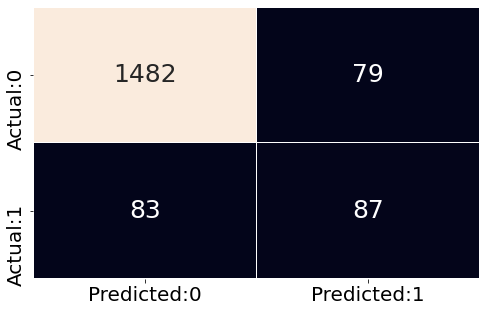

In [424]:
cm = confusion_matrix(y4_val, y4_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [425]:
# calculate various performance measures
acc_table1 = classification_report(y4_val, y4_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1561
           1       0.52      0.51      0.52       170

    accuracy                           0.91      1731
   macro avg       0.74      0.73      0.73      1731
weighted avg       0.91      0.91      0.91      1731



### Do predictions on the test set.

In [426]:
y4_test_pred_rf= logreg4_rfe.predict(X4_test_rf)
y4_test_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Plot the confusion matrix of test set.

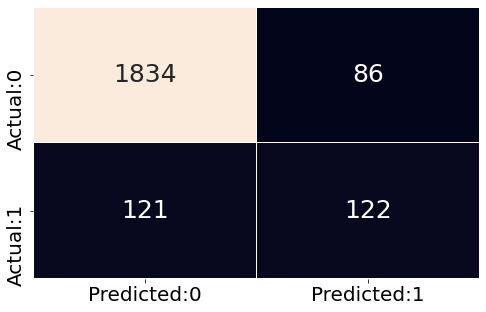

In [427]:
cm = confusion_matrix(y4_test, y4_test_pred_rf)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [428]:
# calculate various performance measures
acc_table = classification_report(y4_test, y4_test_pred_rf)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1920
           1       0.59      0.50      0.54       243

    accuracy                           0.90      2163
   macro avg       0.76      0.73      0.74      2163
weighted avg       0.90      0.90      0.90      2163



### Updating scorecard

In [429]:
score_card = score_card.append({'Model Name': 'LogReg_SK_rfe_WO_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y4_test, y4_test_pred_rf), 
                       'Precision': metrics.precision_score(y4_test, y4_test_pred_rf), 
                       'Recall': metrics.recall_score(y4_test, y4_test_pred_rf), 
                       'F1 Score': metrics.f1_score(y4_test, y4_test_pred_rf),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                              Logit-VIF  0.846452   0.457944  0.259259   
1                          LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                      LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                   DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                   RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                        XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                         Logit_Col_drop  0.851105   0.487395  0.306878   
7                     LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                 LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9              DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10             RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                  XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                 Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13             LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14         LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15      DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16      RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17           XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18          Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19      LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20  LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020

## Using Decision Tree

#### Create a generalized function to calculate the metrics for the train and the test set.

In [430]:
def get_train_report(model):

    train_pred = model.predict(X4_train_os)

    return(classification_report(y4_train_os, train_pred))

In [431]:
def get_val_report(model):

    val_pred = model.predict(X4_val)

    return(classification_report(y4_val, val_pred))

In [432]:
def get_test_report(model):

    test_pred = model.predict(X4_test)

    return(classification_report(y4_test, test_pred))

#### Build a full decision tree model on a train dataset using 'entropy'.

In [433]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree4 = decision_tree_classification.fit(X4_train_os, y4_train_os)

### Over-fitting in Decision Tree



**Calculate performance measures on the train set.**

In [434]:
train_report = get_train_report(decision_tree4)

print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6199
           1       1.00      1.00      1.00      1859

    accuracy                           1.00      8058
   macro avg       1.00      1.00      1.00      8058
weighted avg       1.00      1.00      1.00      8058



**Calculate performance measures on the Validation set.**

In [435]:
val_report = get_val_report(decision_tree4)

print(val_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1561
           1       0.89      0.96      0.92       170

    accuracy                           0.98      1731
   macro avg       0.94      0.97      0.96      1731
weighted avg       0.98      0.98      0.98      1731



**Calculate performance measures on the test set.**

In [436]:
test_report = get_test_report(decision_tree4)

print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1920
           1       0.87      0.93      0.90       243

    accuracy                           0.98      2163
   macro avg       0.93      0.96      0.94      2163
weighted avg       0.98      0.98      0.98      2163



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

#### Build a decision tree using 'criterion = gini', 'max_depth = 5', 'min_samples_split = 4', 'max_leaf_nodes = 6'.

In [437]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

decision_tree = dt_model.fit(X4_train_os, y4_train_os)

train_report = get_train_report(decision_tree)
print('Train data:\n', train_report)

val_report = get_val_report(decision_tree)
print('Validation data:\n', val_report)

test_report = get_test_report(decision_tree)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      6199
           1       0.84      0.63      0.72      1859

    accuracy                           0.89      8058
   macro avg       0.87      0.80      0.83      8058
weighted avg       0.89      0.89      0.88      8058

Validation data:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1561
           1       0.67      0.73      0.70       170

    accuracy                           0.94      1731
   macro avg       0.82      0.85      0.83      1731
weighted avg       0.94      0.94      0.94      1731

Test data:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1920
           1       0.66      0.63      0.64       243

    accuracy                           0.92      2163
   macro avg       0.81      0.79      0.80      2163
weighted avg       0.92      0.

**Interpretation:** From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

### Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [438]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X4_train_os, y4_train_os)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [439]:
dt_model4_gcv = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model4_gcv = dt_model4_gcv.fit(X4_train_os, y4_train_os)

**Calculate performance measures on the train set.**

In [440]:
print('Classification Report for train set: \n', get_train_report(dt_model4_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      6199
           1       0.86      0.51      0.64      1859

    accuracy                           0.87      8058
   macro avg       0.86      0.74      0.78      8058
weighted avg       0.87      0.87      0.85      8058



**Calculate performance measures on the Validation set.**

In [441]:
print('Classification Report for Validation set: \n', get_val_report(dt_model4_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1561
           1       0.70      0.56      0.62       170

    accuracy                           0.93      1731
   macro avg       0.83      0.77      0.79      1731
weighted avg       0.93      0.93      0.93      1731



**Calculate performance measures on the test set.**

In [442]:
print('Classification Report for test set: \n', get_test_report(dt_model4_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1920
           1       0.71      0.47      0.57       243

    accuracy                           0.92      2163
   macro avg       0.82      0.72      0.76      2163
weighted avg       0.91      0.92      0.91      2163



### Updating scorecard

In [443]:
y4_test_pred_dt= dt_model4_gcv.predict(X4_test)
y4_test_pred_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [444]:
score_card = score_card.append({'Model Name': 'DecisionTree_HYP_WO_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y4_test, y4_test_pred_dt), 
                       'Precision': metrics.precision_score(y4_test, y4_test_pred_dt), 
                       'Recall': metrics.recall_score(y4_test, y4_test_pred_dt), 
                       'F1 Score': metrics.f1_score(y4_test, y4_test_pred_dt),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                                 Logit-VIF  0.846452   0.457944  0.259259   
1                             LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                         LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                      DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                      RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                            Logit_Col_drop  0.851105   0.487395  0.306878   
7                        LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                    LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9                 DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10                RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                     XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15         DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16         RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17              XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
21  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020  
21  0.566502

# Ensembling Techniques 


## Random Forest for Classification

In [445]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification4 = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model4 = rf_classification4.fit(X4_train_os, y4_train_os)

**Calculate performance measures on the train set.**

In [446]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model4))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6199
           1       1.00      0.99      0.99      1859

    accuracy                           1.00      8058
   macro avg       1.00      1.00      1.00      8058
weighted avg       1.00      1.00      1.00      8058



**Calculate performance measures on the Validation set.**

In [447]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model4))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1561
           1       0.98      0.91      0.94       170

    accuracy                           0.99      1731
   macro avg       0.99      0.95      0.97      1731
weighted avg       0.99      0.99      0.99      1731



**Calculate performance measures on the test set.**

In [448]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_model4))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1920
           1       0.99      0.90      0.94       243

    accuracy                           0.99      2163
   macro avg       0.99      0.95      0.97      2163
weighted avg       0.99      0.99      0.99      2163



In [449]:
# Selecting best hyper parameters using gridsearch cv

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X4_train_os, y4_train_os)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 70} 



In [450]:
# Random forest model with best hyper paramters

rf_model4_gcv = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model4_gcv = rf_model4_gcv.fit(X4_train_os, y4_train_os)

**Calculate performance measures on the train set.**

In [451]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model4_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      6199
           1       0.99      0.57      0.72      1859

    accuracy                           0.90      8058
   macro avg       0.94      0.78      0.83      8058
weighted avg       0.91      0.90      0.89      8058



**Calculate performance measures on the Validation set.**

In [452]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model4_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1561
           1       0.93      0.58      0.71       170

    accuracy                           0.95      1731
   macro avg       0.94      0.79      0.84      1731
weighted avg       0.95      0.95      0.95      1731



**Calculate performance measures on the test set.**

In [453]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_model4_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1920
           1       0.95      0.47      0.63       243

    accuracy                           0.94      2163
   macro avg       0.94      0.73      0.80      2163
weighted avg       0.94      0.94      0.93      2163



### Updating scorecard

In [454]:
y4_test_pred_rf= rf_model4_gcv.predict(X4_test)
y4_test_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [455]:
score_card = score_card.append({'Model Name': 'RandomForest_HYP_WO_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y4_test, y4_test_pred_rf), 
                       'Precision': metrics.precision_score(y4_test, y4_test_pred_rf), 
                       'Recall': metrics.recall_score(y4_test, y4_test_pred_rf), 
                       'F1 Score': metrics.f1_score(y4_test, y4_test_pred_rf),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                                 Logit-VIF  0.846452   0.457944  0.259259   
1                             LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                         LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                      DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                      RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                            Logit_Col_drop  0.851105   0.487395  0.306878   
7                        LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                    LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9                 DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10                RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                     XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15         DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16         RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17              XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
21  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   
22  RandomForest_HYP_WO_FeaEng_Col_drop_out  0.937587   0.950000  0.469136   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020  
21  0.566502  
22  0.628099

## Boosting
### XGBoost

In [456]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model4 = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model4.fit(X4_train_os, y4_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate Performance Measure on train set**

In [457]:
print('Classification Report for train set: \n', get_train_report(xgb_model4))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6199
           1       1.00      1.00      1.00      1859

    accuracy                           1.00      8058
   macro avg       1.00      1.00      1.00      8058
weighted avg       1.00      1.00      1.00      8058



**Calculate Performance Measure on validation set**

In [458]:
print('Classification Report for validation set: \n', get_val_report(xgb_model4))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1561
           1       0.97      0.94      0.96       170

    accuracy                           0.99      1731
   macro avg       0.98      0.97      0.98      1731
weighted avg       0.99      0.99      0.99      1731



**Calculate Performance Measure on test set**

In [459]:
print('Classification Report for test set: \n', get_test_report(xgb_model4))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1920
           1       0.99      0.94      0.97       243

    accuracy                           0.99      2163
   macro avg       0.99      0.97      0.98      2163
weighted avg       0.99      0.99      0.99      2163



## Tune the Hyperparameters (GridSearchCV)

In [460]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X4_train_os, y4_train_os)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 9} 



In [461]:
xgb_grid_model4 = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
xgb_grid_model4.fit(X4_train_os, y4_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate Performance Measure on train set**

In [462]:
print('Classification Report for train set: \n', get_train_report(xgb_grid_model4))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6199
           1       1.00      1.00      1.00      1859

    accuracy                           1.00      8058
   macro avg       1.00      1.00      1.00      8058
weighted avg       1.00      1.00      1.00      8058



**Calculate Performance Measure on validation set**

In [463]:
print('Classification Report for validation set: \n', get_val_report(xgb_grid_model4))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1561
           1       0.98      0.95      0.96       170

    accuracy                           0.99      1731
   macro avg       0.99      0.97      0.98      1731
weighted avg       0.99      0.99      0.99      1731



**Calculate Performance Measure on test set**

In [464]:
print('Classification Report for test set: \n', get_test_report(xgb_grid_model4))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1920
           1       0.99      0.93      0.96       243

    accuracy                           0.99      2163
   macro avg       0.99      0.96      0.98      2163
weighted avg       0.99      0.99      0.99      2163



### Updating scorecard

In [465]:
y4_test_pred_xg= xgb_grid_model4.predict(X4_test)
y4_test_pred_xg

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [466]:
score_card = score_card.append({'Model Name': 'XGBoost_HYP_WO_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y4_test, y4_test_pred_xg), 
                       'Precision': metrics.precision_score(y4_test, y4_test_pred_xg), 
                       'Recall': metrics.recall_score(y4_test, y4_test_pred_xg), 
                       'F1 Score': metrics.f1_score(y4_test, y4_test_pred_xg),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                                 Logit-VIF  0.846452   0.457944  0.259259   
1                             LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                         LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                      DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                      RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                            Logit_Col_drop  0.851105   0.487395  0.306878   
7                        LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                    LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9                 DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10                RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                     XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15         DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16         RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17              XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
21  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   
22  RandomForest_HYP_WO_FeaEng_Col_drop_out  0.937587   0.950000  0.469136   
23       XGBoost_HYP_WO_FeaEng_Col_drop_out  0.990754   0.991189  0.925926   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020  
21  0.566502  
22  0.628099  
23  0.957447

## 5. Dataset with Feature Engineering - using Heatmap, dropped highly positive correlated columns (After Outlier Treatment).

## Using Logistic Regression

#### Logit Function

In [467]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg5 = sm.Logit(y5_train_os, X5_train_os).fit()

# print the summary of the model
print(logreg5.summary())

Optimization terminated successfully.
         Current function value: 0.361098
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8590
Model:                          Logit   Df Residuals:                     8579
Method:                           MLE   Df Model:                           10
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                  0.3315
Time:                        16:10:02   Log-Likelihood:                -3101.8
converged:                       True   LL-Null:                       -4640.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.5432      0.184     -2.946      0.

#### Pseudo R-squared value is 0.3445

#### LLR p-value is lesser than 0.05, which implies the model is significant

In [468]:
y5_pred_prob = logreg5.predict(X5_test)

y5_pred_prob.head()

4635     0.275618
1762     0.057738
11096    0.033500
8362     0.034172
8347     0.039879
dtype: float64

In [469]:
y5_pred_l5 = [ 0 if x < 0.5 else 1 for x in y5_pred_prob]

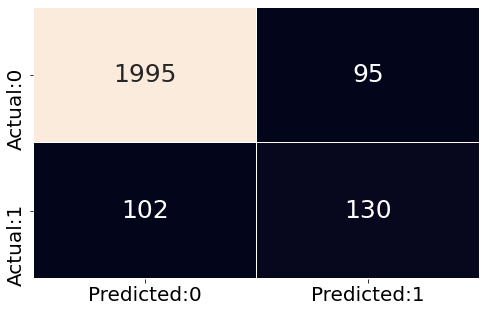

In [470]:
cm = confusion_matrix(y5_test,y5_pred_l5)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [471]:
# calculate various performance measures
acc_table1 = classification_report(y5_test,y5_pred_l5)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2090
           1       0.58      0.56      0.57       232

    accuracy                           0.92      2322
   macro avg       0.76      0.76      0.76      2322
weighted avg       0.91      0.92      0.91      2322



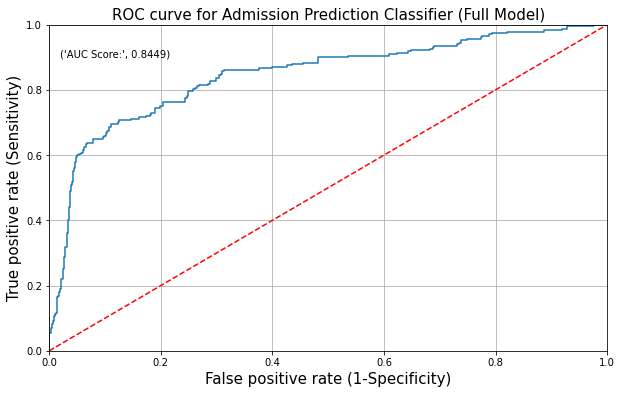

In [472]:
plt.figure(figsize=(10,6))
fpr, tpr, thresholds = roc_curve(y5_test, y5_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y5_test, y5_pred_prob),4)))
                               
plt.grid(True)

In [473]:
print('AUC Score:', round(metrics.roc_auc_score(y5_test, y5_pred_prob),4))

AUC Score: 0.8449


### Updating scorecard

In [474]:
score_card = score_card.append({'Model Name': 'Logit_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y5_test,y5_pred_l5), 
                       'Precision': metrics.precision_score(y5_test,y5_pred_l5), 
                       'Recall': metrics.recall_score(y5_test,y5_pred_l5), 
                       'F1 Score': metrics.f1_score(y5_test,y5_pred_l5),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                                 Logit-VIF  0.846452   0.457944  0.259259   
1                             LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                         LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                      DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                      RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                            Logit_Col_drop  0.851105   0.487395  0.306878   
7                        LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                    LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9                 DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10                RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                     XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15         DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16         RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17              XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
21  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   
22  RandomForest_HYP_WO_FeaEng_Col_drop_out  0.937587   0.950000  0.469136   
23       XGBoost_HYP_WO_FeaEng_Col_drop_out  0.990754   0.991189  0.925926   
24                Logit_FeaEng_Col_drop_out  0.915159   0.577778  0.560345   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020  
21  0.566502  
22  0.628099  
23  0.957447  
24  0.568928

## Using sklearn.linear_model import LogisticRegression

In [475]:
# removing intercept from train & test splits

X5_train_os = X5_train_os.iloc[:,1:]

X5_val = X5_val.iloc[:,1:]

X5_test = X5_test.iloc[:,1:]

In [476]:
logreg5_sk = LogisticRegression()  # sklearn add constant on its own
logreg5_sk.fit(X5_train_os, y5_train_os)

LogisticRegression()

### Do predictions on the Train set.

In [477]:
y5_train_pred= logreg5_sk.predict(X5_train_os)
y5_train_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

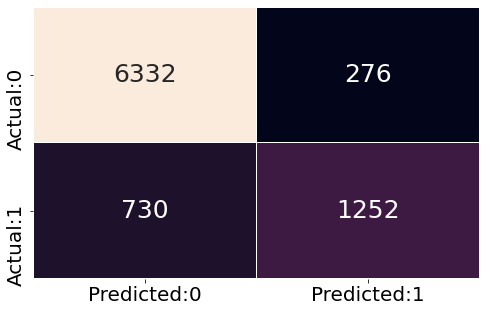

In [478]:
cm = confusion_matrix(y5_train_os, y5_train_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [479]:
# calculate various performance measures
acc_table1 = classification_report(y5_train_os, y5_train_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6608
           1       0.82      0.63      0.71      1982

    accuracy                           0.88      8590
   macro avg       0.86      0.79      0.82      8590
weighted avg       0.88      0.88      0.88      8590



### Do predictions on the Validation set.

In [480]:
y5_val_pred= logreg5_sk.predict(X5_val)
y5_val_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

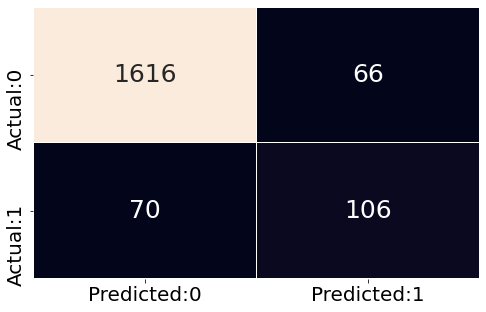

In [481]:
cm = confusion_matrix(y5_val, y5_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [482]:
# calculate various performance measures
acc_table1 = classification_report(y5_val, y5_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1682
           1       0.62      0.60      0.61       176

    accuracy                           0.93      1858
   macro avg       0.79      0.78      0.78      1858
weighted avg       0.93      0.93      0.93      1858



### Do predictions on the test set.

In [483]:
y5_test_pred_sk= logreg5_sk.predict(X5_test)
y5_test_pred_sk

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Plot the confusion matrix of test set.

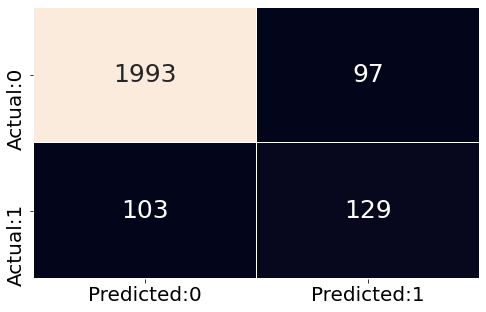

In [484]:
cm = confusion_matrix(y5_test, y5_test_pred_sk)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [485]:
# calculate various performance measures
acc_table1 = classification_report(y5_test, y5_test_pred_sk)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2090
           1       0.57      0.56      0.56       232

    accuracy                           0.91      2322
   macro avg       0.76      0.75      0.76      2322
weighted avg       0.91      0.91      0.91      2322



### Updating scorecard

In [486]:
score_card = score_card.append({'Model Name': 'LogReg_SK_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y5_test,y5_test_pred_sk), 
                       'Precision': metrics.precision_score(y5_test,y5_test_pred_sk), 
                       'Recall': metrics.recall_score(y5_test,y5_test_pred_sk), 
                       'F1 Score': metrics.f1_score(y5_test,y5_test_pred_sk),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                                 Logit-VIF  0.846452   0.457944  0.259259   
1                             LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                         LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                      DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                      RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                            Logit_Col_drop  0.851105   0.487395  0.306878   
7                        LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                    LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9                 DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10                RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                     XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15         DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16         RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17              XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
21  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   
22  RandomForest_HYP_WO_FeaEng_Col_drop_out  0.937587   0.950000  0.469136   
23       XGBoost_HYP_WO_FeaEng_Col_drop_out  0.990754   0.991189  0.925926   
24                Logit_FeaEng_Col_drop_out  0.915159   0.577778  0.560345   
25            LogReg_SK_FeaEng_Col_drop_out  0.913867   0.570796  0.556034   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020  
21  0.566502  
22  0.628099  
23  0.957447  
24  0.568928  
25  0.563319

## Using Recursive Feature Elimination (RFE)

In [487]:
logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = None)

rfe_model = rfe_model.fit(X5_train_os, y5_train_os)

feat_index = pd.Series(data = rfe_model.ranking_, index = X5_train_os.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['number_vmail_messages', 'Total_Charge', 'area_code_Area 3',
       'international_plan_yes', 'voice_mail_plan_yes'],
      dtype='object')


In [488]:
# Storing the important feature in train, validation & test variable 
X5_train_rf = X5_train_os[['number_vmail_messages', 'Total_Charge', 'area_code_Area 3',
                           'international_plan_yes', 'voice_mail_plan_yes']]
X5_test_rf = X5_test[['number_vmail_messages', 'Total_Charge', 'area_code_Area 3',
                       'international_plan_yes', 'voice_mail_plan_yes']]
X5_val_rf = X5_val[['number_vmail_messages', 'Total_Charge', 'area_code_Area 3',
                   'international_plan_yes', 'voice_mail_plan_yes']]

In [489]:
logreg5_rfe = LogisticRegression()  # sklearn add constant onits own
logreg5_rfe.fit(X5_train_rf,y5_train_os)

LogisticRegression()

### Do predictions on the Validation set.

In [490]:
y5_val_pred= logreg5_rfe.predict(X5_val_rf)
y5_val_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Plot the confusion matrix of Validation set.

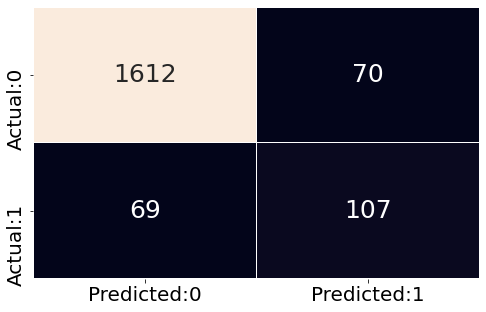

In [491]:
cm = confusion_matrix(y5_val, y5_val_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [492]:
# calculate various performance measures
acc_table1 = classification_report(y5_val, y5_val_pred)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1682
           1       0.60      0.61      0.61       176

    accuracy                           0.93      1858
   macro avg       0.78      0.78      0.78      1858
weighted avg       0.93      0.93      0.93      1858



### Do predictions on the test set.

In [493]:
y5_test_pred_rf= logreg5_rfe.predict(X5_test_rf)
y5_test_pred_rf

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Plot the confusion matrix of test set.

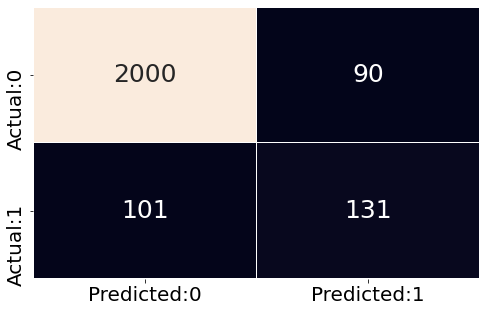

In [494]:
cm = confusion_matrix(y5_test, y5_test_pred_rf)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [495]:
# calculate various performance measures
acc_table = classification_report(y5_test, y5_test_pred_rf)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2090
           1       0.59      0.56      0.58       232

    accuracy                           0.92      2322
   macro avg       0.77      0.76      0.77      2322
weighted avg       0.92      0.92      0.92      2322



### Updating scorecard

In [496]:
score_card = score_card.append({'Model Name': 'LogReg_SK_rfe_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y5_test,y5_test_pred_rf), 
                       'Precision': metrics.precision_score(y5_test,y5_test_pred_rf), 
                       'Recall': metrics.recall_score(y5_test,y5_test_pred_rf), 
                       'F1 Score': metrics.f1_score(y5_test,y5_test_pred_rf),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                                 Logit-VIF  0.846452   0.457944  0.259259   
1                             LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                         LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                      DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                      RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                            Logit_Col_drop  0.851105   0.487395  0.306878   
7                        LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                    LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9                 DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10                RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                     XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15         DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16         RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17              XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
21  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   
22  RandomForest_HYP_WO_FeaEng_Col_drop_out  0.937587   0.950000  0.469136   
23       XGBoost_HYP_WO_FeaEng_Col_drop_out  0.990754   0.991189  0.925926   
24                Logit_FeaEng_Col_drop_out  0.915159   0.577778  0.560345   
25            LogReg_SK_FeaEng_Col_drop_out  0.913867   0.570796  0.556034   
26        LogReg_SK_rfe_FeaEng_Col_drop_out  0.917743   0.592760  0.564655   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020  
21  0.566502  
22  0.628099  
23  0.957447  
24  0.568928  
25  0.563319  
26  0.578366

## Using Decision Tree

#### Create a generalized function to calculate the metrics for the train and the test set.

In [497]:
def get_train_report(model):

    train_pred = model.predict(X5_train_os)

    return(classification_report(y5_train_os, train_pred))

In [498]:
def get_val_report(model):

    val_pred = model.predict(X5_val)

    return(classification_report(y5_val, val_pred))

In [499]:
def get_test_report(model):

    test_pred = model.predict(X5_test)

    return(classification_report(y5_test, test_pred))

#### Build a full decision tree model on a train dataset using 'entropy'.

In [500]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree5 = decision_tree_classification.fit(X5_train_os, y5_train_os)

### Over-fitting in Decision Tree



**Calculate performance measures on the train set.**

In [501]:
train_report = get_train_report(decision_tree5)

print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6608
           1       1.00      1.00      1.00      1982

    accuracy                           1.00      8590
   macro avg       1.00      1.00      1.00      8590
weighted avg       1.00      1.00      1.00      8590



**Calculate performance measures on the Validation set.**

In [502]:
val_report = get_val_report(decision_tree5)

print(val_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1682
           1       0.84      0.97      0.90       176

    accuracy                           0.98      1858
   macro avg       0.92      0.97      0.94      1858
weighted avg       0.98      0.98      0.98      1858



**Calculate performance measures on the test set.**

In [503]:
test_report = get_test_report(decision_tree5)

print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2090
           1       0.84      0.93      0.88       232

    accuracy                           0.98      2322
   macro avg       0.92      0.95      0.93      2322
weighted avg       0.98      0.98      0.98      2322



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

#### Build a decision tree using 'criterion = gini', 'max_depth = 5', 'min_samples_split = 4', 'max_leaf_nodes = 6'.

In [504]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

decision_tree = dt_model.fit(X5_train_os, y5_train_os)

train_report = get_train_report(decision_tree)
print('Train data:\n', train_report)

val_report = get_val_report(decision_tree)
print('Validation data:\n', val_report)

test_report = get_test_report(decision_tree)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      6608
           1       0.81      0.74      0.78      1982

    accuracy                           0.90      8590
   macro avg       0.87      0.85      0.86      8590
weighted avg       0.90      0.90      0.90      8590

Validation data:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1682
           1       0.62      0.78      0.69       176

    accuracy                           0.93      1858
   macro avg       0.80      0.86      0.83      1858
weighted avg       0.94      0.93      0.94      1858

Test data:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      2090
           1       0.59      0.72      0.65       232

    accuracy                           0.92      2322
   macro avg       0.78      0.83      0.80      2322
weighted avg       0.93      0.

**Interpretation:** From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

### Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [505]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X5_train_os, y5_train_os)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [506]:
dt_model5_gcv = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model5_gcv = dt_model5_gcv.fit(X5_train_os, y5_train_os)

**Calculate performance measures on the train set.**

In [507]:
print('Classification Report for train set: \n', get_train_report(dt_model5_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      6608
           1       0.74      0.70      0.72      1982

    accuracy                           0.87      8590
   macro avg       0.83      0.81      0.82      8590
weighted avg       0.87      0.87      0.87      8590



**Calculate performance measures on the Validation set.**

In [508]:
print('Classification Report for Validation set: \n', get_val_report(dt_model5_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1682
           1       0.52      0.71      0.60       176

    accuracy                           0.91      1858
   macro avg       0.74      0.82      0.77      1858
weighted avg       0.93      0.91      0.92      1858



**Calculate performance measures on the test set.**

In [509]:
print('Classification Report for test set: \n', get_test_report(dt_model5_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2090
           1       0.48      0.67      0.56       232

    accuracy                           0.89      2322
   macro avg       0.72      0.80      0.75      2322
weighted avg       0.91      0.89      0.90      2322



### Updating scorecard

In [510]:
y5_test_pred_dt= dt_model5_gcv.predict(X5_test)
y5_test_pred_dt

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [511]:
score_card = score_card.append({'Model Name': 'DecisionTree_HYP_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y5_test,y5_test_pred_dt), 
                       'Precision': metrics.precision_score(y5_test,y5_test_pred_dt), 
                       'Recall': metrics.recall_score(y5_test,y5_test_pred_dt), 
                       'F1 Score': metrics.f1_score(y5_test,y5_test_pred_dt),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                                 Logit-VIF  0.846452   0.457944  0.259259   
1                             LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                         LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                      DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                      RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                            Logit_Col_drop  0.851105   0.487395  0.306878   
7                        LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                    LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9                 DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10                RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                     XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15         DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16         RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17              XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
21  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   
22  RandomForest_HYP_WO_FeaEng_Col_drop_out  0.937587   0.950000  0.469136   
23       XGBoost_HYP_WO_FeaEng_Col_drop_out  0.990754   0.991189  0.925926   
24                Logit_FeaEng_Col_drop_out  0.915159   0.577778  0.560345   
25            LogReg_SK_FeaEng_Col_drop_out  0.913867   0.570796  0.556034   
26        LogReg_SK_rfe_FeaEng_Col_drop_out  0.917743   0.592760  0.564655   
27     DecisionTree_HYP_FeaEng_Col_drop_out  0.894918   0.481481  0.672414   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020  
21  0.566502  
22  0.628099  
23  0.957447  
24  0.568928  
25  0.563319  
26  0.578366  
27  0.561151

# Ensembling Techniques 


## Random Forest for Classification

In [512]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification5 = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model5 = rf_classification5.fit(X5_train_os, y5_train_os)

**Calculate performance measures on the train set.**

In [513]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model5))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6608
           1       1.00      0.99      0.99      1982

    accuracy                           1.00      8590
   macro avg       1.00      0.99      1.00      8590
weighted avg       1.00      1.00      1.00      8590



**Calculate performance measures on the Validation set.**

In [514]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model5))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1682
           1       0.95      0.91      0.93       176

    accuracy                           0.99      1858
   macro avg       0.97      0.95      0.96      1858
weighted avg       0.99      0.99      0.99      1858



**Calculate performance measures on the test set.**

In [515]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_model5))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2090
           1       0.94      0.91      0.93       232

    accuracy                           0.99      2322
   macro avg       0.97      0.95      0.96      2322
weighted avg       0.99      0.99      0.99      2322



In [516]:
# Selecting best hyper parameters using gridsearch cv

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X5_train_os, y5_train_os)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30} 



In [517]:
# Random forest model with best hyper paramters

rf_model5_gcv = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model5_gcv = rf_model5_gcv.fit(X5_train_os, y5_train_os)

**Calculate performance measures on the train set.**

In [518]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(rf_model5_gcv))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      6608
           1       0.99      0.61      0.75      1982

    accuracy                           0.91      8590
   macro avg       0.94      0.80      0.85      8590
weighted avg       0.92      0.91      0.90      8590



**Calculate performance measures on the Validation set.**

In [519]:
# print the performance measures for Validation set for the model with best parameters
# call the function 'get_val_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for Validation set: \n', get_val_report(rf_model5_gcv))

Classification Report for Validation set: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1682
           1       0.96      0.57      0.71       176

    accuracy                           0.96      1858
   macro avg       0.96      0.78      0.85      1858
weighted avg       0.96      0.96      0.95      1858



**Calculate performance measures on the test set.**

In [520]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_model5_gcv))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2090
           1       0.95      0.52      0.67       232

    accuracy                           0.95      2322
   macro avg       0.95      0.76      0.82      2322
weighted avg       0.95      0.95      0.94      2322



### Updating scorecard

In [521]:
y5_test_pred_rf= rf_model5_gcv.predict(X5_test)
y5_test_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [522]:
score_card = score_card.append({'Model Name': 'RandomForest_HYP_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y5_test,y5_test_pred_rf), 
                       'Precision': metrics.precision_score(y5_test,y5_test_pred_rf), 
                       'Recall': metrics.recall_score(y5_test,y5_test_pred_rf), 
                       'F1 Score': metrics.f1_score(y5_test,y5_test_pred_rf),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                                 Logit-VIF  0.846452   0.457944  0.259259   
1                             LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                         LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                      DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                      RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                            Logit_Col_drop  0.851105   0.487395  0.306878   
7                        LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                    LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9                 DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10                RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                     XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15         DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16         RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17              XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
21  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   
22  RandomForest_HYP_WO_FeaEng_Col_drop_out  0.937587   0.950000  0.469136   
23       XGBoost_HYP_WO_FeaEng_Col_drop_out  0.990754   0.991189  0.925926   
24                Logit_FeaEng_Col_drop_out  0.915159   0.577778  0.560345   
25            LogReg_SK_FeaEng_Col_drop_out  0.913867   0.570796  0.556034   
26        LogReg_SK_rfe_FeaEng_Col_drop_out  0.917743   0.592760  0.564655   
27     DecisionTree_HYP_FeaEng_Col_drop_out  0.894918   0.481481  0.672414   
28     RandomForest_HYP_FeaEng_Col_drop_out  0.949182   0.952381  0.517241   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020  
21  0.566502  
22  0.628099  
23  0.957447  
24  0.568928  
25  0.563319  
26  0.578366  
27  0.561151  
28  0.670391

## Boosting
### XGBoost

In [523]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model5 = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model5.fit(X5_train_os, y5_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate Performance Measure on train set**

In [524]:
print('Classification Report for train set: \n', get_train_report(xgb_model5))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6608
           1       1.00      0.99      1.00      1982

    accuracy                           1.00      8590
   macro avg       1.00      1.00      1.00      8590
weighted avg       1.00      1.00      1.00      8590



**Calculate Performance Measure on validation set**

In [525]:
print('Classification Report for validation set: \n', get_val_report(xgb_model5))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1682
           1       0.95      0.92      0.93       176

    accuracy                           0.99      1858
   macro avg       0.97      0.96      0.96      1858
weighted avg       0.99      0.99      0.99      1858



**Calculate Performance Measure on test set**

In [526]:
print('Classification Report for test set: \n', get_test_report(xgb_model5))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2090
           1       0.95      0.89      0.92       232

    accuracy                           0.98      2322
   macro avg       0.97      0.94      0.96      2322
weighted avg       0.98      0.98      0.98      2322



## Tune the Hyperparameters (GridSearchCV)

In [527]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X5_train_os, y5_train_os)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 8} 



In [528]:
# instantiate the 'XGBClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
xgb_grid_model5 = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_grid_model5.fit(X5_train_os, y5_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Calculate Performance Measure on train set**

In [529]:
print('Classification Report for train set: \n', get_train_report(xgb_grid_model5))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6608
           1       1.00      1.00      1.00      1982

    accuracy                           1.00      8590
   macro avg       1.00      1.00      1.00      8590
weighted avg       1.00      1.00      1.00      8590



**Calculate Performance Measure on validation set**

In [530]:
print('Classification Report for validation set: \n', get_val_report(xgb_grid_model5))

Classification Report for validation set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       0.95      0.96      0.96       176

    accuracy                           0.99      1858
   macro avg       0.98      0.98      0.98      1858
weighted avg       0.99      0.99      0.99      1858



**Calculate Performance Measure on test set**

In [531]:
print('Classification Report for test set: \n', get_test_report(xgb_grid_model5))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2090
           1       0.95      0.93      0.94       232

    accuracy                           0.99      2322
   macro avg       0.97      0.96      0.97      2322
weighted avg       0.99      0.99      0.99      2322



### Updating scorecard

In [532]:
y5_test_pred_xg= xgb_grid_model5.predict(X5_test)
y5_test_pred_xg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [533]:
score_card = score_card.append({'Model Name': 'XGBoost_HYP_FeaEng_Col_drop_out',
                       'Accuracy':metrics.accuracy_score(y5_test,y5_test_pred_xg), 
                       'Precision': metrics.precision_score(y5_test,y5_test_pred_xg), 
                       'Recall': metrics.recall_score(y5_test,y5_test_pred_xg), 
                       'F1 Score': metrics.f1_score(y5_test,y5_test_pred_xg),
                       }, ignore_index = True)

score_card

Model Name  Accuracy  Precision    Recall  \
0                                 Logit-VIF  0.846452   0.457944  0.259259   
1                             LogReg_Sk_VIF  0.844513   0.445498  0.248677   
2                         LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
3                      DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
4                      RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
5                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
6                            Logit_Col_drop  0.851105   0.487395  0.306878   
7                        LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
8                    LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
9                 DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
10                RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
11                     XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
12                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
13                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
14            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
15         DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
16         RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
17              XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
18             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
19         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
20     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
21  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   
22  RandomForest_HYP_WO_FeaEng_Col_drop_out  0.937587   0.950000  0.469136   
23       XGBoost_HYP_WO_FeaEng_Col_drop_out  0.990754   0.991189  0.925926   
24                Logit_FeaEng_Col_drop_out  0.915159   0.577778  0.560345   
25            LogReg_SK_FeaEng_Col_drop_out  0.913867   0.570796  0.556034   
26        LogReg_SK_rfe_FeaEng_Col_drop_out  0.917743   0.592760  0.564655   
27     DecisionTree_HYP_FeaEng_Col_drop_out  0.894918   0.481481  0.672414   
28     RandomForest_HYP_FeaEng_Col_drop_out  0.949182   0.952381  0.517241   
29          XGBoost_HYP_FeaEng_Col_drop_out  0.987941   0.951327  0.926724   

    F1 Score  
0   0.331081  
1   0.319185  
2   0.327087  
3   0.542135  
4   0.632836  
5   0.926174  
6   0.376623  
7   0.373554  
8   0.307692  
9   0.513932  
10  0.651801  
11  0.971506  
12  0.346667  
13  0.343333  
14  0.303797  
15  0.681388  
16  0.772727  
17  0.956522  
18  0.588486  
19  0.592751  
20  0.541020  
21  0.566502  
22  0.628099  
23  0.957447  
24  0.568928  
25  0.563319  
26  0.578366  
27  0.561151  
28  0.670391  
29  0.938865

In [544]:
score_card.sort_values(['Accuracy', 'Precision', 'Recall', 'F1 Score'], ascending= False).reset_index(drop=True)

Model Name  Accuracy  Precision    Recall  \
0                      XGBoost_HYP_Col_drop  0.991857   0.997214  0.947090   
1        XGBoost_HYP_WO_FeaEng_Col_drop_out  0.990754   0.991189  0.925926   
2           XGBoost_HYP_FeaEng_Col_drop_out  0.987941   0.951327  0.926724   
3               XGBoost_HYP_FeaEng_Col_drop  0.987592   0.983240  0.931217   
4                           XGBoost_HYP_VIF  0.978674   0.940054  0.912698   
5      RandomForest_HYP_FeaEng_Col_drop_out  0.949182   0.952381  0.517241   
6          RandomForest_HYP_FeaEng_Col_drop  0.945715   1.000000  0.629630   
7   RandomForest_HYP_WO_FeaEng_Col_drop_out  0.937587   0.950000  0.469136   
8          DecisionTree_HYP_FeaEng_Col_drop  0.921675   0.843750  0.571429   
9                 RandomForest_HYP_Col_drop  0.921287   0.926829  0.502646   
10  DecisionTree_HYP_WO_FeaEng_Col_drop_out  0.918632   0.705521  0.473251   
11        LogReg_SK_rfe_FeaEng_Col_drop_out  0.917743   0.592760  0.564655   
12                Logit_FeaEng_Col_drop_out  0.915159   0.577778  0.560345   
13            LogReg_SK_FeaEng_Col_drop_out  0.913867   0.570796  0.556034   
14         LogReg_SK_WO_FeaEng_Col_drop_out  0.911697   0.615044  0.572016   
15             Logit_WO_FeaEng_Col_drop_out  0.910772   0.610619  0.567901   
16                     RandomForest_HYP_VIF  0.904614   0.726027  0.560847   
17     LogReg_SK_rfe_WO_FeaEng_Col_drop_out  0.904300   0.586538  0.502058   
18     DecisionTree_HYP_FeaEng_Col_drop_out  0.894918   0.481481  0.672414   
19                DecisionTree_HYP_Col_drop  0.878247   0.619403  0.439153   
20                     DecisionTree_HYP_VIF  0.873594   0.577844  0.510582   
21                       LogReg_SK_Col_drop  0.853044   0.497797  0.298942   
22                           Logit_Col_drop  0.851105   0.487395  0.306878   
23            LogReg_SK_rfe_FeaEng_Col_drop  0.850717   0.480000  0.222222   
24                    Logit_FeaEng_Col_drop  0.848003   0.468468  0.275132   
25                LogReg_SK_FeaEng_Col_drop  0.847228   0.463964  0.272487   
26                        LogReg_sk_rfe_VIF  0.846840   0.459330  0.253968   
27                                Logit-VIF  0.846452   0.457944  0.259259   
28                   LogReg_SK_rfe_Col_drop  0.846452   0.453608  0.232804   
29                            LogReg_Sk_VIF  0.844513   0.445498  0.248677   

    F1 Score  
0   0.971506  
1   0.957447  
2   0.938865  
3   0.956522  
4   0.926174  
5   0.670391  
6   0.772727  
7   0.628099  
8   0.681388  
9   0.651801  
10  0.566502  
11  0.578366  
12  0.568928  
13  0.563319  
14  0.592751  
15  0.588486  
16  0.632836  
17  0.541020  
18  0.561151  
19  0.513932  
20  0.542135  
21  0.373554  
22  0.376623  
23  0.303797  
24  0.346667  
25  0.343333  
26  0.327087  
27  0.331081  
28  0.307692  
29  0.319185

After sorting the values of the score card df, we can see the best fit model is "xgb_grid_model2".

# Feature Importance.

In [557]:
feat_importance = pd.DataFrame({'Features' : X2_train_os.columns,
                                'Importance' : xgb_grid_model2.feature_importances_}).sort_values('Importance', ascending = False).reset_index(drop = True)

feat_importance

Features  Importance
0          international_plan_yes    0.194706
1           number_vmail_messages    0.153635
2   number_customer_service_calls    0.137095
3                total_day_charge    0.110142
4                total_intl_calls    0.066027
5                total_eve_charge    0.060697
6               total_intl_charge    0.055213
7              total_night_charge    0.033811
8                area_code_Area 3    0.027556
9             voice_mail_plan_yes    0.025929
10               area_code_Area 2    0.025699
11                total_day_calls    0.024265
12                          state    0.022732
13                 account_length    0.021355
14                total_eve_calls    0.021249
15              total_night_calls    0.019891

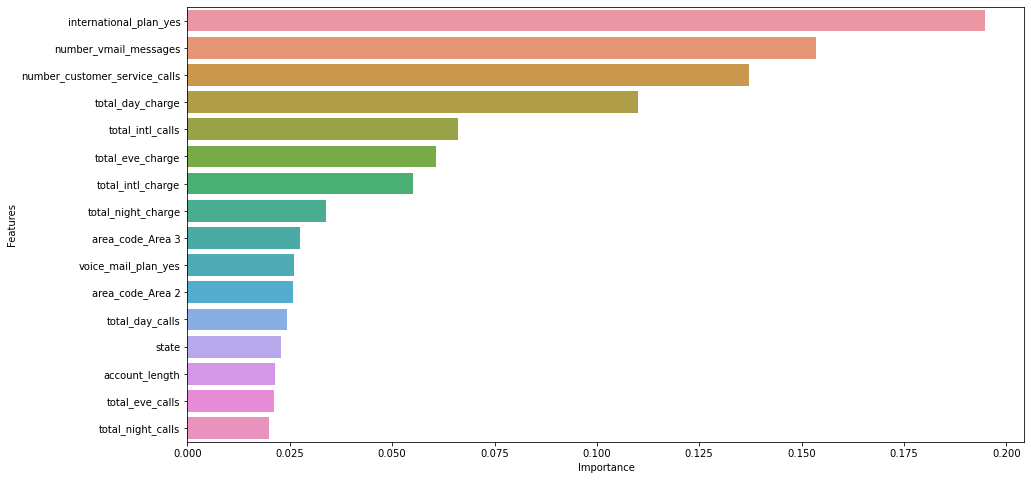

In [558]:
plt.figure(figsize = (15, 8))
sns.barplot(x = 'Importance', y = 'Features', data= feat_importance)
plt.show()

# Bias & Variance Error.

In [577]:
from sklearn.model_selection import cross_val_score

crossvalscore = cross_val_score(xgb_grid_model2, X2_train_os,
                                y2_train_os, cv=5, scoring='f1_weighted')

print(crossvalscore)

[0.97970483 0.98304668 0.98250805 0.97069698 0.97799755]


In [578]:
print('Bias - ', 1 - np.mean(crossvalscore))
print('Variance - ', np.std(crossvalscore)/np.mean(crossvalscore))

Bias -  0.021209181474988403
Variance -  0.0045439579404180485


Bias - 2.1% 

Variance - 0.45%

Both Bias and Variance is low. The model is good.

# ROC Curve.

In [570]:
from sklearn.metrics import roc_auc_score, roc_curve

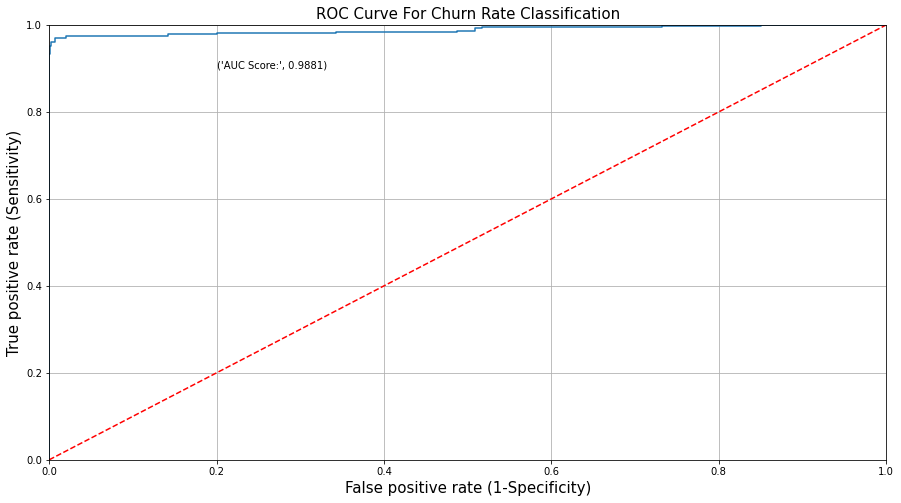

In [576]:
plt.figure(figsize = (15, 8))

y_pred_prob_xgb = xgb_grid_model2.predict_proba(X2_test)[:,1]

fpr, tpr, thresholds = roc_curve(y2_test, y_pred_prob_xgb)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC Curve For Churn Rate Classification', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.2, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y2_test, y_pred_prob_xgb),4)))
plt.grid(True)